In [249]:
import gensim
import pyLDAvis.gensim
import spacy
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

spacy.load('es')
from spacy.lang.es import Spanish
parser = Spanish()

In [250]:
import nltk
nltk.download('omw')
nltk.download('wordnet')

[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\Irvin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Irvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [251]:
nltk.download('stopwords')
es_stop = set(nltk.corpus.stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Irvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


__Paso 1:__
Se hará una serie de experimentos aplicando diferentes formas de preprocesar los tweets.
- Stemming
- Lemmatization usando Spacy
- Lemmatization usando https://github.com/michmech/lemmatization-lists

In [252]:
CSV = 'OrangeAllMin.txt'
NUM_TOPICS = 4
CHUNKSIZE = 500
ITERATIONS = 100
PASSES = 2
EVAL_EVERY = 1

__Experimento 1:__ Preprocesando data usando Stemming

In [253]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        #elif token.orth_.startswith('@'):
        #    lda_tokens.append('USER')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def get_stem(word):    
    return stemmer.stem(word)

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in es_stop]
    tokens = [get_stem(token) for token in tokens]
    return tokens

In [254]:
text_data_stem = []
with open(CSV, encoding='utf8') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        print(tokens)
        text_data_stem.append(tokens)

['\ufeffgiullian', 'loz', 'denunci', 'atent', 'defens', 'keikofujimori', 'falt', 'hor', 'audienci', 'apelaci']
['@giullianaloz', 'quier', 'denunci', 'nuev', 'atent', 'defens', 'keikofujimori', 'sol', 'hor', 'audienci', 'apel']
['@caret', '@reyreysincoron', 'amparl', 'jajajaj', 'escrib', 'bien']
['@laurabozz', 'acuerd', '🏻estas', 'conchud', 'ahor', 'hac', 'defensor', 'moral', ',com', 'solcit', 'embarr']
['graci', 'vizcarr', 'migrant', 'derech', 'trabaj', 'salud', 'educ', 'viviend', 'mism', 'peruan']
['pens', 'feder', 'zalaz', 'narr', 'notici', 'president', '@martinvizcarrac', 'dand', 'monolog', 'algui']
['@suriel', 'martin', 'vizcarr', 'recib', 'millon', 'campañ', '2016', 'person', 'exist', 'conoc', 'mensajealan']
['@blogcyh', 'consej', 'elbuh', '@martinvizcarrac', 'bien', 'gan', 'aprism', 'fujimor', 'referendum', 'resolv']
['@marthachavezc', '@iuliusalfonsus', '@oea_oficial', '@ueenperu', '@actransparent', 'direct', 'subprefect']
['marc', 'vecesn', 'aqu', 'explic', 'marc', 'referendum'

['@evelinorcon', 'cart', 'mariel', 'balbi', 'period', 'años', 'carrer', 'president', 'tab', 'period', 'vend', 'dign']
['alexand', 'peñ', 'böttcher', 'sujet', 'agred', 'luisalvacastr', 'delincuent', 'trabaj']
['@rppnotici', 'autor', 'señal', 'esper', 'agred', 'present', 'denunci', 'correspondient']
['@marthachavezc', 'vilez', 'cobard', 'tip', 'docent', 'pucp', 'hac', 'apolog', 'violenci', 'deb', 'ejemplar']
['identific', 'cobard', 'delincuent', 'agred', 'luis', 'alva', 'castr', 'ossi', 'antoni', 'raez', 'retamoz']
['identific', 'cobard', 'delincuent', 'agred', 'luis', 'alva', 'castr', 'ossi', 'antoni', 'raez', 'retamoz']
['identific', 'cobard', 'delincuent', 'agred', 'luis', 'alva', 'castr', 'ossi', 'antoni', 'raez', 'retamoz']
['identific', 'cobard', 'delincuent', 'agred', 'luis', 'alva', 'castr', 'ossi', 'antoni', 'raez', 'retamoz']
['@joveneskeik', 'agresor', 'luis', 'alva', 'castr', 'llam', 'osi', 'raez', 'retam', 'serv', 'señor', '@apra_oficial', 'hag', 'lleg']
['referendumdictator

['soci', 'martin', 'vizcarr', 'fug', 'pais', 'congres', 'ventur', 'denunc', 'gobiern', 'dej', 'escap', 'cues']
['@malditaternur', '@elcomercio_peru', 'convizcarrazescap', 'ayud', 'martin', 'vizcarr', 'adict', 'zacap', 'comp']
['convizcarrazescap', 'ayud', 'martin', 'vizcarr', 'adict', 'zacap', 'complic', 'gabinet', 'delin']
['@enemigocavi', 'prens', 'mermeler', 'dic', 'fug', 'españ', 'jos', 'alejandr', 'grañ', 'mir', 'ques', 'dueñ', 'corrupt']
['prens', 'mermeler', 'dic', 'fug', 'españ', 'jos', 'alejandr', 'grañ', 'mir', 'ques', 'dueñ']
['@waldemar_sant', '@enemigocavi', '@malditaternur', '@martinvizcarrac', 'correccion', 'ahor', 'llam', 'zescap']
['@enemigocavi', '@malditaternur', 'clar', 'protej', 'president', '@martinvizcarrac', 'zacap']
['@malditaternur', 'clar', 'protej', 'president', '@martinvizcarrac', 'zacap']
['clar', 'protej', 'president', '@martinvizcarrac', 'zacap']
['shyla', 'herrer', 'pulpin', '@noticias_tvperu', 'poc', 'experient', 'nul', 'imparcial', 'public', 'mem']
['

['@richardmontoy', 'golaz', 'despues', 'campañ', 'favor', 'sol', 'qued', 'esper']
['cumpl', 'deb', 'ciudadan', 'oblig', 'gobiern', 'mediocr', 'corrupt', 'marqu', '4vecesn', 'deb']
['felicit', '@pedrochavarryv', 'pued', 'toler', 'jos', 'doming', 'perez', 'actu', 'impun', '@idl_r']
['@caret', 'jajajajajajaj', '....', 'tranquil', 'mafios', '@caret', 'ahor', 'llor', '@idl_r', 'ten', 'juez', 'med']
['@meiermq', 'autoritar', 'avanz', 'mientr', 'prens', 'debilit', 'democraci', 'sistem', 'garantiz', 'presuncion', 'inocent']
['@martinvizcarrac', 'grand', 'inutil', 'pais', 'estil', 'chavist', 'gast', 'plat']
['@frospigliosi', 'mentir', 'carl', 'moran', 'fern', 'rospigliosi', 'opinion', 'column', 'comerci', 'peru', '\u2066@politica_ecpe\u2069']
['@victorandresgb', 'jos', 'doming', 'perez', 'escud', 'guzman']
['ripley', 'sinvergüenz', 'investig', 'cas', 'corrupcion', 'chincher', 'particip', 'firm', 'contrat', 'graci']
['@julioguzmanperu', 'autoriz', 'compr', 'equip', 'intercept', 'telefon', 'gobie

['@giullianaloz', 'ofici', 'defensoriadelpuebl', 'criteri', 'asum', 'despach', 'respect', 'elev', 'actu']
['@marthachavezc', 'muj', 'keik', 'fujimori', 'recib', 'vot', 'peruan', 'injust', 'deten', '-sin', 'prueb']
['hamilton', 'castr', 'jos', 'doming', 'perez', 'fiscal', 'gran', 'mafi', 'grañ', 'odebrecht', 'cant', 'pued']
['@poder_judicial', '@jdelaquintan', '@agencia_andin', '@noticiamer', '@exitosap', '@rppnotici', '@canaln', '@capital967']
['@valentinalia', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn']
['corrupt', 'cuy', 'president', 'corrupt', '@martinvizcarrac', 'gran', 'tall', 'mund', 'sol']
['@expresoperu', 'jajajajajajaj', 'el.chist']
['cre', 'qued', 'grand', 'carg', '@pedrochavarryv', '@fiscaliaperu', '@idl_r', 'pas', 'pericot']
['@larryporter', 'tod', 'crem', 'nat', 'mafi', 'odebrecht', 'pid', 'asil', 'polit', 'alan', 'garc']
['ahor', 'punt', 'termin', 'circ', 'cavi', 'hor', 'mand', 'pat', 'cas', 'incompetent', 'carh']
['@richardmontoy', 'interes', 'juez'

['exact', 'buen', 'gent', 'parec', 'quier']
['cre']
[]
['@corteidh']
['@laconchacavi', 'ultimominut', 'alcald', 'salient', 'chiclay', 'dav', 'cornej', 'chinguel', 'conviert', 'colabor', 'eficaz', 'delat', 'clem']
['imbecil', 'aquel', 'enter', 'sol', 'indult', 'exist', 'sentenci', 'repit']
[]
['much', 'graci', 'palabr', 'fern']
['@pedrojosecam', '@karlacall', 'cuestion', 'averigu', 'cre', 'segur', 'hall', 'conexion', 'sin', 'hac', 'rat', 'jdperez', 'denunci']
['@karlacall', 'estupidin', 'fiscaliz', 'puebl', 'sab', 'hac', 'interes', 'nacional', 'cos', 'pon', 'nombr', 'ciel']
['@lopezeg', '@karlacall', 'funcion', 'congresal', 'tres', 'pilar', 'represent', 'fiscaliz', 'legisl', 'actitud', 'difer']
['@ferblog', 'pued', 'trist', 'final', 'fiscal', 'juez', 'carhuanch']
['@fitoflor', '@karlacall', 'facil', 'ultim', 'eleccion', 'peruan', 'vot', 'ponl', 'hic', 'convi']
['@ferblog']
['@karlacall', 'vec', 'piens', 'odi', '@alangarciaperu', 'conoc', 'enemig']
['@kikerodriguez9', '@rchavezs', '@karl

['com', 'gust', 'cam', 'fiscal', 'jos', 'doming', 'perez', '@josedomingop', 'ahor', 'sac', 'christi', 'dominguez']
['dejam', 'soñ', 'pedr']
['tir', 'raton', 'sen', 'colombi', 'latinoamer', 'mejor', 'polit', 'men', 'entretien']
['@renattobaut', 'impresent']
['import', 'cad', 'tweet', 'escrib', 'hac', 'fiscal', 'perez', 'arrob', '@cidh', '@idl_r']
['bellez', '@minsa_peru', '@lamul', 'pag', 'adopt', 'posicion', 'dediquens']
['conviv', '@alangarciaperu', 'exist', 'form', 'concubin', 'genuflexi', 'sin', 'genuflex', 'avern']
['sres', '@cidh', 'acus', 'fiscal', '@josedomingop', 'hab', 'filtr', 'inform', '@idl_r']
['problem', 'comprension', 'lector', 'problem', 'dic', 'despues', 'cit', '@alangarciaperu']
['sres', '@cidh', 'fiscal', 'encarg', 'investig', 'vari', 'polit', 'peru', 'perd', 'tod', 'objet']
['sres', '@cidh', 'aqu', '🏼le', 'fiscal', 'encarg', 'investig', '@alangarciaperu', 'parec', 'correct']
['@juanchijeyy', '@karlacall', '@samanamu', '@cevalenzuelav', 'olvid', 'adul', 'invit', 'ina

['escandal', 'escrit', 'puñ', 'letr', 'edwin', 'ovied', 'denunci', 'alert', 'siend', 'fuertement', 'presion']
['@ugluis', 'deb', 'hac', 'tribunal', 'colombi', 'orden', 'odebrecht', 'indemniz', 'millon', 'corrupcion']
['@vsaldana345', '@pedrochavarryv', '@madeleineoster3', '@pucp', 'ser', 'rubi', 'vic', 'decid', 'hac', 'diner', 'maner']
['@jbcperu', 'democraci', 'formul', 'econom', 'resolv', 'problem', 'sin', 'sol', 'artifici', 'human', 'ide', 'control']
['@rossy6057gmail1', 'mafiaidlgobiernaenperu']
['@jali_cotrin', 'mediant', 'tinterill', 'fiscal', 'vel', 'solicit', 'reprogram', 'audienci', 'aduj', 'lleg', 'escrit']
['@pepechlimp', 'fortalez', 'keik', 'orgull', 'templ', 'encar', 'maldit', 'persecu', 'enemig', 'pervers', 'cobardi']
['@pepechlimp', 'fuerz', 'keik', 'sol', 'cad', 'diferent', 'tiend', 'reconoc', 'abus']
['@felxs01', '@lainezlozada22', '@socioperiod', 'casi', 'mism', 'acab', 'respond', 'mencion', 'congres', 'permanent']
['@azabachecac', '@makbernuy', '@lainezlozada22', 'li

['@elhigadodmarit', 'referent', 'correct', 'moral', 'honest', 'antis', 'desvel', 'miseri']
['@wolfdru', 'gasoduct', 'proyect', 'inic', 'presupuest', 'millon', 'dolar', 'termin', '8,000', 'millon', 'tub']
['@vozliberal', 'peru', 'corr', 'riesg', 'caer', 'miasm', 'izquierd', 'cuid']
['@lainezlozada22', '@rio_castellan', '@gildatrkovic', '@carlosa22175929', '@eudm', '@xileon', '@iuliusalfonsus', '@juanbriones', '@meiermq', '@elhigadodm']
['@capacapo3', '@alexcajat', '@leo10', '@eudm', 'desmemori', 'malintencion', '30737', 'aprueb', 'prioriz', 'pag', 'reparaci']
['@rio_castellan', '@gildatrkovic', '@carlosa22175929', '@eudm', '@xileon', '@iuliusalfonsus', '@juanbriones', '@meiermq']
['@cesarnakazaki', 'descerebr', 'estacion', 'patrañ', 'mantien', 'aferr', 'años', 'algu']
['mil', 'esper', 'llen', 'hogar', 'famili', 'amor', 'alegri', 'travesur']
['@alexcajat', '@leo10', '@lainezlozada22', '@eudm', 'odebrecht', 'hiz', 'proyect', 'coim', 'sol', 'pag', 'repar', 'civil']
['@xileon', 'dificil', '

['medi', 'audienci', 'cas', 'temerari', 'crim', 'realiz', 'viern', 'diciembr', 'ciud']
['ahor', 'sab', 'fiscal', 'hac', 'larg', 'tra', 'toled', 'san', 'sagr']
['ahor', 'sab', 'fiscal', 'hac', 'larg', 'tra', 'toled', 'san', 'sagr']
['segun', 'exalcald', 'chiclay', 'congres', 'clement', 'flor', 'lleg', 'encarg', 'vizcarr', 'favorec', 'candidat']
['segun', 'exalcald', 'chiclay', 'congres', 'clement', 'flor', 'lleg', 'encarg', 'vizcarr', 'favorec', 'candidat']
['alcald', 'salient', 'chiclay', 'dav', 'cornej', 'chinguel', 'envi', 'cart', 'fiscal', 'chavarry', 'convert', 'colabor']
['mañan', 'odebrecht', 'inhabilit', 'colombi', 'mult', 'millon', 'dolar', 'perusalen']
['colm', 'caraj', 'put', 'gobiern', 'sol', 'permit', 'odebrecht', 'estaf', 'pag', 'sol', 'ripi']
['@suriel', 'jajaj', 'amiguit', '....', 'defend', 'falt', 'ped', 'hag', 'hij']
['cabez', 'zapall', 'pued', 'president', 'apaf', 'quier', 'president', 'peru']
['colm', 'gobiern', 'humal', 'coime', 'regal', 'millon', 'dolar', 'odebrech

['ultim', 'minut', 'grand', 'asesin', 'histori', 'peruan', 'asquer', 'genoc', 'comun', 'abimael', 'guzm', 'lid']
['@memeoperu', 'mientr', 'puñet', 'testig', 'proteg', 'numer', 'vist', 'chin', 'abraz', 'bes', 'jud', 'algun', 'lug', 'lim']
['mientr', 'puñet', 'testig', 'proteg', 'numer', 'vist', 'chin', 'abraz', 'bes', 'jud', 'algun', 'lug']
['gorriti', 'reput', 'montesin', 'empez', 'campañ', 'nuev', 'president']
['quien', 'pag', 'panel', 'gat', 'encerr', 'detras', 'mamarrach', 'referendum', 'asquer', 'mafi']
['siempr', 'tard', 'notici']
['aprender', 'vot', 'socialcojud', 'siempr', 'kag', 'vot']
['jajajaj', 'idiot', 'pulpin', 'socialcojud', 'pucp', 'defend', 'caviar', 'corrupt', 'apoder']
['quien', 'pag', 'panel', 'gat', 'encerr', 'detras', 'mamarrach', 'referendum', 'asquer', 'mafi']
['venezuel', 'candidat', 'chavist', 'alma', 'cerebr', 'dic', 'escasez', 'gent', 'cocin', 'vec']
['pid', 'prision', 'prevent', '@pedrochavarryv']
['ahor', 'saldran', 'cacatu', 'dec', 'destitu']
['jajajaj', '

['@abrilgi', 'baj', 'cayend']
['@bot', 'dim', 'quien', 'andas']
['@cesarzumaetaf', 'guzm', 'fantasm', 'figur', 'bien', 'par', 'encuest', 'conden', 'indign', 'frunc']
['@irrayab5', '@jbcperu', 'com', 'permit', 'noch', 'electoral', 'segund', 'vuelt', 'doñ', 'urrac', '@cevalenzuelav', 'cort', 'emision', 'willax']
['@el_flacotir', 'demagog', 'pupul', 'parangon', 'histori', 'peru', 'supon', 'car', 'cojud']
['@aaronsalomong', 'ahor', 'edwin', 'ovied', 'denunci', 'fiscal', 'sandr', 'castr', 'roci', 'sanchez', 'presion', 'delat', 'juec', 'congr']
['@diariocorre', 'keik', 'fujimori', 'qued', 'extranjer', 'busc', 'asil', 'vide']
['@manifiesto_p', 'implic', 'congres', '@cesaracunap', 'corrupcion', '@mecheaf', 'segun', 'alcald', 'chiclay', 'presion', 'darl']
['@kampueromez', '@milagrosleivag', 'reform', 'judicial', 'presenci', 'rpte', 'ministeri', 'public', 'quien', 'ademas', 'form', 'part', 'tribunal', 'naci']
['@gyf96rony', 'empez', 'criminaliz', 'haci', 'abog', 'opositor', 'adefesi', 'inutil', 

['@msalazarcongr', '@fiscaliaperu', '@minjusdh_peru', '@poder_judicial', '@martinvizcarrac', '@tc_peru', '@defensoria_peru', '@legisp']
['@msalazarcongr', 'histor', 'odebrecht', 'inhabilit', 'conden', 'pag', 'millon', 'dolar', 'colombi', '@fiscaliaperu', '@minjusdh']
['@alvarosarc', 'algui', 'avis', 'rafael', 'vel', 'chacal', 'gorriti', 'escuch', 'perfect', 'necesit', 'grit', 'expon']
['@miki_torr', 'mund', 'reves', 'fiscal', 'vel', 'argument', 'operat', 'fuerz', 'popul', 'movimient', 'terror', 'algu']
['@jotabatall', '@mecheaf', '@pipohuert', 'verd', 'cuand', 'toc', 'recien', 'sal', 'dec', 'corrobor', 'verac', 'dic', 'aspi']
['@flores_arom', '@mecheaf', '@pipohuert', 'jajaj', 'clar', 'ahor', 'toc', 'turn', 'ladr', 'keik', 'hic', 'mism', 'usted', 'dandol']
['@josewvilc', '@rsousaperu', '@pipohuert', '@gabrielitaaa10', '@rosamariabartr', '@alvarosarc', '@mili_brujit', '@jbcperu', '@tammyarimborgog', '@pbodigital']
['@elchato25', '@mecheaf', '@pipohuert', 'aplaud', 'hic', 'fujimor', 'aho

['@veritatisperu', 'parec', 'referendum', 'solucion', 'corrupcion', 'gestion', 'dic', 'ministeri', 'viviend', 'lug', 'ministr']
['sol', 'delincuent', 'pued', 'licenci', 'delincuent', 'segu', 'saqu', 'pais']
['@eudm', 'mañan', 'column', '@diariocorre', 'explic', 'grand', 'razon', 'perjudicial', 'trat', 'corpor']
['@ariveralp', '@rppnotici', '@mauriciomuld', '@alangarciaperu', 'juan', 'sheput', 'ejempl', 'incongruent', 'colosal', 'defensor', 'ultranz']
['@tjcmagn', 'fiscal', 'fuerz', 'ovied', 'sandr', 'castr', 'mism', 'involucr', 'chavarry', 'miembr', 'cuell', 'blanc', 'hast']
['@hablaveg', 'vide', 'abog', 'keik', 'dej', 'indefens', 'segu', 'denunci', 'atropell', 'radi', 'capital', 'estim']
['@gloriagp13', '@marrio_', '@john_zuniga_v', '@vince_bryc', '@luzsalgado_r', '@patricia_neyr', '@giullianaloz', '@keikofujimori', '@albertofujimori', 'montesin']
['sab', 'nunc', 'sab', 'hac', 'vic', 'president', 'congres', 'tampoc', 'sab']
['@memeoperu', 'ahor', 'sab', 'fiscal', 'hac', 'larg', 'tra',

['def', 'mamani', 'luiz', 'lopez', 'def', 'sol', 'asco', 'maner', 'izmierd', 'ppkutr']
['@tedcruz', 'gosh', 'think', 'nancy', 'want', 'press', 'room', 'didn’t', 'want', 'americ', 'peopl', 'hear', 'this', 'discussi']
['denunci', 'mient', 'sancion', 'maner', 'civil', 'penal', 'mujer', 'tambi', 'mient', 'dich']
['postur', 'congres', 'mamani', 'luis', 'lopez', 'mism', 'tom', 'siempr', 'cas']
['@reyreysincoron', 'lean', 'articul', 'carl', 'bedoy', 'escandal', 'econom', 'expucp', 'gust', 'sab', 'alan', 'wagn', 'transp']
['tssss', 'rob', 'pal', 'verd', 'cas', 'ñat', 'ris', 'vagaz', 'junt', 'plat', 'vend']
['tod', 'calientit', 'vieron']
[]
['proxim', 'congres', 'man', 'imbecil', 'figuretis', 'impresent', 'manipul', 'comprabl']
['@elscorpione1950', 'verdad', 'amarg', 'votant', 'plebiscit', '@martinvizcarrac', 'vay', 'despert', 'sueñ', 'promet']
['@elhigadodmarit', 'votant', 'vizcarr', 'sol', 'informart', 'referendum', 'eleg', 'feliz', 'dispuest', 'pag', 'agu']
['moment', 'guard', 'prudent', 'si

['@eudm', 'mayor', 'fujimor', 'baj', 'cabez', 'hiz', 'complic', 'referendum', 'ahor', 'esper', 'result', 'coher']
['@julioguzmanperu', '@peru_viral']
['algui', 'onpe', 'oblig', 'aprob', 'maquin', 'fraudulent']
['cort', 'suprem', 'cag', 'cort', 'suprem', 'britan', 'puebl', 'britan', 'tradicion', 'democrati']
['@alangarciaperu', 'gobiern', 'mient', 'villanuev', 'silenci', 'aqu', 'prueb', 'encubr', 'delit']
['aval', 'fars', 'nakasaki', 'dic', 'pens', 'hac', 'hiz', 'cos', 'vergüenz']
['@jackposobiec', 'this', 'looks', 'lik', 'something', 'dystopi', 'movi']
['pued', 'esper', 'pais', 'maestr', 'analfabet', 'funcional']
['chil', 'firm', 'peru', 'abri', 'piern', 'peru', 'parec', 'franci', 'sudac']
['vot', 'hac', 'aval', 'gobiern', 'dirig', 'mafios', 'desconozc']
['vot', 'garant', 'cre', 'vean', 'vide']
['peru', 'viv', 'fars', 'gobern', 'mafios', 'denunci', 'corrupcion', 'benef']
['preocup', 'sra.', 'ampuer', 'men', '@keikofujimori', 'pres', 'import']
['detest', 'fascism', 'detest', 'autoritar'

['ladron', 'esper', 'sancion']
['inacept', 'pas', 'concienci', 'dej', 'viv', 'ahor', 'ked', 'fehacient', 'acre']
['@pedrochavarryv', 'com', 'posibl', 'señor', 'usted', 'permit', 'fiscal', 'vel', 'firm', 'acuerd', 'lesiv', 'peru']
['sol', 'victor', 'deb', 'destitu', 'fiscal']
['mari', 'congres', 'pued', 'permit', 'verdader', 'corrupcion']
['denunci', 'autoriz', 'firm', 'basur', 'acuerd']
['deb', 'permit', 'burl', 'peru', 'triunf', 'corrupcion', 'gobiern', 'vizcarr']
['@pedrochavarryv', '@jvillastein', '@ernestoam21', '@ugluis', '@jdealthaus', '@cesarnakazaki', '@vponce64', '@elvisocc', '@alvarosarc']
['dios', 'protej', 'bendig', 'usted', 'much', 'fortalez', 'resign', 'dic', 'algui', 'pas']
['colm', 'caraj']
['gent', 'mierd']
['@rzp140650', 'mir', 'doctor', 'usted', 'deb', 'hac', 'denunci', 'fiscal', 'perez', 'juez', 'carhuanch', 'prevaricat', 'violacion', 'deb']
['mir', 'doctor', 'usted', 'deb', 'hac', 'denunci', 'fiscal', 'perez', 'juez', 'carhuanch', 'prevaricat', 'violacion']
['invad

['@pedrochavarryv', '@poder_judicial', '@vponce64', '@jvillastein', '@jdealthaus', '@ugluis', '@alvarosarc', '@expresoperu']
['delincuent', 'carcel', 'fiscal', 'perez', 'proteg']
['podr', 'hac', 'manej', 'suprem', 'ganst']
['@rzp140650', 'sient', 'señor', 'ovied', 'des', 'piedr', 'pech', 'keik', 'puest', 'mes', 'cas']
['sient', 'señor', 'ovied', 'des', 'piedr', 'pech', 'keik', 'puest', 'mes']
['@rzp140650', '@ugluis', '@jvillastein', '@wolfdru', '@jdealthaus', '@alfonsobaell', '@vponce64', '@eudm', '@cesarnakazaki', '@alvarosarc', 'fiscal']
['@ugluis', '@jvillastein', '@wolfdru', '@jdealthaus', '@alfonsobaell', '@vponce64', '@eudm', '@cesarnakazaki', '@alvarosarc', 'fiscal']
['total', 'acuerd', 'contig']
['jos', 'luis', 'lecar', 'deb', 'hac', 'denunci', 'ray', 'met', 'naric']
['entonc', 'deb', 'irte', 'mism', 'amer']
['imbecil', 'entren']
['@rzp140650', 'sheput', 'peor', 'basur', 'congres', 'ningun', 'dud']
['sheput', 'peor', 'basur', 'congres', 'ningun', 'dud']
['cambi', 'pues', 'cual

['carl', 'gald', 'keik', 'agu', 'lav', 'pezon', 'vell', 'pubic', 'sal', 'ministr', 'muj']
['-oy', 'victor', 'prad', 'saldarriag', 'president', 'pod', 'judicial', 'dam', 'manit', 'tap', 'rob']
['milagr', 'leiv', 'fiscal', 'jos', 'doming', 'perez', 'filtr', 'inform', 'ciert', 'prens', 'amig', 'pud', 'imped', 'jos']
['-mechit', 'opin', 'fiscal', 'nacion', '-deb', 'destitu', 'opin', 'keik', '-est', 'bien', 'pres']
['@jmendoza_peru', 'persecu', 'polit', '-keik', 'fujimori', 'pres', 'alan', 'garci', 'imped', 'sal', 'juici', 'denunci']
['creador', 'humal', 'gran', 'transform', 'revocatori', 'sol', 'qued', 'marc']
['sal', 'piar', 'cavi', 'siempr', 'grit', 'cuatr', 'vient', 'exist', 'persecu', 'polit', 'peru']
['fiscal', 'doming', 'perez', 'entreg', 'carpet', 'cas', 'chincher', 'involucr', 'pres']
['alan', 'pid', 'asil', 'despues', 'alan', 'pid', 'asil', 'alan', 'quit', 'car', 'loc', 'loc']
['-"señor', 'ministr', 'muj', 'viol', 'menor', 'maner', 'cruel', 'salvaj', 'requier', 'presenci', '-"voy'

['hic', 'contralor', 'gobiern', 'sac', 'alarcon', 'pon', 'fantoch', 'med', 'nelson', 'shack']
['juez', 'dic', 'keik', 'muchisim', 'pod', '2006', 'orden', 'investig']
['fiscal', '@pedrochavarryv', 'equivoc', 'vizcarr', 'cuestion', 'vizcarr', 'titer', 'mafi', 'cavi']
['esper', 'toled', 'humal', 'vill', 'ped', 'juici', 'anul', 'juici', 'acab', 'dec']
['sol', 'gast', 'congres', 'flor', 'pamelit', 'mermelumendi', 'solcit', 'compañ', 'noch', 'hac', 'reportaj', 'sobr']
['ataqu', 'prens', 'grañ', 'monter', 'fujimor', 'deten', 'objet', 'keik', 'objetiv']
['amiguit', 'sin', 'gust', 'fortalec', 'fif', 'podr', 'desafili', 'entonc', 'hag', 'campañ']
['millon', 'impuest', 'gast', 'vizcarr', 'public', 'estatal', 'contrarrest', 'anemi']
['cuant', 'cuest', 'campañ', 'medi', 'adversari', 'vizcarr', 'pens', 'port', 'keik']
['espos', 'fiscal', 'jos', 'doming', 'perez', 'cobr', 'impuest', '15600', 'sol', 'mov']
['@jmendoza_peru', 'adend', 'chincher', 'lesiv', '•contrat', 'original', 'pag', 'cost', 'aeropue

['4vecesn', 'marc', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', 'bien', 'clar', '4vecesn']
['debidoproces', 'debidoproces', 'debidoproces', 'keikofujimori', '4vecesn', '4vecesn', '4vecesn', '4vecesn']
['4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', 'vot', '4vecesn', '4vecesn', '4vecesn', '4vecesn']
['nadietienecoron', 'parec', 'personaj', 'period', 'aval', 'intoc']
['referendum', 'fraud', '@onpe_oficial', 'mand', 'marc', 'vot', 'gobiern', 'quier']
['@ugluis', 'advert', 'onpe', 'funcion', 'aparat', 'propagandist', 'gobiern', '@martinvizcarrac', 'interfier', 'proc']
['nadietienecoron', 'president', 'ali', '4vecesn', '4vecesn', '4vecesn']
['rechaz', 'referendumnul', 'vot', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', 'caprich']
['4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn']
['4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', 'referendumvici']
['4vecesn', 'referendumvici', '4vecesn']

['@tamaritaklog', '@fiscaliaperu', '@poder_judicial', '@pedrochavarryv', 'cuand', 'inici', 'cas', 'judicial', 'lav', 'jat', 'fiscalill']
['devuelv', 'cas', 'compr', 'diner', 'lav', 'chavism', 'odebrecht', 'sol', 'pas', 'peru', '4vecesn', '4vecesn']
['4vecesn', '4vecesn', '4vecesn', '@poder_judicial', 'complic', 'corrupcion', 'odebrecht']
['4vecesn', 'referendumtramp', 'referendum2018', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn', '4vecesn']
['@tukuyrikuy4', 'milagr', 'leiv', 'jos', 'perez', 'pud', 'evit', 'huid', 'españ', 'jos', 'grañ', 'porqu', 'hiz', 'preguntenl', 'pend']
['@hipocresiaroj', 'igual', 'corrupt', 'vill', 'anul', 'caucion', 'pag', 'corrupt', 'blind', 'impun', 'http']
['@isique_pedr', 'ollant', 'suavecit', 'firm', 'cartit', 'apoy', 'president', 'vizcarr', 'dic', 'peru']
['@mmi_mendoz', 'estaf', 'saque', 'peru', 'toled', 'jef', 'financ', 'campañ', '2011']
['@cecilia605040', 'paladin', 'anti', 'corrupcion', 'ces', 'ministr', 'balbuen', 'respons', 'polit', 'corrupc

['@tubinoc', 'pid', 'defensor', 'puebl', 'cardenal', 'barret', 'dej', 'oficin', 'vay', 'personal', 'mazmorr', 'prefectur']
['@gmendoz', '@cabrejosmons', 'muchisim', 'men', 'medi', 'prens', 'escrit', 'algun', 'autor', 'eclesiast', 'hac', 'cargamonton', 'card']
['@mouseonthemoon', '@cabrejosmons', 'milagr', 'ahor', 'preocup', 'polit', 'ahor', 'dic', 'agend']
['@carolin50449842', '@cabrejosmons', 'siend', 'hombr', 'indign', 'degener', 'multimillonari', 'agend', 'impuls', 'gobi']
['@joseant44166456', '@cabrejosmons', 'mons', 'iluminen', 'piens', 'hac', 'agend', 'gener', 'delincuent', 'abort', 'feminicidi']
['@maryju333', '@cabrejosmons', 'denunci', 'pap', 'amor', 'odi']
['@gregoriolpez', '@cabrejosmons', 'vec', 'reclam', 'particip', 'sector', 'inclus', 'atent', 'propi', 'iglesi', 'monseñ']
['@vince_bryc', 'terror', 'gin', 'cost', 'comprob', 'peru', 'incendi', 'prader', 'atac', 'person']
['@tamaritaklog', 'jos', 'doming', 'perez', 'entreg', 'document', 'cas', 'chincher', 'actual', 'fiscal',

['@ecucol', '@myrianelibr', '@evildrums', '@taitapand', '@lilyyd', '@piery711', '@_gonzalez_jordi', '@ximearc', '@biolucho2005', 'demostr', 'civiliz']
['@ecucol', 'reid', 'hac', 'hac', '@myrianelibr', '@evildrums', '@taitapand', '@lilyyd', '@piery711', '@albertozevallo5', '@_gonzalez']
['@jen_1070', '@vponce64', '@albertozevallo5', '@martinvizcarrac', '@congresoperu', '@poder_judicial', '@fiscaliaperu', 'pantalon', 'sentari']
['@jen_1070', '@elhelen', '@albertozevallo5', 'mientr', 'hab', 'sid', 'funcionari', 'sol', 'dich', 'pres']
['@meiermq', 'mejor', 'cuentenn', 'extrañ', 'accident', 'vehicul', 'sol', 'mur', 'margarit', 'patiñ', 'viud', 'asesin', 'period', 'hug']
['@myrianelibr', '@giuseppenoc', '@leonline2000', '@omarbul', '@ecucol', '@geopolyt', 'ampli', 'sustent']
['@myrianelibr', 'leonard', '@leonline2000', 'mejor', 'hil', 'geopolit', 'leid', 'obam', 'meliflu', 'jueg', 'iran', 'comun']
['@leonline2000', 'com', 'dej', 'mund', 'incendi', 'geopolit', 'sal', 'puert', 'grand', 'hil', 

['@xafu', 'pas', 'casi', 'mes', '@pedrochavarryv', 'asum', 'fiscal', 'nacion', 'lueg', 'darl', 'apoy', 'decepc']
['@romancendoy', 'sorprend', 'silenci', 'grand', 'despach', 'abog', 'peru', 'respect', 'violacion', 'derech', 'defens']
['@sullam', 'comit', 'propuest', 'mism', 'ejecut', 'inclu', 'fiscal', 'nacion', 'gust', '@martinvizcarrac']
['@advocatus_79', 'popul', 'pur', 'dur', 'sres', 'anemi', 'nuev', 'mes', 'gobiern', 'vizcarr', 'sol', 'disminu', 'sin', '–por']
['@primerpedal', 'adult', 'agred', 'menor', 'edad', 'merec', 'mayor', 'conden', 'legal', 'repudi', 'socied', 'pued', 'hab']
['@ernestoam21', 'perd', 'form', 'elemental', 'convivent', 'abog', 'keik', 'fujimori', 'pued', 'comprend', 'inve']
['@meiermq', 'tiemp', 'gobiern', 'anemi', 'baj', 'arrib']
['@johnwilmerrubi', 'tumb', 'cerr', 'avis']
['@pepewank', 'maldit', 'opositor', 'delatenl', 'alleg', 'gobiern', 'shhhhhhhh']
['@giullianaloz', 'quier', 'denunci', 'nuev', 'atent', 'defens', 'keikofujimori', 'sol', 'hor', 'audienci', '

['habl', 'fumequ', 'denl', 'ket', 'dej', 'jod']
['@vertizpamel', '@martinvizcarrac']
['exact']
['@mitcris1']
['volv', 'loc', 'cabron', 'jef', 'contuberni', 'vizcarr', 'quier', 'dej', 'defens']
['fiscalperez', 'inclu', 'investig', 'criminal', 'keik', 'abog', 'hor', 'sustent', 'apelaci']
['mocos']
['interes']
['mier']
['exact']
['divin', 'provident']
['verd']
['pues', 'solucion', 'aprodeh', 'cddhh', 'escog', 'juec', 'basur']
['encarcel', 'muert', 'individu', 'balaz', 'result', 'mur', 'cuchill']
['palomanoced', 'demostr', 'conduct', 'jodi', 'cos', 'acus', 'prob', 'rev']
['@ideel', '@cidh', 'tard', 'reaccion', 'cabron', 'dim', 'cuent', 'chavarry', 'jef', 'fiscalperez', 'jef', 'gorriti']
['@socioperiod']
['@mecheaf', '@palomanoced', 'sra.', 'araoz', 'presuncion', 'inocent', 'piedr', 'angul', 'derech', 'garant']
['tatianaasteng', 'desfemeniz', 'tambi', 'mostr', 'empoder', 'femin', 'necesari']
[]
['cualqui', 'idiot']
['exact']
['ren', 'defiend', 'odebrecht', 'uñas', 'dient', 'kafkian']
['pare

['@manifiesto_p', 'fiscal', '@pedrochavarryv', 'orden', 'traves', 'ofici', 'fiscal', 'rafael', 'vel', 'inici', 'accion', '@pucp', 'cobr', 'indeb']
['@lorenzland', 'invit', 'albertobore', 'habl', 'reform', 'bore', 'sal', 'vide', 'compr', 'congres']
['@manifiesto_p', 'zonaroj', '@mavila_huert', 'hac', 'nuev', 'papelon', 'viv', 'qued', 'mud', 'pon', 'prueb', 'logic', 'ejercici']
['@triciclodelperu', 'jaim', 'bayly', 'ros', 'mar', 'palaci', 'fujimor', 'hag', 'loc', 'trabaj', 'sueld', 'montesinis']
['@jbedoyadenegri', 'luisbedoyarey', 'vizcarr', 'sig', 'alag', 'sig', 'pens', 'tem', 'termin', 'cualqui']
['@jbedoyadenegri', 'fortalec', 'insticion', 'parlament', 'unicameral', 'reeleccion', 'inmun', 'quer', 'parlament', 'inact']
['@jbedoyadenegri', 'siempr', 'buen', 'escuch', 'autoriz', 'coyuntur', 'actual', 'aqu', 'adelant', 'entr']
['@nicolasluc', 'ultim', 'minut', 'juan', 'carrasc', '@fiscaliaperu', 'fiscal', 'met', 'pres', 'edwin', 'ovied', 'alcald', 'chiclay', 'decl']
['@kampueromez', '@jo

['@jbedoyadenegri', 'dec', 'respetu', 'institu', 'cuid', 'pretend', 'instaur', 'nuev', 'form', 'dictadur']
['@alonso_dm', 'quer', 'diari']
['@almagro_oea2015', 'shar', 'speech', 'inauguration', 'several', 'conferenc', 'situation', 'cub', 'speaking']
['@almagro_oea2015', 'tim', 'rais', 'awareness', 'illegitimacy', 'oldest', 'dictatorship', 'hemispher', 'begin', 'work']
['@almagro_oea2015', 'hor', 'gener', 'concienci', 'ilegitim', 'dictadur', 'antigu', 'hemisferi', 'deb', 'llam', 'atenc']
['@almagro_oea2015', 'aqu', 'discurs', 'inaugur', 'vari', 'conferent', 'situacion', 'cub', 'abor']
['@oea_oficial', 'acog', 'primer', 'seri', 'conferent', 'examin', 'situacion', 'derech', 'human', 'cub']
['@pbodigital', '4vecesn', 'papi', 'grañ', 'desesper', 'phillipbutters', 'pbodigital', '4vecesn', 'referendum', 'grañ', 'viern', '2018']
['buen', 'tard', 'sol', 'reiter', '4vecesn']
['@almagro_oea2015', 'mientr', 'cub', 'dictadur', 'persigu', 'asesin', 'tortur', 'silenci', 'gent', 'enseñ']
['@4vecesn', 

['@mauriciomuld', 'cinism', 'maxim', '@mininterperu', 'dic', 'proteg', 'alan', 'garci', 'avis', 'cartel', 'dic']
['@manifiesto_p', 'grab', 'polic', 'defend', 'odebrecht', 'polic', 'abus', 'dirig', 'capitan', 'sandr', 'torr', 'maltrat']
['@hernan', 'aut', 'afuer', 'cas', '@alangarciaperu', 'dic', 'period', 'identific', 'registr', '@sun']
['@karlacall', 'regres', 'ahor', 'burlens', 'pues', 'ahor', 'tab', 'dig', 'persecu', 'peru', 'escuch', 'noalchu']
['grav', 'premi', 'ministr', 'interior', 'deb', 'respond', 'inmediat']
['@arturovalverdep', 'alertainternacional', 'vehicul', 'chupone', 'capt', 'frent', 'cas', '@alangarciaperu', 'vulner', 'derech', 'human']
['@gonzalesposadal', 'plac', 'carr', 'cas', 'alan', 'garc', 'ministeri', 'interior', 'hac', 'pas', 'prens', 'nieg']
['@omarquesadamart', '@martinvizcarrac', 'deb', 'respond', 'seguimient', 'alan', 'garc', '@fiscaliaperu', 'deb', 'interven', 'inmediat']
['@jaicec']
['@karlacall', 'urgent', 'difusion', 'vehicul', 'encuentr', 'moment', 're

['@josemartsn', '@martinvizcarrac', 'tod', 'maquinari', 'gubernamental', '@onpe_oficial', '@jne_peru', 'prens', 'corrupt']
['@realpolitikp', 'cinism', 'cobard', 'gent', 'limit', 'diran', 'culp', 'keik', 'asco']
['sol', 'pauperrim', 'nivel', 'vizcarr', 'podr', 'justific', 'creenci', 'argentin', 'valor']
['hac', 'años', 'cans', 'repet', 'terrorismonuncam']
['@carlosb17447235', '@tamaritaklog', '@martinvizcarrac', 'bien', 'merec']
['@eduardoenr', '@pablourri', '@jvillastein', '@romancendoy', '@dantuzum', 'mayor', 'hag', 'reir']
['@pablourri', '@eduardoenr', '@jvillastein', '@romancendoy', '@dantuzum', 'sarn', 'gust', 'pic', 'quer', 'pabl', 'tod']
['@raphaelrey', '@castalva123', '@milagrosleivag', 'jajajajaj', 'parec', 'escuch', 'belaund', 'sab']
['@milagrosleivag', 'simpl', 'consolid', 'peruzuel', 'gan', 'apuest', 'facil', 'tod', 'maquinari']
['@luzsalgado_r']
['@ugluis', 'absolut', 'frustrant', 'autodestruct', 'gust', 'dec', 'adjet']
['@gildatrkovic', '@xileon', '@martinvizcarrac', '@jne

['@wolfdru', '@dinaercili', '@keikofujimori', '@prado_ig', 'sol', 'troll', 'enchuf', 'comput', 'acuerd', 'guion']
['@ppmarin', 'hol', 'graci', 'record', 'peruan', 'demencial', 'terror', 'dig', 'graci']
['@ormusverum', '4vecesn', 'referendumvici']
['cajamarc', 'ultimominut', 'acab', 'asesin', 'alcald', 'elect', 'distrit', 'asuncion', 'manuel', 'vig', 'sicari']
['@jaimeherreracaj', 'increibl', 'indignacion', 'nuev', 'asesinat', 'select', 'epoc', 'sender']
['@antoniochavezdz', '@onpe_oficial', '@yunakabizin', '@gatitayp_03', '@silvyta27', '@jorgedcg', '@martinvizcarrac', '@defensoria_peru']
['@hugocam01369992', '@castalva123', 'referendumvici', '4vecesn']
['@castalva123', '@silvyta27', '@onpe_oficial', '@diarioelperuan', '@agencia_andin', '@elcomercio_peru', '@rppnotici']
['@pcmperu', '@cesarvperu', 'chist', 'vizcarradict', 'referendumvici', '4vecesn']
['@josemartsn', 'referendumvici', '4vecesn']
['@dianasemi']
['@limaesnuestr', '@leonicogabriel', '@sullam', '@meiermq', '@martinvizcarrac'

['@fullsail', 'congrats', 'newest', 'graduat', 'fullsailgr', 'fullsail']
['@marianoobarri', 'varon', 'cri', 'socied', 'patriarcal', 'dij', 'senador', 'provincial', 'jorg', 'romer', 'campor', 'explic']
['chistosit']
['@reyreysincoron', 'pregunt', 'alan', 'transparent', 'presid', 'pronunci', 'hech', 'delict', 'descubiert']
['@alangarciaperu', 'gravisim', 'extorsion', 'coaccion', 'proces', 'ofrec', 'benefici', 'cambi', 'involucr', 'quien']
['pas']
['@soniashernandez', 'piñer', 'destroz', 'pact', 'mundial', 'migraciones:"incent', 'trabaj', 'irregul', 'entreg', 'pension', 'extranjer']
['4,500', 'millon', 'dolar', 'dec', 'fiscal', 'necesit', 'cuent', 'encaj']
['@manifiesto_p', 'ministeri', 'public', 'brasil', 'aclar', 'comunic', 'apoy', 'fiscal', 'vel', 'perez', 'dad', 'conoc', 'seman', 'pas']
['azabach']
['@bancomundiallac', 'republicadominican', 'expres', 'gran', 'interes', 'part', 'proyect', 'capitalhuman', 'esfuerz', 'ambici']
['@keikofujimori', 'keik', 'fujimori', 'mensaj', 'men', 'hor'

['tiemp', 'gobiern', 'anemi', 'baj', 'arrib']
['@wolfdru', 'lanz', 'ofens', 'mediat', 'apoy', 'acuerd', 'total', 'lesiv', 'paìs', 'odebrecht', 'pose', 'cerc', '4,500']
['vot', 'cambi', 'president', 'cambi']
['@lainezlozada22', 'adivin', 'disminu', 'anemi', '43.5', 'cifr', 'abril', '2018(cu', 'inici', 'mandat', 'ultim', 'trim']
['@suriel', 'martin', 'vizcarr', 'recib', 'millon', 'campañ', '2016', 'person', 'exist', 'conoc', 'mensajealan']
['cre', 'adelant', 'inocent']
['tampoc', 'pod', 'permit', 'odebrecht', 'vend', 'obras', 'llev', 'diner', 'podr', 'serv', 'financi', 'program']
['toler', 'corrucion', 'ejempl', 'verd']
['bieeeeee', 'preocup', 'vincul']
['mientr', 'vizcarr', 'orden', 'ejercit', 'recog', 'basur', 'requier', 'polic', 'segur', 'part']
['@perunews', 'reportaj', 'madr', 'dios', 'comun', 'boc', 'pariamanu', 'luch', 'deforest', '@actualidadspd']
['momentozacap']
[]
['rob', 'agradec', 'encim', 'dej', 'vend', 'obras', 'llev', 'plat', 'despues']
['abimael', 'guzman', 'quit', 'chic

['@mantocapoch', 'ayer', 'mensaj', 'nacion', 'vizcarr', 'dij', 'hermanit', 'pregunt', 'hermanit', 'antoni', 'camay']
['@suriel', 'fiscal', 'perez', 'inclu', 'cas', 'coctel', 'abog', 'keik', 'fujimori', 'giulian', 'loz', 'estrategi', 'fiscal', 'dej']
['@veritatisperu', 'atent', 'deb', 'proces', 'quier', 'dej', 'keik', 'defens', 'lleg', 'hor', 'fiscal']
['@elvisocc', 'volv', 'loc', 'cabron', 'jef', 'contuberni', 'vizcarr', 'quier', 'dej', 'defens']
['@iuliusalfonsus', 'ministr', 'justici', 'tumb', 'indult', 'dad', 'president', 'part', 'hac', 'idiot']
['mamarrach', 'vizcarr', 'enter', 'acab', 'hac', 'abimaelit', 'perez', 'defens', 'ksfh', 'orde']
['@jimmybussol', 'suert', 'peligr', 'cac']
['@dil_dilb', 'bazofi', 'materi', 'gris', 'comprend', 'pobr', 'diabl', 'patolog', 'adiccion', 'drog']
['@jimmybussol', '@rppnotici', 'pregunt', 'quien', 'hiz', 'deposit', 'dond', 'millon']
['histori', 'conoc', 'opin', 'mamarrach', 'vizcarr']
['mamarrach', 'vizcarr', 'autoproclam', 'adal', 'luch', 'corrup

['@1ricp', 'graci', 'hab', 'favorec', 'vot', 'continu', 'pas', 'explic', 'trat', 'vot', 'imbecil']
['@radalus', '@zrgiuli', '@marttinnob', '@josemartsn', 'anda', 'rodiller', 'rodill', 'busc', 'man']
['@carlabb2016', 'porqu', 'televis', 'verd', 'grañ', 'dueñ', 'medi', 'asco']
['mamarrach', 'vizcarr', 'atac', 'inmun', 'parlamentari', 'present', 'elimin', 'president', 'aprueb']
['@luchootoy', 'corrupt', 'corruptor', 'indign', 'acuerd', 'procur', 'odebrecht', 's/610', 'repar', 'pag', 'años']
['@jovenesconkeik', 'vizcarr', 'ahor', 'habl', 'quit', 'inmun', 'parlamentari', 'empiec', 'renunci', 'inmun', 'presidencial']
['@elhigadodmarit', 'cad', 'algui', 'aleg', 'defensor', 'derech', 'human', 'general', 'parasit', 'oenegient', 'socialcon']
['@16091959', 'realment', 'increibl', 'suced', 'pais', 'mamani', 'envi', 'paredon', 'supuest', 'mañoseri']
['@peru21notici', 'acuerd', 'firm', 'reconozc', 'jod', 'sutan', 'mengan', 'conej']
['@lacucuchiperu', 'quier', 'ten', 'millon', 'amigossssss', 'fuert',

['@gildatrkovic', '@mili_brujit', '4vecesn', '4vecesn', '4vecesn', '4vecesn']
['@robertoheredi20', '4vecesn', '4vecesn', '4vecesn', '4vecesn']
['@laconchacavi', 'congres', '@luzsalgado_r', 'dej', 'clar', 'mujer', 'fujimor', 'derech', 'peru', 'bien', 'señor']
['peruan', 'patri', 'quer', 'verl', 'venezuel', 'mañan', 'deb', 'marc', '4vecesn', 'vizcarr', 'met']
['@laconchacavi', 'martin', 'vizcarr', 'cambi', 'form', 'gobern', 'puebl', 'mand', 'mand']
['@licyangi', 'doming', 'diciembr', '4vecesn']
['experient', 'pur', 'grand', '@leaobutron', 'mejor', 'arquer', 'peru']
['tod', 'vid', 'arribaali']
['jajajaj', 'buen', 'kary', 'arribaali', 'caraj']
['puebl', 'peruan', 'dej', 'cre', 'cambi', 'oportun', 'gent', 'dobl', 'raser', 'doming', 'marc']
['gent', 'oportun', 'lleg', 'igual', 'rest', 'sol', 'busc', 'jod', 'peru', 'pued', 'podr']
['@lezamajaim', 'lleg', 'gent', 'car', 'dur', 'vag', '....']
[]
['vent', 'termin', 'pres', 'veras']
['@amerinoreyn', 'susan', 'vill', 'puent', 'club', 'construccion

['@amerinoreyn', 'segur', 'pretend', 'prision', 'prevent', 'aport', 'termin', 'investig', 'cas']
['@minculturap']
['@john_zuniga_v']
['@oblitas_y', 'jujuju']
['@mili_brujit', 'nuevafotodeperfil', 'siempr', 'feliz']
['@mili_brujit', 'demosl', 'martincit', '@martinvizcarrac', 'pid', 'marc', '4vecesn', '4vecesn']
['@mili_brujit', 'jaaaaaaaaaaaaaaaaa', 'maxim', 'sab', 'deb', 'marc', 'diciembr', '4vecesn', '4vecesn', '4vecesn']
['@mlukacs', 'bombaz', 'ahor', 'import', 'import', 'confirm', 'filtracion', 'informacion', 'fiscali', 'necesari', 'sab']
['@keikofujimori', 'keik', 'fujimori', 'juez', 'deb', 'elev', 'apel', 'hor', 'pas', 'dias', 'reiter']
['persecu', 'polit', 'peru']
['@laconchacavi', 'fujimor', 'alvarezrodrich', 'cans', 'ineptitud', 'vizcarradict', 'invit', 'marc', '4vecesn']
['jaaaaaaaaaaaaaaaaa', 'maxim', 'sab', 'deb', 'marc', 'diciembr', '4vecesn', '4vecesn']
['literal']
['vest', 'cuant', 'diner', 'corr', 'hag', 'vide', 'terror', 'cacharr']
['@jmendoza_peru', 'tab', 'vazquez', '

['@lucianorevored', 'esper', 'hag', 'justici', 'keik', 'fujimori', '@keikofujimori', 'pued', 'sal', 'libert', 'bast', 'abus']
['@jmnh74', 'met', 'can', 'mes', 'averigü', 'verd', 'dic', 'verd', 'dic', 'testig', 'prot']
['@angelneyra2016', 'agradezc', 'visit', 'apoy', 'libert', 'keik', '@keikofujimori', 'sol', 'puebl', 'contig', 'graci']
['@marthachavezc', 'hac', 'años', 'congres', 'repus', 'funcion', 'congresal', 'lueg', 'sentenci', 'ultim', 'instanci', 'unanim']
['@jimmybussol', '@martinvizcarrac', 'ahor', 'haras', 'aqu', 'luch', 'corrupcion']
['@agencia_andin', 'edwin', 'ovied', 'dic', 'presion', 'acog', 'colabor', 'eficaz']
['@nronaldm1', 'ahor', 'pid', '@mecheaf', 'respet', 'moment', '@keikofujimori', 'call', 'complacient']
['@alangarciaperu', 'gravisim', 'extorsion', 'coaccion', 'proces', 'ofrec', 'benefici', 'cambi', 'involucr', 'quien']
['@laconchacavi', 'ultimominut', 'alcald', 'salient', 'chiclay', 'dav', 'cornej', 'chinguel', 'conviert', 'colabor', 'eficaz', 'delat', 'clem']
[

['@dn_marian', 'mientr', '@martinvizcarrac', 'jug', 'distr', 'referendum', 'fraudulent', 'alfil', 'sector', '@fiscaliaperu', 'negoci']
['@alvarosarc', 'caviaron', 'walt', 'alban', 'dic', 'gent', 'rechaz', 'bicameral', 'hiz', 'cas', 'vizcarr', 'reves', 'viend']
['@tukuyrikuy4', 'anti', 'rabios', 'millon', 'enorgullec', 'fujimor', 'honor', 'señal', 'gust']
['@alvarosarc', 'pes', 'llam', 'club', 'construccion', 'gan', 'contrat', 'acuerd', 'ilegal', 'licit', 'fraudulent']
['@gildatrkovic', '@trendsmapperu', 'odebrechtganoelreferendum', 'vizcarratraidor', 'odebrechtganoelreferendum']
['@richardmontoy', 'despues', 'cortin', 'hum', 'referendum', 'dad', 'dictadorzuel', 'vizcarr', 'dud', 'cab', 'odebrechtganoelref']
['@veritatisperu', 'ven', 'advirt', 'vam', 'camin', 'peruzuel', 'supon', 'president', 'pued', 'reeleg', 'interes', 'com']
['@linceantituc', 'suert', 'mermeler', 'raul', 'tol', 'envi', 'reporter', 'madr', 'part', 'boc', 'riv', 'envi']
['@tedfarf', 'algui', 'inform', 'peruan', 'implic

['acab', 'pantomim', 'circ', 'ahor', 'quer', 'solucion', 'justici', 'verd', 'cer', 'demagogi', 'supon']
['@mlukacs', '@ormusverum', 'habl', 'mikl']
['dij', 'muld', 'suscrib', 'referendum', 'fraudulent', 'vici', 'nulid', 'sol', 'busc', 'legitim', 'pesim', 'lid', 'nadi', 'elig']
['volv', 'expres', 'electar', 'puebl', 'gobern', 'ley', 'merec', 'veng']
['@alvarosarc', 'asquer', 'grup', 'plen', 'oper', 'endi', 'jos', 'doming', 'perez', 'exager', 'import', 'popul']
['@judith_oli', '@josenoriega1969', 'acuerd']
['@alvarosarc', 'izquierd', 'arruin', 'setent', 'ensangrent', 'ochent', 'referendum', 'prim', 'pas']
['@agildemeisterrh', 'segun', 'simulacr', 'confidencial', 'ipsos', 'gobiern', 'alcanz', 'objet', 'referendum', 'mañan']
['@renzoib', 'gent', 'inteligent', 'perspicaz', 'buen', 'democrat', 'vuelv', 'brut', 'cand', 'mal', 'fach', 'conced']
['@gatitadelsur', '@cenvall', '4vecesn', '4vecesn', '4vecesn', '4vecesn', 'referendum', 'vici', 'referendum', 'corrupt']
['@jbcperu', 'clar', 'ministr'

['@mjv33monic', 'ademas', 'director', 'espos', 'prep', 'encuest', 'gobiern', '....']
['@ernestoam21', 'verd', 'ahor', 'disel', 'vizcarr', '....']
['@evelinorcon', 'opinion', 'import', 'absolut']
['keik', 'prisioner', 'polit', 'vizcarr', 'persecusionpoliticaenperu']
['@muriel_valdivi', 'sol', 'program', 'acog']
['@ugluis', 'demostr', 'peru', 'democraci', 'persecu', 'polit', '@keikofujimori', '@alangarciaperu', 'demu']
['comun', 'caviar', 'cresp', 'hech', 'alan', 'dej', 'tir', 'cintur', 'asil', 'uruguay', 'ratific', 'inter']
['@jbcperu', 'evelynorcon', 'denunci', 'hac', 'prens', 'mermeler', 'total', 'ciert', 'uruguay']
['@2manalytics', 'uruguay', 'pais', 'reconoc', 'seried', 'jurid', 'diplomat', 'lleg', 'darl', 'asil', 'destru', 'internacion']
['@jbcperu', 'lean', 'impec', 'cart', '@alangarciaperu', 'president', 'uruguay', 'solicit', 'asil', 'polit', '@martinvizcarrac', 'quer']
['@vcabalg', 'jos', 'grañ', 'mir', 'ques', 'soci', 'peruan', 'odebrecht', 'dueñ', 'medi', 'comun', 'comerci', '

['@noakeikop', 'vergüenz', 'dej', 'persegu', 'acos', 'encarcel', 'difam', 'vist', 'tamañ', 'desfachatez']
['@marcoskc', 'derech', 'principi', 'jurid', 'presuncion', 'inocent', 'deb', 'proces']
['keikofujimori', 'pud', 'envi', 'minut', 'mensaj', 'mejor', 'injust', 'prision', 'reafirm', 'condicion']
['fiscal', 'vel', 'llev', 'funcion', 'fiscal', 'republ', 'nivel', 'baj', 'escabr', 'fanag', 'histori']
['rafael', 'vel', 'llev', 'funcion', 'fiscal', 'republ', 'nivel', 'baj', 'escabr', 'fanag', 'pas', 'grit']
['@elhigadodmarit', 'sol', 'categor', 'potecit', 'soboneri', 'calet', 'beb', 'pot', 'soboneri', 'esporad', 'sopl']
['cidh', 'orden', 'proces', 'fiscalet', 'desequilibr', 'jdperez', 'indemniz', 'keik', 'nak', 'chacal', 'convul']
['botell', 'agu', 'castill', 'parec', 'monj', 'budist', 'aguant', 'tamañ', 'burr', 'polic']
['mafiaidlgobiernaenperu', 'tiemp', 'rueg', 'leer', 'cronic', 'pretend', 'ide', 'tait']
['luisbedoyarey', 'tuc', 'primer', 'mitin', 'polit', '1985', 'suelt', 'epitafi', 'v

['@elhigadodmarit', 'ahor', 'parec', 'cos', 'pint', 'color', 'hormig', 'dirigent', 'paris', 'unit', '-sgp', 'sindicat', 'polic']
['@caldasfig', '@ldavelouis', 'señor', 'sol', 'expliquem', 'escenari', 'hinch', 'equip', 'sal', 'jug']
['elperuprimer', 'rodill', 'tierr', 'fusil', 'enristr', 'nak', 'disolv', 'congres', 'actual', 'sabot', 'campañ']
['ricard', 'chong', 'aquell', 'hij', 'enorgullec', 'patri', 'madr', 'mur', 'canc']
['@avicena_kotl', '@deslengua_2', 'oig', 'pdte', 'mes', 'viol', 'articul', 'eleccion', 'filosof', 'nak']
['jajaj', 'gan', 'gan', 'gan', 'nak', 'dias', 'sent', 'zopap', 'rafael']
['chich', 'mohm', 'girl', 'nak', 'incur', 'dej', 'rafael', 'barbarroj', 'zopap', 'imbecil', 'viol']
['@danielmalpica13', 'entiend', 'nacionalsocial', 'fenomen', 'social', 'bac', 'pelicul']
['@danielmalpica13', 'mir', 'intelect', 'entiend', 'interpret', 'leen', 'moller', 'memoriz', 'text', 'repit']
['@sigridbaz', '389.-', 'reprim', 'pen', 'privat', 'libert', 'menor', 'años', 'aquel', 'atent']

['@mindefperu', 'compromet', 'segu', 'leg', 'capitan', 'jos', 'abelard', 'quiñon', 'gradu', 'cadet', 'escuel', 'oficial']
['@mardew', 'viv', 'dictadur', 'cavi', '#peru', 'bien', 'solap']
['@mindefperu', 'felicit', 'cadet', 'escuel', 'naval', 'tras', 'cinc', 'años', 'formacion', 'integral', 'gradu', 'flamant']
['@venriquesd', '@walterscheskof', '@wizagp', '@peto184', '@martinvizcarrac', 'jockey', 'plaz', 'nuev', 'estaf', 'cobr', 'entrar', 'zon']
['@fernandoarmasc', 'column', '@peru21notici']
['@mininterperu', 'lapnpnosedetien', 'graci', 'plan', 'cerc', '@policiaperu', 'detuv', 'flagranci', 'delincuent', 'hac', 'instant', 'asalt']
['@poder_judicial', 'enviv', 'sig', 'audienci', 'traves', 'facebook', 'liv', 'justici']
['@ugluis', 'vergüenz', 'torr', 'tagl', 'firm', 'acuerd', 'internacional', 'anti', 'soberan', 'anti', 'patriot', 'guerr']
['@sullam', 'años', 'independent', '@martinvizcarrac', 'entreg', 'coloni', '@onu_', 'pactomigratori']
['@pbodigital', 'opin', 'incluid', '@mecheaf', '@te

['@karlacall', 'cuent', 'ningun', 'tweet', 'nieg', 'bast', 'bajez', 'hac', 'sab', 'cre']
['@victorv', 'men', 'funcion', 'vizcarracraci']
['@walterllam', 'pas', 'legisl', 'pierd', 'respald', 'elig', 'suced', '@congresoperu', 'congr']
['@patriciagamarr', 'yonhy', 'lescan', 'lanz', 'president', 'vot']
['@keikofujimori', 'dias', 'despues', 'hab', 'inici', 'prision', 'prevent', 'acab', 'recib', 'notici', 'famili', 'esper']
['ose', 'ejecut', 'present', 'proyect', 'legisl', 'deb', 'aprob', 'toqu', 'leer', 'men', 'pon', 'deb']
['@opinionpolitik', 'alert', 'mandatari', 'chilen', 'asegur', 'pact', 'migratori', 'abre', 'puert', 'vien', 'caus']
['lavajat', 'odebrech', 'president', '@martinvizcarrac']
['@ceciliacm23', 'pued', 'hab', 'repudi', 'repugn', 'prens', 'vend', 'pues', 'gobiern', 'digit']
['@karlacall']
['@cevalenzuelav', 'patin', 'seri', 'buen', '@cevalenzuelav', 'revis', 'trol']
['@jimmychinchay', 'total', 'gast', 'arregl', 'navideñ', 'corrupcion', 'pues', 'decidanseeeee', '@congresoperu'

['@mindefperu', 'destac', 'desempeñ', 'subtenient', 'infant', 'anthony', 'rey', 'reyn', 'natural', 'amazon', 'prim', 'puest', 'prom']
['@mindefperu', 'promocion', 'integr', 'mujer', 'varon', 'cadet', 'cuart', 'llev', 'nombr', 'capitan', 'august', 'gutierrez']
['@cambio21bloquep', 'envi', 'fot', 'vien', 'registr', 'qued', 'años', 'ardu', 'trabaj', 'region', 'congr']
['@maihenh', 'encuest', 'apoy', 'intervencion', 'eeuu', 'venezuel', 'permit', 'sac', 'madur', 'miraflor', 'pued', 'ayud']
['@gildatrkovic', 'odebrechtganoelreferendum', 'vizcarradict']
['@jorgedcg', 'propus', 'hac', 'mes', 'insist']
['@ejercitoperu', 'ahoraep', '|143', 'cadet', 'egres', 'subtenient', 'alferec', 'diferent', 'armas', 'servici', 'ejercit', 'peru']
['@manifiesto_p', 'inform', '@cuarto_pod', 'pus', 'dud', 'version', 'oficial', '@mininterperu', 'respect', 'denunci', 'chupone', '@alang']
['@gilbertviolet', 'tar', 'pas', 'ampli', 'legislatur', 'pas', 'ejecut', 'present', 'implement']
['@arnaldonavarroc', '@diariocor

['@spaceman005', '@adrianzeneduard', 'excelent', 'adopt', 'mascot', 'implic', 'much', 'respons', 'deb', 'aprend']
['@adrianzeneduard', 'mem', 'sensat', 'vist', 'proposit', 'fiest', 'niñ', 'quier', 'mascot']
['@escuelitadeald', '@pedrochavarryv', '@pucp', 'prision', 'prevent', 'miser', 'caviar', 'delincuent', 'delinqu']
['@lainezlozada22', '@vsaldana345', '@pedrochavarryv', '@madeleineoster3', '@pucp', 'ser', 'rubi', 'vic', 'decid', 'hac', 'diner', 'maner', 'ileg']
['@oyukikoji', '@pedrochavarryv', '@pucp', 'fiscali', 'pat', 'arrib', 'usted', 'deb', 'orden', 'imvestig', 'usted', 'pregunt']
['@anatari33', '@pedrochavarryv', '@pucp', 'dios', 'sant', 'bast', 'injustici', 'pas', 'peruan', 'victim', 'injustici', 'soborn']
['@roxanar77192245', '@pedrochavarryv', '@pucp', 'retir', 'fiscal', 'perez', 'peligr', 'socied', 'odi', 'profes', 'misi']
['@pedrochavarryv', 'import', 'inform', 'recib', 'cobr', 'irregular', 'alumn', '@pucp', 'inclus', 'admit']
['@ce_emover', 'accion', 'cur', 'mied', 'aisl

['@mi_canal', '@vertizpamel', 'buen', 'recuerd', 'referendum', 'pregunt', 'debi', 'irse', 'congres', 'gust']
['@elhigadodmarit', 'respuest', '@reyreysincoron', 'sac', 'cuadr', 'lacr', 'delincuencial', 'izquierd', 'crey', 'ten', 'patent', 'cors']
['@imejiapalomim', '@ferblog', '@onpe_oficial', 'maravill', 'onpe', 'mes', 'señor', 'onpe', 'cual', 'personer', 'sent']
['@ferblog', '@onpe_oficial', 'podr', 'explic', 'com', 'mediod', '24,3', 'millon', 'elector', 'habil', 'noch', 'milagrosament']
['@laconchacavi', 'tuiter', 'escrib', 'suiz', 'conchitalovers', 'envi', 'imagen', 'cambi', 'drastic', 'sufr', 'peru']
['@vozliberal', 'pregunt', 'pertinent', 'comun', 'terror', 'braz', 'legal', 'enemig', 'peru']
['@vozliberal', 'rojeri', 'medall', 'hab', 'met', 'pres', 'keik', 'olvid', 'darl', 'aunqu', 'mencion', 'honros']
['@eudm', '@elhigadodmarit', 'exit', 'etern']
['@maihenh', 'encuest', 'apoy', 'intervencion', 'eeuu', 'venezuel', 'permit', 'sac', 'madur', 'miraflor', 'pued', 'ayud']
['@gabriellap

['@casoaislado_', 'inform', 'seman', 'afili', '@vox_', 'dispar', 'ahor', 'pod', 'confirm', 'pas']
['@humanprogress', 'prosperity', 'brought', 'about', 'trad', 'industrialization', 'mad', 'child', 'labor', 'west', 'obsolet', 'over', 'cours']
['@elhigadodmarit']
['@elhigadodmarit', 'delincuent', 'robart', 'cort', 'man', 'iri', 'cort', 'cuell', 'hij', 'podr', 'mant']
['@minsa_peru', 'primer', 'pacient', 'ejecut']
['@eusebei', 'dig', 'dig', 'vel', 'hech', 'demuestr', 'fiscal', 'nacion', 'chavarry', 'siend', 'hostiliz']
['@jbcperu', 'peru21', 'alcanz', 'nivel', 'inconceb', 'intoler', 'desinform', 'querran', 'super', 'estil', 'pestilent', 'cesarlevan']
['@fernanaltuv', '@diariocorre', 'toled', 'profug', 'nadin', 'vill', 'impun', 'consorci', 'intoc', 'pucp', 'agiot', 'fiscal', 'filt']
['@ofmtwt', '@miki_torr', '@giullianaloz', 'vizcarradict']
['@josedomingop', '@giullianaloz', 'investig', 'president', 'delincuent', 'gobi', 'local', 'region']
['@josedomingop', '@giullianaloz', 'velayperez', 't

['@sofiagallegosp', '@rppnotici', 'noved', 'despid', 'estorb', 'much', 'argoll', 'medi']
['@yonhy_lescan', 'president', 'arregl', 'ahor', 'acept', 'impondran']
['@eusebei', 'congres', 'habl', 'hac', 'mes', 'palom', 'noced', 'sent', 'cosific', 'pas', 'enton']
['@kikebravopr', '@palomanoced', 'derech', 'nadi', 'pued', 'acus', 'prueb', 'dic', 'constitu', 'pres']
['@gildatrkovic', '@politica_ecp', 'celer', 'dasafuer', 'forond', 'infiltr', 'terror', 'congres', 'años']
['@lether007', '@quintopoderp', '@elvisocc', 'abugatt', 'chehad', 'dur', 'fujimor', 'urresti', 'humal', 'nadin']
['@perlaberri', '@fernandoarmasc', 'sector', 'public', 'priv', 'lleg', 'acuerd']
['porq', 'casi', 'alcald', 'acab', 'gestion', 'dej', 'personal', 'pag', 'ingres']
['@marthachavezc', 'colm', 'patet', 'encarg', 'ded', 'determin', 'fiscal', 'determin', 'cas', 'quier']
['@imejiapalomim', '@politica_ecp', '@milagrosleivag', 'comision', 'etic', 'convirt', 'inquisicion', 'circ', 'roman', 'pas']
['@alearamayogaon', '@congre

['@madeleineoster3', 'part', 'presient', 'avecin', 'gran', 'frustracion', 'gobiern', 'vend', 'cant', 'siren']
['@diariocorre', 'imbecil', 'porq', 'grand', 'fujimor', 'arrepent']
['@marthachavezc', '@solcitoferi', 'desmadr', 'congres']
['@alcortalourd', '@combate_nort', 'peor', 'venezuel', 'desmadr']
['@lainezlozada22', 'oclocraci', 'ser', 'palabr', 'eleg', 'lectur', 'dominguer', 'dedic', 'mamarrachient', 'gobiern', 'satrap', 'vizcarr']
['@jimmyvivar59', 'mism', 'form', 'jod', 'arruin', 'peru', '....', 'vec', 'ide']
['@perritovr', 'vot', 'sal', 'car', 'vot', 'pag', 'mult']
['congres', 'acept', 'contrari', 'referendumvici']
['@americatv_peru', 'referendumvici', 'fraud']
['@aldoarroyomend', '@dn_marian', '@martinvizcarrac', '@richardmontoy', '@carlosc00268781', '@gatitadelsur', '@manarellidieg', '@josemartsn', '@cmhntm', '@goud']
['@leonicogabriel', '@dn_marian', '@martinvizcarrac', '@richardmontoy', '@carlosc00268781', '@gatitadelsur', '@manarellidieg', '@josemartsn', '@cmhntm', '@goud']

['@pksconsultor', 'nuev', 'regl', 'escrit', 'abog', 'defiend', 'adversari', 'gobiern', 'persegu']
['@manifiesto_p', 'diferent', 'ocurr', 'peru', 'colombi', 'inhabilit', 'años', 'odebrecht', 'impon', 'mult', 'millon']
['@msalazarcongr', 'histor', 'odebrecht', 'inhabilit', 'conden', 'pag', 'millon', 'dolar', 'colombi', '@fiscaliaperu', '@minjusdh']
['@kikebravopr', 'botell', 'agu', 'sedient']
['@milagrosleivag', 'ningun', 'sol']
['@harrysxperi', 'abog', 'giulian', 'loz', 'inclu', 'investigavion', 'lueg', 'quien', 'hij', 'keik', 'vecin', 'señor']
['@martnblancot', 'algui', 'pued', 'ecuanim', 'actos', 'justici', 'actitud', '????', '....', '¡¿est', 'hero']
['@divaquintanil', 'aja']
['@sullam', 'preocup', '@keikofujimori', 'mañan', 'decid', 'libert', 'jos', 'doming', 'perez', 'desesper', 'quier', 'dej', 'pres']
['@irismata12', 'hac', 'años', 'cardenal', 'cant', 'verdad', 'marcial', 'rubi', 'exig', 'cumpl', 'reglament']
['@ciudapachacutec', 'aqu', 'unic', 'cos', 'objet', 'peru', 'rob', 'perju

['@cesarzumaetaf', 'vizcarr', 'mensaj', 'despu', 'mes', 'dias', 'gobiern', '1)voy', 'hac', '2)voy', 'constru', '3)voy', 'coordin']
['@pdigitalperu', 'abog', 'promocion']
['@agildemeisterrh', 'vizcarr', 'aprend', 'confront', 'pinch', 'nuev', 'congres', 'lueg', 'dic', 'respet', 'independent', 'poder']
['@h_abant', 'decan', 'abog', 'afect', 'repar', 'inclu', 'investig', 'visper']
['@kikebravopr', 'sig', 'enfrent', 'mejor', 'pid', 'referendum', 'remov', 'chavarry']
['@monicayay', 'gracios', '@mavilahuertasc', 'entrev', '@jorgedcg', 'dic', 'quizas', 'mochil', 'polic', 'extrajeron', 'aloc', 'carg']
['@cesarnakazaki', 'abog', 'proces', 'cas', 'ovied', 'cas', 'fuerz', 'popul', 'epoc', 'justici', 'antiterror', 'vuelv']
['@ardiddelarazon', 'asesor', 'palacieg', 'martin', 'vizcarr', 'gan', 'mensual', 'aqu']
['@luchootoy', 'president', 'todopoder', 'obnubil', 'respald', 'vot', 'comienz', 'abus', 'atropell']
['@alvarosarc', 'conch', 'raul', 'diez', 'cansec', 'viej', 'verd', 'quit', 'novi', 'propi',

['@malcom_x', 'vizcarr', 'inutil']
['camin', 'punt', 'estoc', 'final']
['@carlos_bruc', 'afirm', 'ciert', 'buen', 'twitt', 'tribunal', 'prob']
['@elvisocc', 'falt', 'cesili', 'valenzuel', 'chichi']
['@juanleo27100858', '@catiquint', 'expert', 'envi', 'link', 'sab', 'audi', 'refier']
['@jali_cotrin', 'person', 'odi', 'intens', 'cecili', 'valenzuel', 'acept', 'encarg', 'atent', 'buen', 'nombr']
['@juanleo27100858', '@catiquint', 'zonzonet', 'fuent', 'inform', 'diari', 'grañ', 'estudi', 'ing.', 'contrast']
['@juanleo27100858', '@catiquint', 'bob', 'eleg', 'escandal', 'cuell', 'blanc', 'rectific', 'despues', 'vot', 'junt', 'fiscal']
['@wolfdru', 'vizcarr', '@milagrosleivag', 'dic', 'combat', 'corrupcion', 'corrupcion', 'propi', 'gobiern']
['@juanleo27100858', '@catiquint', 'sal', 'audi', 'ningun', 'acto', 'delict', 'part', 'entiend', 'hacert', 'comprend', 'manzanit']
['@lito0404', '@lito0404', 'clar', 'man', 'gord', 'vag', 'beb', 'pech', 'lad', 'ladron', 'ladron', 'ollant']
['@neoheld', 'p

['@jota48077497', '@karlacall', 'dec', 'sonr', '.per', 'pod', 'evit', 'alegri']
['@victori39804465', 'horror', 'inconceb', 'odebrecht', 'grañ', 'monter', 'pus', 'doll', 'obras', 'chavimochic']
['@peto184', '@olefernandini', '@cevalenzuelav', '@karlacall', 'chich', 'conoc', 'karl', 'call', 'dab', 'recet', 'cocin']
['@lito0404', 'amix', 'lit', 'puntiador', 'oficial', 'metropolitan', 'opin', 'respect']
['@peruanocomun', '@jss1901', 'anda', 'apapuch', 'papi', 'ladron', 'ollant', 'necesit', 'cariñ']
['@jdealthaus', 'umberet', 'buen', 'digital', 'novel', 'nombr', 'ros', 'pendul']
['roj', 'peruch']
['@maritzagarciaj', 'hol', 'congres', 'sid', 'vidu', 'bien', 'ven', 'nuev', 'barri']
['@jprial', '@primerpedal', '@martinvizcarrac', '@mef_peru', '@martinvizcarrac', 'parlanchin', '@nicolasmadur']
['@alvarezrodrich', '@solcn', '@tuest', 'roj', 'tuest', 'hiz', 'onpe', 'charc', 'mont', 'vari', 'emple', 'llev']
['@sullam', '@martinvizcarrac', '@congresoperu', '@poder_judicial', '@tc_peru', '@pedrochav

['@zombienietzsch', '@ptardely', '@politica_ecp', '@martinvizcarrac', 'econom', 'pobr', 'afect']
['@dianasemi', '@carloswait', '@elcomercio_peru', 'corr', 'sol', 'referendum', 'ahor', 'inversion', 'corr']
['@zombienietzsch', '@ptardely', '@politica_ecp', '@martinvizcarrac', 'sab', 'econom', 'pais', 'par', 'direct']
['@albertobelaund', '@javieralb', 'sol', 'años', 'congres', 'aprend', 'mierd', 'peliculin']
['@zombienietzsch', '@ptardely', '@politica_ecp', '@martinvizcarrac', 'anemi', 'cur', 'diner', 'direct', 'proporcional']
['@deslengua_2', 'ahor', 'agarr', 'cachet', 'burr', 'hij', 'ladron', 'ollant']
['@lcaballer', 'embarg', '@martinvizcarrac', 'podri', 'eleg', 'disolv', 'congres', 'gabinet', 'censur', 'acabari', 'troll']
['@bunnyp', 'nid', 'caviar', 'arbol', 'arrim']
['@ptardely', '@politica_ecp', '@martinvizcarrac', 'import', 'cierr', 'congres', 'econom']
['@marthachavezc', '@jorgemendieta64', '@jne_peru', '@fiscaliaperu', 'vide', 'complet']
['@soy_apr', 'com', 'duerm', 'tranquil', 

['@blogcyh', 'marc', '4vecesn', 'fars', 'referendum', 'diciembr', 'legitim', 'vot', 'gobiern', 'corrup']
['@vince_bryc', 'hac', 'rat', 'parec', 'sab', 'pod', 'nacional', '....', 'pinch', 'comentari']
['@triciclodelperu', 'rar', 'medi', 'pregunt', 'popy', 'oliver', 'alan', 'keik', 'pregunt', 'hab', 'entr']
['@alvarosarc', 'quier', 'pens', '@pedrochavarryv', 'hac', 'acopi', 'tod', 'prueb', 'necesari', 'justifiqu', '-sin', 'lug', 'dudas-']
['@meiermq', 'dej', 'llev', '4,500', 'millon', 'dolar', 'vent', 'obras', 'cambi', 'dec', 'indiqu']
['@chechechacon', 'dej', 'impresion', 'medi', 'lider', 'opinion', 'empez', 'atac', 'juli', 'velard']
['@jbcperu', 'acab', 'escuch', 'oliver', 'canal', 'españ', 'sint', 'llam', 'patri', 'aqu', 'cre', 'cord']
['@romancendoy', 'entrev', 'mañan', 'buen', 'entrev', 'pon', 'evident', 'bonit', 'democraci']
['@xafu', '9dic', 'vot', '4vecesn', 'referendum', 'resolv', 'peru', 'sid', 'convoc', 'sol', 'busc', 'popular']
['@manifiesto_p', 'memifiest', 'popul', 'popy', 

['@oscarsignus', '@rjvct', '@nidia19861', '@fiscaliaperu', 'markvit', 'deb', 'ped', 'asil', 'trat', 'valent', 'trat', 'persecusion']
['@amerinoreyn', 'exist', 'justici', 'pais', 'dic', 'ciert', 'keik', 'pres', 'keik', 'president', 'part']
['@josenoriega1969', 'estupidez', 'grand', 'muj', 'odi', 'quit', 'neuron']
['@camces', 'garzon', 'termin', 'emple', 'corrupt', 'cristin', 'kirchn', 'argentin', 'socav', 'opinion', 'pesquis']
['@h_abant', 'criminaliz', 'defens', 'destruccion', 'secret', 'profesional', 'combat', 'armas', 'const']
['@tupaisanojk', 'protest', 'embaj', 'pais', 'asil', 'toled', 'manriqu']
['@cenvall', 'congres', 'chacr', 'vizcarr', 'legisl', 'deb', 'rechaz', 'ingerent', 'bien', 'president', 'deb', 'allan']
['@apachedhc', 'combat', 'firmez', 'corrupcion', 'igual', 'polic', 'deb', 'actu', 'firmez', 'luch', 'crim']
['@mlukacs', '@pedrochavarryv', 'respet', 'cre', 'lleg', 'hor', 'expector', 'juan', 'doming', 'perez', 'rafael', 'vel', '@fiscali']
['@amerinoreyn', 'habl', 'direct

['@patricia_neyr', 'ahor', 'ahhh', 'pues', 'ahor', 'prueb', 'propi', 'medicin']
['@meiermq', 'renunci', 'lueg', 'verl', 'feliz', 'matri']
['@aaronsalomong', 'referendum', 'aprob', 'financi', 'part', 'polit', 'consecuent', 'recien', 'regul']
['@aaronsalomong', 'realment', 'increibl', 'gobiern', 'president', 'martin', 'vizcarr', 'sol', 'ejecut', 'presupuest']
['@politicida74', '-femin', 'defiend', 'islam', '-castrist', 'defiend', 'democraci', '-chavist', 'defiend', 'ddhh', 'latinoamer']
['@fernanaltuv', '@diariocorre', 'toled', 'profug', 'nadin', 'vill', 'impun', 'consorci', 'intoc', 'pucp', 'agiot', 'fiscal', 'filt']
['@meiermq', 'nuez', 'deb', 'grandot', 'giuffr', 'anda', 'content', 'nadi', 'molest']
['@jbcperu', 'ministeri', 'public', 'brasil', 'aclar', 'apoy', 'equip', 'fiscal', 'peruan', 'institucional', 'obvi', 'imagin', 'fiscal']
['@ricardovlag']
['@meiermq', 'giuffr', 'dic', 'mamani', 'sab', 'com', 'nuez']
['@kikebravopr', 'tant', 'vain', 'absurd']
['@irismata12', 'hac', 'años', 

['@xafu', 'pas', 'casi', 'mes', '@pedrochavarryv', 'asum', 'fiscal', 'nacion', 'lueg', 'darl', 'apoy', 'decepc']
['@romancendoy', 'sorprend', 'silenci', 'grand', 'despach', 'abog', 'peru', 'respect', 'violacion', 'derech', 'defens']
['@clanser', '@jcortech', '@rppnotici', 'quier', 'evit', 'trabaj', 'desped', 'liquid', 'cobr', 'liquid']
['@meiermq', '.@wgutierrezp', 'confi', '.@defensoria_peru', 'sabr', 'salvaguard', 'garant', 'deb', 'proces', 'bast']
['@pedrochavarryv', 'accion', 'doming', 'perez', 'contrari', 'principi', 'derech', 'posibl']
['@madeleineoster3', 'bien', 'jaim', 'siempr', 'buen', 'record', 'pas', 'aquell', 'incapac', 'hac', 'mism']
['persecu', 'cas', 'evident', 'peruan', 'alla', 'posicion', 'polit', 'derech']
['@ppmarin']
['@ppmarin', 'fuert', 'abraz', 'pep', 'siempr', 'mejor']
['@lucianorevored', 'medi', 'call', 'nadi', 'inform', 'cobr', 'ilegal', 'silenci', 'renunci', 'rubi', 'complic']
['@alvarosarc', 'president', 'precari', 'accidental', '@martinvizcarrac', 'deb', '

['@jdealthaus', 'much', 'gent', 'cajamarc', 'apoy', 'mes', 'guev', 'creyend', 'ayud', 'sac', 'adel', 'cong', 'gran', 'solucion']
['@horacio_giust', 'utiliz', 'violacion', 'difund', 'campañ', 'abort', 'muestr', 'bajez', 'moral', 'pose', 'colect', 'actr']
['@romancendoy', 'gorriti', '—conspir', 'manipul', '@idl_r', 'man', 'fiscal', 'prevar', '—qu', 'obstru', 'justici', 'reten']
['@elhigadodmarit', 'supon', 'rector', 'deb', 'sol', 'doct', 'sabi', 'sin', 'model', 'virtud', 'moral', 'pues', 'represent']
['@elhigadodmarit', 'inmund', 'silenci', 'complic', 'intent', 'engañ', 'decenci', 'conoc', 'recuerd']
['@romancendoy', 'gorriti', '—conspir', 'manipul', 'reporter', 'man', 'fiscal', 'prevar', '—qu', 'obstru', 'justici', 'ret']
['@mariomelj', 'aqu', 'nuev', 'estereotip', 'burocrat', 'gener', 'piens', 'habl', 'com', 'sueñ', 'gener', 'rest', 'import', 'apunt']
['@gyf96rony', 'social', 'comun', 'lulist', 'chavist', 'izquierd', 'ollant', 'aran', 'pongal', 'nombr', 'quiera(son', 'mism', 'basur']
[

['@jimmybussol', '@jvillastein', '@josedomingop', '@giullianaloz', 'direct', 'jet', 'despiad', 'arrib', 'jos', 'doming', 'perez']
['@jvillastein', '@josedomingop', '@giullianaloz', 'sol', 'despiad', 'arrib', 'pued', 'pretend', 'encumbr', 'expens', 'perseguido;del', 'desdi']
['@vince_bryc', 'hech', 'van', 'culp', 'contrat', 'limpi', 'trabaj', 'dej', 'rob']
['@richardmontoy', '@keikofujimori', 'verd', 'segur', 'sal', 'presid', 'magistr', 'sahuanay', 'vari', 'ilegal', 'prisi']
['@lainezlozada22', 'mientr', 'brasil', 'juec', 'tribunal', 'suprem', 'rechaz', 'acus', 'fiscal', 'elabor', 'bas', 'test']
['@wolfdru', '@decanacalportoc', 'favor', 'sent', 'colegi', 'abog', 'temor', 'alzar', 'atropell', 'ileg']
['@bot', '@patrici49923150', '@vince_bryc', 'consult', 'maris', 'glav', 'denunc', 'richard', 'acuñ', 'etic']
['@bot', 'dim', 'quien', 'andas']
['@isique_pedr', 'invit', 'fiscal', 'nacion', '@pedrochavarryv', 'reunion', 'clar', 'interferent', 'pod', 'despreci']
['@xafu', 'pas', 'casi', 'mes',

['@gatitadelsur', 'acorral', 'culp', 'keik', 'lug', '\u2066@martinvizcarrac\u2069', 'cre', 'peruan', 'idiot', 'convert']
['@oscarsignus', '@cdebess', '@lizysav', 'imaginat', 'vizcarr', 'dic', 'quer', 'sal', 'corrupcion', 'corrupt', 'elig', 'magistr']
['@oscarsignus', 'mentir', 'desinteres', 'puebl', 'elig', 'elig', 'izquierd', 'regal', 'vot', 'martin', 'vizcarr']
['@leo_valr', 'imperd', 'econom', 'robert', 'abus', 'advirt', 'abandon', 'critic', 'economic', 'advert', '@martinvizc']
['@politico_p', 'denunci', 'penal', 'marcial', 'rubi', 'pepi', 'patron', 'cupul', 'plen', 'pucp', 'parec', 'organiz', 'criminal']
['@romancendoy', 'josedomingoperez', 'presunt', 'fiscal—', 'delat', 'lenguaj', 'corporal', 'result', 'histrion', 'megaloman', 'narcis']
['@jali_cotrin', 'falt', 'dias', 'util', 'nuev', 'president', 'pod', 'judicial', 'asum', 'carg', 'vizcarr', 'complic']
['@tubinoc', 'ped', 'fiscal', 'superior', 'posterg', 'audienci', 'carec', 'sustent', 'jurid', 'tod', 'respons', 'remit']
['@artem

['@meiermq', 'lind', 'solcit', 'parec', 'pap']
['@jorgevillenal', 'gran', 'ganador', 'referendum', 'odebrecht', 'mientr', 'oper', 'promov', 'gobiern', 'negoc', 'verg']
['camin', 'oclocraci', 'peruan', 'cuid', 'gest']
['@pbodigital', 'despues', 'referendum', 'vien']
['posit', 'rescat', 'referendum', 'ver', 'escuch', 'indir', 'huilc', 'aunqu']
['@marthachavezc', 'gran', 'derrot', 'congres', 'mayor', 'pff!.', 'dej', 'lad', 'fraud', 'delict', 'induccion', 'vot', 'gobiern']
['president', 'vizcarr', 'anunci', 'grand', 'cambi', 'anunci', 'prox', 'dias', 'grand', 'cambi']
['@josenoriega1969']
['@cdiriang', 'levant', 'puebl', 'bolivi', 'moral', 'apoy', 'herman', 'bolivian', 'cans']
['@jbcperu', 'millon', 'pud', 'program', 'construccion', 'colegi', 'mod', 'bien', 'equip']
['@ollanta_humalat', '@chanc', 'peru', 'usted', 'dej', 'unid']
['@soledadnalvart', 'referendum2018', 'final', 'fotograf', 'ausent', 'vot', 'peruan', 'exterior', 'desinform']
['@eudm', 'mientr', 'alla', 'entreten', 'payas', 'ref

['@giullianaloz', 'bas', 'testigosproteg', 'mient', 'pretend', 'segu', 'priv', 'libert', 'keikofujimori', 'corrobor']
['@xafu', '@milagrosleivag', 'polit', 'sid', 'dud', '@rosamariabartr', 'presid', 'comision', 'fundamental', 'lav', 'jat', 'constituc']
['@elhigadodmarit', 'parec', 'period', 'andan', 'nerviosisim', 'mermeler', 'award', 'empez', 'inclu']
['@giullianaloz', 'desnaturaliz', 'figur', 'testigoproteg', 'asign', 'condicion', 'segun', 'fiscal', 'part']
['@gustavoorozcoh', '-despiad', 'arrib', '-pobr', 'diabl', 'gan', 'sent', 'algui', 'exact', 'descripcion', 'desgraci', 'pod']
['@nicolasluc', 'ultim', 'minut', 'juan', 'carrasc', '@fiscaliaperu', 'dic', 'corrupcion', 'municipi', 'chiclay', 'inclu', 'congres']
['week', 'twitt', 'mentions', '2.34', 'mention', 'reach', '6.49', 'lik', '3.11', 'retweets', 'repli', 'yours', 'with']
['@expresoperu', 'excandidat', 'presidencial', 'añad', 'exist', 'peligr', 'fug', 'ahor', 'fiscal', 'muestr', 'prueb', 'algun']
['@giullianaloz', 'prision', '

['@rzp140650', '@pedrochavarryv', '@jvillastein', '@cnne', '@ugluis', '@jdealthaus', '@eudm', '@cesarnakazaki', '@vponce64', '@alfonsobaell', '@mabel_huert', '@exp']
['@rzp140650', '@jvillastein', '@cnne', '@roxcaned', '@romancendoy', '@ugluis', '@cesarnakazaki', '@jbcperu', '@vponce64', '@jdealthaus', '@pedrochavarryv', '@patrici']
['@ugluis', 'dieron', 'cuent', 'glob', 'golpist', 'villanuev', 'present', 'vizcarr', 'posibl', 'candidat', '2021']
['@aminomecumb', '@basurtozegarr', '@iuliusalfonsus', '@piery711', '@pipohuert', '@gabypac54589881', '@delurens', '@benditaverd', '@jesusdealegre01', '@artemis']
['causal', 'vacanci', '@martinvizcarrac']
['sig', 'persecu', 'anti', 'aprist', 'comand', 'autodefens', 'part', 'alfons', 'ugart', 'quu', 'reactivars']
['urgent', 'termin', 'oposicion', 'dur', 'dictadur', 'vizcarr']
['@sullam', '@decanacalportoc', 'increibl', 'ahor', 'fiscal', 'pisote', 'derech', 'dej', 'abog']
['vergüenz', 'torr', 'tagl', 'firm', 'acuerd', 'internacional', 'anti', 'sob

['@jdealthaus', 'umbert', 'arremet', 'red', 'social', 'legion', 'idiot']
['@triciclodelperu', 'jaim', 'bayly', 'ros', 'mar', 'palaci', 'fujimor', 'hag', 'loc', 'trabaj', 'sueld', 'montesinis']
['@kikebravopr', 'dic', 'mism', 'solit', 'nadi', 'dig', 'practic', 'acab', 'enter']
['@tjcmagn', 'sig', 'circ', 'mensaj', '@martinvizcarrac.', 'cre', 'referendum', 'mamarrach', 'legitim', 'ahor', 'present', 'proyect']
['@ernestoam21', 'entonc', 'clar', 'quien', 'filtr', 'inform', 'reserv', 'fiscal', 'dud']
['@primerpedal', 'pues', 'caviar', 'cardenal', 'cipriani', 'hac', 'siet', 'años', 'advirt', 'entonc', 'usted', 'atac']
['@iuliusalfonsus', 'mejor', 'estil', 'cartel', 'humal', 'heredi', 'mensaj', 'nacion', 'curac', 'palaci', 'amenaz', 'mil', 'mill']
['@martinvizcarrac', 'inaugur', 'peor', 'especi', 'demagogi', 'soberbi', 'autoritari', 'vam', 'peor']
['@wilbermedinab', 'funcionari', 'peruan', 'corrupt', 'proces', 'conden', 'ademas', 'inhabilit', 'trabaj', 'contrat']
['@josepimentelali', 'jos', '

['@robertoheredi20', 'mafiaidlgobiernaenperu', 'mafiaidlgobiernaenperu']
['@robertoheredi20', 'mafiaidlgobiernaenperu', 'mafiaidlgobiernaenperu']
['@gildatrkovic', 'graci', 'chin', 'chin', 'chin', 'fujimorilibert']
['@gildatrkovic', '@camac_rej', 'vizcarr', 'premi', 'puest', 'muj', 'fiscal', 'apañ', 'fiscal']
['@mecheaf', '@palomanoced', 'alient', 'guardat', 'solidar', 'bien', 'cuid', 'criteri', 'generaliz']
['@silvyta27', '@mecheaf', '@palomanoced', 'dejam', 'entend', 'toc', 'gust', 'tocamient', 'indeb', 'entonc', 'consecuent', 'impor']
['@robertoheredi20', 'mafiaidlgobiernaenperu', 'mafiaidlgobiernaenperu', 'mafiaidlgobiernaenperu', 'mafiaidlgobiernaenperu']
['@robertoheredi20', 'mafiaidlgobiernaenperu', 'mafiaidlgobiernaenperu']
['@martinbelaundem', '@jrivasb15', 'mafiaidlgobiernaenperu', 'mafiaidlgobiernaenperu']
['@martinbelaundem', 'decan', 'expresident', 'junt', 'decan', 'colegi', 'abog', 'peru', 'expres', 'seri', 'pre']
['@gildatrkovic', '@carlosc00268781', '@dn_marian', '@fisc

['@edusa323', '@rppnotici']
['@segundo98831898', '@rppnotici']
['@jerbenali', '@rppnotici']
['@cynthia71291170', '@rppnotici']
['@eduardoro2066', '@rppnotici']
['@emersondav04', '@rppnotici']
['@edwintorresc', '@rppnotici', '@rmapalaci']
['@alhisrr', '@rppnotici']
['@johnny0430', '@rppnotici']
['@78b0dfbcf029421', '@rppnotici']
['@jorgegrandez1', '@rppnotici']
['@caballeromayi', '@rppnotici']
['@cama_belg', '@rppnotici']
['@dasnacl', '@rppnotici']
['@kanonn_sag', '@rppnotici']
['@alexarana', '@rppnotici']
['@kebin_ark', '@rppnotici']
['@manuelpalaciosn', '@rppnotici']
['@fore2918', '@rppnotici']
['@maripe360', '@rppnotici']
['@elenaurquizor', '@rppnotici']
['@btoaliv', '@rppnotici']
['@jgarcialar', '@rppnotici']
['@miguelf44151184', '@docentejorluf', '@rppnotici']
['@docentejorluf', '@rppnotici']
['@alexandmachuc', '@rppnotici']
['@lagciml28', '@rppnotici']
['@lalo_lakrov', '@rppnotici']
['@eldiegohu', '@rppnotici']
['@vic7orcam', '@rppnotici']
['@vanegall', '@rppnotici']
['@erik_cacer

['@lisarita1956', '@dn_marian', '@fiscaliaperu', '@idl_r', '@keikofujimori', '@richardmontoy', '@carlosc00268781', '@gatitadelsur', '@cmhntm', '@veritatisperu']
['sres', 'sal', 'apel', 'juez', 'salhuanay', 'vec', 'sent', 'impos', 'enfrent', 'inmens', 'pod']
['moment', '@poder_judicial', 'traves', 'sal', 'apel', 'corrij', 'grav', 'violacion', 'deb']
['@venriquesd', '@decanacalportoc', 'decepcion', 'papel', 'decan', 'colegi', 'abog', 'lug', 'defend']
['@ebazancis', '@wolfdru', '@martinvizcarrac', 'calcul', 'vizcarr', 'permit', '@fiscaliaperu', 'vay', 'interes', 'acord']
['@rociomiura9', '@wolfdru', '@martinvizcarrac', 'adem', 'yap', 'hag', 'record', 'proces', 'electoral', '2016', 'fraud']
['@vicarlustrey', '@luzsalgado_r', '@charin28705648', '@richardmontoy', '@nellycuadrosc', '@marthachavezc', '@mariape23568631']
['@darsiney', '@wolfdru', '@martinvizcarrac', 'pur', 'popul', 'referendum', 'solucion', 'sig', 'sig', 'siend', 'mism', 'mierd']
['@molinarijuli', '@fiscaliaperu', '@mpf_pgr', '

['@sigfredoaqp', '@socioperiod', '@jfowks', 'keik', 'pod', 'inform', 'ningun', 'particip']
['@jamcogar007', '@socioperiod', '@jfowks', '@albertofujimori', 'pag', 'deb']
['@robertodlg', '@wolfdru', 'hor', 'sac', 'pat']
['@maxquirs1', 'final', 'sab', 'circ', 'referendum', 'siguient', 'accion', 'accion', 'circens', 'posterior', 'sol', 'benefici']
['@colomahector', '@wolfdru', '@yenivilcatoma2', '@martinvizcarrac', '@elcomercio_peru', 'siempr', 'nunc', 'rodill', 'depred']
['@gustavoruiz', '@yenivilcatoma2', '@martinvizcarrac', '@elcomercio_peru', 'primer', 'informat', 'bien', 'congres', 'legisl']
['@enriquemercury6', '@socioperiod', '@jfowks', 'met', 'discutirun', 'tem', 'sep', 'descerebr']
['@j8ustinz', 'quien', 'revis', 'tare', 'vizcarr', 'quien', 'pon', 'pesim', 'gestiőn', 'ejecut']
['@yenivilcatoma2', '@martinvizcarrac', '@elcomercio_peru', 'puebl', 'eleg', 'comision', 'notabl']
['@molinarijuli', '@catiquint', '@juansheput', '@martinvizcarrac', '@rppnotici', '@giulianaloz', '@jovenesk'

In [255]:
from gensim import corpora
dictionary_stem = corpora.Dictionary(text_data_stem)
corpus_stem = [dictionary_stem.doc2bow(text) for text in text_data_stem]

import pickle
pickle.dump(corpus_stem, open('corpus_stem.pkl', 'wb'))
dictionary_stem.save('dictionary_stem.gensim')

In [256]:
ldamodel = gensim.models.LdaModel(corpus_stem, num_topics=NUM_TOPICS, id2word=dictionary_stem, chunksize=CHUNKSIZE, alpha='auto', eta='auto', 
                                  iterations=ITERATIONS, passes=PASSES, eval_every=EVAL_EVERY)
ldamodel.save('model_stem.gensim')

In [257]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.014*"@martinvizcarrac" + 0.013*"4vecesn" + 0.006*"@wolfdru" + 0.006*"@giullianaloz"')
(1, '0.025*"fiscal" + 0.013*"perez" + 0.010*"mafiaidlgobiernaenperu" + 0.009*"abog"')
(2, '0.015*"@socioperiod" + 0.013*"justiciaparakeik" + 0.010*"@keikofujimori" + 0.009*"justici"')
(3, '0.015*"@rppnotici" + 0.014*"vizcarr" + 0.012*"deb" + 0.009*"hac"')


In [258]:
new_doc = '@Jessy: @Ferdinand da la vida por el presidente fujimori'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary_stem.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(50, 1), (356, 1), (906, 1)]
[(0, 0.57169396), (1, 0.12939261), (2, 0.0897356), (3, 0.20917787)]


In [259]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=text_data_stem, dictionary=dictionary_stem, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.37328878927206655


__pyLDAvis__

In [260]:
dictionary_stem = gensim.corpora.Dictionary.load('dictionary_stem.gensim')
corpus_stem = pickle.load(open('corpus_stem.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_stem.gensim')

In [261]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus_stem, dictionary_stem, sort_topics=False)
pyLDAvis.display(lda_display)

__Experimento 2:__ Preprocesando data usando Lemmatization (spacy)

In [262]:
def tokenize_and_lemmatize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        #elif token.orth_.startswith('@'):
        #    lda_tokens.append('USER')
        else:
            lda_tokens.append(token.lemma_)
    return lda_tokens

def prepare_text_for_lda(text):
    tokens = tokenize_and_lemmatize(text)
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in es_stop]
    return tokens

In [263]:
text_data_lemma = []
with open(CSV, encoding='utf8') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        print(tokens)
        text_data_lemma.append(tokens)

['\ufeffGiulliana', 'Loza', 'denunciar', 'atentar', 'defensa', 'KeikoFujimori', 'Faltando', 'hora', 'audiencia', 'apelaci']
['@GiullianaLoza', 'Quiero', 'denunciar', 'nuevo', 'atentar', 'defensa', 'KeikoFujimori', 'sólo', 'hora', 'audiencia', 'apelación']
['@Caretas', '@reyreysincorona', 'amparle', 'jajajaja', 'Escribe', 'bien']
['@laurabozzo', 'acordar', '🏻estás', 'conchudo', 'ahora', 'hacer', 'defensor', 'moral', ',como', 'Solcito', 'embarrar', 'litro']
['Gracias', 'Vizcarra', 'migrante', 'tener', 'derecho', 'trabajar', 'salud', 'educación', 'vivienda', 'mismo', 'peruano']
['Pensé', 'Federico', 'Zalazar', 'narrar', 'noticiar', 'presidente', '@MartinVizcarraC', 'monólogo', 'alguien']
['@suriel', 'Martín', 'Vizcarra', 'recibir', 'millón', 'parir', 'campaña', '2016', 'personar', 'existir', 'conocer', 'MensajeALaNa']
['@blogcyh', 'Consejo', 'ElBúho', '@MartinVizcarraC', 'bien', 'ganar', 'aprismo', 'fujimorismo', 'referéndum', 'resolver']
['@MarthaChavezC', '@IuliusAlfonsus', '@OEA_oficia

['@VagoHabla', 'prueba', 'Coimas', 'Odebrecht', 'Graña', 'Montero', 'perjudicar', 'Estado', 'favorecer', 'Susana', 'Villarán']
['sentir', 'orgulloso', 'estudiar', 'egresar', '@pucp', 'creer', 'ahora', 'jactar']
['@xafu', 'INVESTIGACIÓN', 'CHINCHERO', 'PARALIZADA', 'fiscal', 'José', 'Domingo', 'Pérez', 'luego', 'dias', 'entregar', 'documentación', 'completo']
['@ore_pap', 'CTMare', 'quién', 'chucha', 'creer', 'huevonazo', '@KarlaCalle', 'tuitea', 'joder', 'criticar', 'nombrar', 'deber', 'hacerlo']
['@MarthaChavezC', 'ConfirmadoEnPerúHayPersecuciónPolítica', 'Tanquetas', 'puerta', 'Casa', 'Pueblo']
['@NicolasMaduro', 'ConfirmadoEnPerúHayPersecuciónPolítica', 'Tanquetas', 'puerta', 'Casa', 'Pueblo']
['ConfirmadoEnPerúHayPersecuciónPolítica', 'Tanquetas', 'puerta', 'Casa', 'Pueblo', 'DICTADOR']
['@Defensoria_Peru', 'indigno', 'agresión', 'Luis', 'Alva', 'Castro']
['Susana', 'Villaran', 'otorgar', 'Orden', 'Mérito', 'Grado', 'Gran', 'Cruz', 'Psicoanalista', 'Saúl', 'Peña', 'Kolenkautsky', '

['ABOGADO', 'HUMBERTO', 'ABANTO', 'DESTRUYE', 'FISCAL', 'JOSÉ', 'DOMINGO', 'PÉREZ']
['@Vero_Mendoza_F', 'poder', 'procesar', 'morir', 'tener', 'vivir', 'parir', 'procesar']
['@VagoHabla', 'María', 'Julia', 'Méndez', 'mamá', '@EZegarra3', 'Daniela', 'Maguiña', 'Ugarte', 'exfuncionaria', 'Villarán', 'cuñado', 'José', 'Miguel', 'Castro']
['rojete', 'izquierdista', 'tener', 'cerebro', 'tener', 'cabeza', 'taper', 'vaciar', 'naranja']
['@EnemigoCaviar', 'juez', 'Richard', 'Concepción', 'Carhuancho', 'probo', 'comer', 'aparentar', 'denunciar', 'dejar', 'librar', 'violador', 'meno']
['juez', 'Richard', 'Concepción', 'Carhuancho', 'probo', 'comer', 'aparentar', 'denunciar', 'dejar', 'librar', 'violador']
['caviar', 'Nicolás', 'Lucar', 'decir', 'cierto', 'obligar', 'Capuñay', 'PEPE', 'GRAÑA', 'DUEÑO', 'CORRUPTA', '@GranaOficial', 'DEFIE']
['@PchumpitazV', '@MinjusDH_Peru', '@Poder_Judicial', 'Chumpi', 'tener', 'velar', 'enterrar']
['Marisa', 'Glave', 'cuestionar', 'chat', 'POLÍTICO', 'fujimorist

['Pobre', 'caviar', 'incompetente', 'José', 'domingo', 'Pérez', 'Recurriendo', 'CIDH', 'liberar', 'siamés', 'terruc']
['@romancendoya', 'Gorriti', '—conspirador', 'manipulador', 'Reporteros', 'manir', 'fiscal', 'prevaricador', '—que', 'obstruir', 'justicia', 'retar']
['@larepublica_pe', 'Desde', 'cuándo', 'palabra', 'nadie', 'político', 'inscripción', 'legal', 'comer', 'partir', 'político']
['@KeikoFujimori', 'Estamos', 'contigo', 'líder', 'candidato', '2021', 'presidente', 'Fuerza', 'Popular', 'Lucharemos']
['@KeikoFujimori', 'gran', 'ilusión', 'nuevo', 'instancia', 'INDEBIDO', 'PROCESO', 'convertir', 'DEBIDO', 'PROCESO', 'decir']
['@KeikoFujimori', 'después', 'haberse', 'iniciar', 'prisión', 'preventivo', 'acabar', 'recibir', 'noticiar', 'familia', 'hemo', 'esperar']
['@H_Barriosg', '@canalN', '@Poder_Judicial', 'Tranquilo', 'enfermito', 'saber', 'hablar', 'ciudadano', 'tener', 'derecho']
['@GiullianaLoza', 'Finalmente', 'después', 'demorar', 'postergación', 'promover', 'juzgar', 'or

['@DN_Mariano', 'ReferendumViciado']
['@RichardMontoyaR', 'Este', 'infamia', 'traición', 'Peruanos', 'Dictadorzuelo', 'querer', 'legitimarse', 'basar', 'Referéndum', 'tota']
['organización', 'criminal', 'dirigir', 'CORRUPTO', 'Vizcarra', 'entrar', 'acción', 'diciembre', 'ReferendumViciado']
['Estamos', 'contigo', 'líder', '@KeikoFujimori', 'persecución', 'intacto', 'millón', 'votar']
['@xafu', '@jerry_nohe', '@MartinVizcarraC', 'gran', 'fraude', 'llamar', 'Vizcarra', 'utilizar', 'Estado', 'comer', 'botín', 'corrupción', 'gran', 'escalar']
['@NicolasMaduro', '@lopezobrador', 'Dictador', 'Nicolás', 'Madura', 'inventar', 'popularidad', 'igual', 'politiquero', '@MartinVizcarraC']
['@peru21noticias', '@MijaelGLP', 'Deja', 'fumar', 'Mijael']
['@Vero_Mendoza_F', '@lopezobrador', 'sueño', 'llenar', 'plaza', 'Verónica', 'Mendoza', 'Digo', 'sueño']
['@NicolasLucar', '4VecesNO']
['Bueno', 'casar', 'vosotros', 'pues', 'soñar', 'hacer', 'realidad', 'premio', 'Odebrecht', 'Ipys']
['@AbelRevoredo', '

['@TatiAleman', 'Siguen', 'desgraciar', 'vida', 'personar', 'cuyo', 'derecho', 'fundamental', 'anular', 'persecución']
['Como', 'cada', 'delincuencia', 'aumentar', 'Gracias', '@MartinVizcarraC', 'peor', 'presidente', 'historia']
['@evelinorcon', '@IDL_R', 'matón']
['@DN_Mariano', 'Juez', 'Sahuanay', 'esperar', 'corregir', 'injusto', 'detención', '@KeikoFujimori', 'producto', 'odiar', 'politizacion']
['@luisthais1', 'leer', 'punto']
['@allanwagnert', '@ACTransparencia', 'defensa', 'billete', 'Wagnert']
['Como', 'inútil', 'loco', 'José', 'domingo', 'Pérez', 'encontrar', 'ninguno', 'probar', 'ahora', 'comer', 'delincuente']
['Este', 'traidor', 'billete', 'caviar', 'vender', 'alma', 'diablo']
['@palidofuego111', 'Deja', 'fumar', 'Juan', 'Manuel', 'famita', 'PUCP']
['@AlbertoBelaunde', 'Jajajajaja', 'loco', 'salir', 'Alberto', 'Belaúnde']
['@Gregorio_Goyo', '@ugluis', 'Tranquilo', 'Goyo', 'preocupar', 'momento', 'pasar', 'listo', 'comunista', 'corrupto']
['@Angelpaezs', 'Ignorante', 'enferm

['@gaticafl', '@KarlaCalle', 'Jajaja', 'preguntar', 'dificil']
['FELICITACIONES', 'FISCAL', 'DIGAN', 'ALGO', 'CAVIARES', 'ESTÁN', 'AHII', 'escuchaaaaan', 'oyeeeeen']
['sacar', 'mismo', 'nombrar']
['@IuliusAlfonsus', '@KarlaCalle', '@CentenoRenata', 'Espero', 'alguno', 'percatar', 'tener', 'dentro', 'cráneo', 'cerebro', 'seguro']
['Típica', 'reacción', 'mentiroso', 'BLOQUEAR', 'Sres', '@MineduPeru', 'favor', 'hacer', 'sujetar', 'violentar']
['@pedrojosecama', '@KarlaCalle', 'enésimo', 'decepción', 'parir', 'Hildebrandt', 'acepto', 'noto', 'calichines', 'atrás', 'tachar', 'basura']
['Cual', 'imbécil', 'Perú', 'formar', 'saberlo']
['@GatoSable', '@capcv', '@KarlaCalle', 'Cumpa', 'saber', 'cuál', 'funcionar', 'congresista', 'mejor', 'calladito', 'penar', 'públicament']
['@saucepuquino', '@KarlaCalle']
['@marifosh12', '@KarlaCalle', 'Mulder', 'genio', 'único', 'pantalón', 'bien', 'puesto', 'parir', 'macho', 'inútil', 'incapaz']
['@ivaler', '@KarlaCalle', 'trollidiota', '@SalitaSin', 'pensar

['belleza', '@Minsa_Peru', '@lamula', 'PAGO', 'PARA', 'ADOPTEN', 'POSICIÓN', 'DEDÍQUENSE']
['convivir', '@AlanGarciaPeru', 'existir', 'formar', 'concubina', 'genuflexia', 'sino', 'genuflexa', 'averno', 'hora']
['Sres', '@CIDH', 'acusación', 'tener', 'fiscal', '@JoseDomingoPe', 'haber', 'filtrar', 'información', '@IDL_R']
['tener', 'problema', 'comprensión', 'lector', 'problema', 'decir', 'después', 'citar', '@AlanGarciaPeru']
['Sres', '@CIDH', 'fiscal', 'encargar', 'investigación', 'vario', 'político', 'Perú', 'haber', 'perder', 'objetividad']
['Sres', '@CIDH', 'aquí', '🏼leen', 'fiscal', 'encargar', 'investigar', '@AlanGarciaPeru', 'parecer', 'correcto']
['@juanchijeyy', '@KarlaCalle', '@Samanamu', '@cevalenzuelav', 'olvidar', 'adular', 'invitar', 'inauguración', 'Willax']
['@cohe_sonia', '@Soy_Aprista', '@KarlaCalle', 'programar', 'mamá', 'cocinar', 'mejor', 'juntar', 'Solcita', 'prepa']
['@ToyPodrido', '@KarlaCalle', 'Antes', 'bloquear', 'Karla', 'seguir', 'decir', 'contar', 'consecu

['@juanvilchezs', '@TatiAleman', '@RPPNoticias', 'Toñito', 'Camayo', 'hermanito"de', 'Vizcarra', 'zampar', 'Zacata']
['@renipacsi1', 'Edwin', 'Oviedo', 'presionar', 'OFRECEN', 'LIBERTAD', 'CAMBIO', 'INVOLUCRAR', 'PERSONAJES', 'CUAL', 'HICIERON']
['@lahoraeslahora', '@aaronsalomong', 'INVOLUCRARLOS', 'basto', 'parir', 'encerrarlos', 'preventivo', 'siqui']
['@xafu', 'Edwin', 'Oviedo', 'denunciar', 'fiscal', 'Sandra', 'Castro', 'Rocío', 'Sánchez', 'presionarlo', 'parir', 'colaborador', 'eficaz', 'cambiar', 'involucrar']
['@Unutamyorum', '@TatiAleman', '@RPPNoticias', 'Chavarry']
['@fitoflores', '@TatiAleman', '@RasmusEchecopar', '@RPPNoticias', 'Ojala', 'parir', 'delatar"es', 'parir', 'INVOLUCRAR']
['@TatiAleman', 'LoÚltimo', 'Edwin', 'Oviedo', 'denunciar', 'presionar', 'Fiscalía', 'parir', 'acogerse', 'colaboración', 'eficaz', 'Asegura', 'fiscal', 'Sand']
['Edwin', 'Oviedo', 'denunciar', 'fiscal', 'presionar', 'parir', 'colaborador', 'eficaz']
['@HERAL07', 'AMORDAZADOS', 'Merme']
['Histó

['@AmyM1angelmouth', '@JovenesKeiko', 'peor', 'mencionar', 'comer', 'gran', 'lograr', 'gestión']
['@agente1977c', 'Sobrio', 'noooo', 'Borrachito', 'poder']
['Todo', 'tener', 'solucion', 'parir', 'Corazon', 'Bondadoso']
['@ErsteGroup', 'What', 'would', 'Christmas', 'without', 'love', 'believeinlove', 'believeinchristmas', 'believeinyourself']
['@pincelblanco', 'Mientras', 'selva', 'emblemático', 'gallito', 'roca', 'peligrar', 'extinción', 'necesario', 'gobierno', 'region']
['@Politico_pe', 'Alucinante', 'MensajeALaNación', 'Nueve', 'mesar', 'después', 'verbo', 'seguir', 'Haremos', 'entregar', 'reconstruir', 'estamo']
['@Xileone', 'patético', 'mensaje', '@MartinVizcarraC', 'Sigue', 'pechar', 'Congreso', 'combatir', 'partir', 'político', 'negociar']
['@umpjulius2019', 'haber', 'prender', 'ingeniárselas', 'parir', 'silenciar']
['@institutoahorro', 'decir', 'haber', 'demostrar', 'contrario', '2011-', 'rector', 'Universidad', 'Católica', 'Marcial', 'Rubio']
['@velardealvaro', '@PasquinDeM', 

['@MonkeyDmono', '@IuliusAlfonsus', 'Claro', 'estan', 'circular', 'Fases', 'NeoComunismo', 'elaborar', '2011']
['@MonkeyDmono', '@IuliusAlfonsus', 'creer', 'descalabrar', 'comenzo', 'angurria', 'hacer', 'aceptar', 'ganar']
['@tuesta', '@catiquinto', 'Segun', 'pillin', 'Vitocho', 'querer', 'nuevo', 'congreso', 'parir', 'postular', '2021']
['@AgustoGrados', '@DitelColumbus', '@VertizPamela', '@congresoperu', '@Poder_Judicial', 'preguntar', 'legitimabamos']
['@AmyM1angelmouth', 'Pero', 'comunista', 'recurriran', 'largo', 'listo', 'preso', 'terrorista', 'GarciaSatan', 'liberar']
['@IuliusAlfonsus', 'Humm', 'Ademas', 'todavia', 'haber', 'desaforar', 'Pero', 'hacer', 'Podria', 'candidatear', 'Congreso']
['@gvillasis', 'poder', 'creer', 'bueno', 'periodista', 'conformar', 'desvarios', 'Moran', 'exponer']
['siniestro', 'Plan', 'Gorriti', 'step', 'step']
['preguntar', 'preguntar', 'dimension', 'desconocido', 'Kenjicito', 'pudrir', 'postular', '2021', '....']
['SMILE', 'Gracias', 'FRAUDE', 'mama

['@yamilaosorio', 'coser', 'Orinoco', 'solo', 'Villarán', 'saber']
['@KarinaNovoaL', 'escándalo', 'entrar', 'regalar', 'Oviedo', 'Pablo', 'Sánchez', 'fuente', 'Caretas', 'tampoco', 'asir']
['Eficiencia', 'máximo', 'esplendor', 'solo', 'reparar', 'autopista', 'deshacer', 'tras', 'sismo', 'magnitud', 'Alaska']
['Olimpìadas', 'Huilca', 'volver', 'hacer', 'Esta', 'pacharaca', 'creer', 'solo', 'aprista', 'fujimoristas', 'poder', 'reelegirse']
['gobernar', 'luchar', 'corrupción', 'haber', 'robar', 'millón', 'acordar', 'firmar', 'Odebrec']
['Esta', 'verdadero', 'razón', 'botar', 'Salvador', 'Heresi', 'Ministerio', 'Justicia', 'Solo', 'solo']
['Esta', 'verdadero', 'razón', 'botar', 'Salvador', 'Heresi', 'Ministerio', 'Justicia', 'Solo', 'solo']
['Último', 'minutar', 'aforar', 'chongreso', 'fotografiar', 'chiquito', 'olvidadizo', 'camarada']
['Nada', 'decir', 'sentir', 'triunfante', 'imponer', 'gobernar']
['Cierto']
['@ONPE_oficial', '@CNNEE', '@PeruNews', '@RadioNacionalFM', '@Agencia_Andina',

['@AlanGarciaPeru', 'saber', 'Zavala', 'Montesinos', 'Gobierno', 'seguir', 'hablándole', 'Vizcarra']
['@AlanGarciaPeru', 'Prácticas', 'montesinistas', 'derecho', 'intervenir', 'teléfonos?La', 'camioneta', 'deber', 'inmovilizarse', 'abrirse', 'pren']
['esperar', 'parir', 'votar', 'periodista', '@JNE_Peru', '@ONPE_oficial']
['Bolivia', '2016', 'decir', 'cuartar', 'mandato', 'Tribunal', 'Electoral', 'habilitar', 'Ocurrirá', 'mismo', 'perusalén']
['Cuando', 'poderoso', 'dinero', 'llegar', 'mano', 'Charito', 'olvidar', 'igualdad', 'empoderar', 'mujer']
['Congreso', 'aprobar', 'LeyDePlasticos', 'Nuevo', 'negociar', 'parir', 'grande', 'empresa', 'Ahora', 'haber', 'contrabando', 'plástico', 'Negocio']
['@MIKI_Torres', 'Como', 'joder', 'carajo', 'vaso', 'descartable', 'vender', '0.10', '0.20']
['Malas', 'noticiar', 'parir', 'Nuestra', 'gallina', 'orar', 'parir', 'olla', 'caer', 'librar']
['haber', 'plata', 'parir', 'poner', 'aguar', 'Asentamientos', 'Humanos', 'haber', 'contar', 'decla']
['@ONP

['@Dantuzum', 'Propongo', 'Cecilia', 'Valenzuela', 'llevar', 'TODOS', 'premio', 'mermeleros', 'haber', 'haber', 'Esto', 'colmar']
['@AlvGutierrezCue', 'Gobierno', 'poder', 'llamar', 'diálogo', 'seguir', 'atacar', 'Congreso', 'decir', 'transparente', 'Villanueva']
['@carmenlozada_dg', 'PASA', 'CONGRESISTAS', 'TODOS', 'ESTAN', 'ADORMECIDOS', 'VUELTO', 'TONTOS', 'VIZCA']
['@carmenlozada_dg', 'Este', 'dictadorzuelo', 'creer', 'Perú', 'chacra', 'Congreso', 'pertenecer', 'cloaca', 'Deben', 'denunciarlo', 'infracció']
['@sznecke', '@PipoHUERTA']
['INTERESAN', 'LESBIANAS', 'MARICONES', 'TODO', 'TENGA', 'ESOS', 'DEGENERADOS']
['@Politico_pe', '.@mdptello', 'después', 'referéndum']
['@RickyShoww', 'Hagamos', 'tendencia', 'KeikoPerseguidaPolitica']
['@paulespinozas', 'Colegio', 'Abogados', 'Lima', 'rechazar', 'criminalizacion', 'defensa', 'cautivo', 'demandar', 'autoridad', 'jurisdic']
['@betoasaberatv', 'propinar', 'emplear', 'Despiden', 'mozo', 'denunciar', 'abuso', 'restaurante', 'lujo', 'Mira

['@msalazarcongres', 'Histórico', 'Odebrecht', 'inhabilitar', 'condenar', 'pagar', 'millón', 'dólar', 'Colombia', '@FiscaliaPeru', '@MinjusDH']
['@alvarosarco', 'alguien', 'avisar', 'Rafael', 'Vela', 'chacal', 'Gorriti', 'escuchar', 'perfectamente', 'necesitar', 'gritar', 'parir', 'exponer']
['@MIKI_Torres', 'mundo', 'rever', 'fiscal', 'Vela', 'argumentar', 'operatividad', 'Fuerza', 'Popular', 'movimiento', 'terrorista', 'Algu']
['@JotaBatalla', '@MecheAF', '@PipoHUERTA', 'verdad', 'cuándo', 'tocar', 'recién', 'salir', 'decir', 'corroborar', 'veracidad', 'decir', 'aspi']
['@flores_aroma', '@MecheAF', '@PipoHUERTA', 'Jajaja', 'claro', 'comer', 'ahora', 'tocar', 'turnar', 'ladrar', 'KEIKO', 'hacer', 'mismo', 'vosotros', 'dándole']
['@JoseWVilca', '@rsousaperu', '@PipoHUERTA', '@gabrielitaaa10', '@rosamariabartra', '@alvarosarco', '@mili_Brujita', '@JBCPERU', '@TammyArimborgoG', '@PBODigital']
['@elchato25', '@MecheAF', '@PipoHUERTA', 'Pero', 'aplaudir', 'hacer', 'fujimoristas', 'Ahora', 

['@RichardMontoyaR', 'Edwin', 'Oviedo', 'denunciar', 'Fiscalía', 'forzar', 'colaborador', 'eficaz', 'parir', 'involucrar', 'político', 'juez']
['@sullama', '@DecanaCALPortoc', 'Increible', 'leer', 'Hasta', 'ahora', 'Fiscal', 'pisotear', 'derecho', 'dejar', 'abogar']
['OTRA', 'FRANELERA', 'QUIERE', 'COMERSE', 'PLEITO', 'MEJOR', 'ESCRIBAS', 'NADA', 'DEJA', 'FISCAL', 'SICARIO', 'META', 'PRESO', 'TAMBIEN']
['@vince_bryce', 'SOCIEDAD', 'PERUANA', 'ESTA', 'CONDENADA', 'CONFORMISMO', 'PLACIDEZ', 'ANTE', 'CORRUPCION', 'SOCIEDAD', 'PERUANA', 'ESTA', 'CONDENAD']
['@TammyArimborgoG', 'TODOS', 'conocer', 'GRAN', 'corrupción', 'pasar', 'presentar', 'Callao', 'sólo', 'comparable', 'peor', 'tiempo']
['@TuKuyRiKuy4', '@MarthaChavezC', 'Muchos', 'olvidanos', 'aquel', 'perverso', 'cacería', 'brujo', 'entonces', 'idolo', 'barrer', 'Alejadro', 'Toledo', 'Como']
['@canalN', 'ÚLTIMO', 'Edwin', 'Oviedo', 'denunciar', 'fiscal', 'presionar', 'parir', 'colaborador', 'eficaz', 'http']
['@JoseNoriega1969', 'mujer

['@elhigadodmarita', 'parecer', 'experto', 'Odebrecht', 'René', 'escribir', 'tesis', 'sobrar', 'maravillar', 'empresa']
['Jose', 'Domingo', 'Perez', 'TRABAJO', 'parir', 'unir', 'Cuellos', 'Blancos', 'Puerto', 'Guido', 'Aguila', 'deber', 'inhibirse']
['@oscarevaldes', 'inconcebible', 'empresa', 'internacional', 'cómplice', 'empresario', 'nacional', 'haber', 'saquear', 'PAIS', 'poder', 'seguir', 'cont']
['campaña']
['@yaf', 'gets', 'worse', 'worse', 'every', 'year']
['jalar', 'tapon', 'tener', 'meter', 'orto', 'cojudo', 'meter', 'preso', 'tocamiento']
['Este', 'cojudo', 'querer', 'pavo', 'arbolito', 'plata', 'peruano', 'basto', 'mayordomo']
['@drcesardip', 'canasta', 'parir', 'canasta', 'haber', 'módico', 'adornar', 'gastar']
['|￣￣￣￣￣￣￣￣￣￣￣|', '@MartinVizcarraC', 'DICTADOR', 'BANANERO', '|＿＿＿＿＿＿＿＿＿']
['decir', 'Guarden', 'twitt', 'recuerdenlo', 'Vizcarrismo', 'querer', 'Eleccion']
['lujo']
['Abril', '2013', 'Detenemos', 'inmigracion', 'ilegal', 'asegurar', 'frontero', 'Mexico', 'usar', '

['EEUU', 'China', 'Rusia', 'ahora', 'BRASIL', 'formar', 'COALICION', 'parir', 'oponerse']
['@PollackHunter', 'months', 'after', 'shooting', 'Parkland', 'finally', 'meeting', 'with', 'families', 'apologize', 'their', 'failures']
['|￣￣￣￣￣￣￣￣￣￣￣|', 'Marcial', 'Rubio', 'robar', 'millón', 'PUCP']
['@ABC', 'These', 'IDIOTS', 'watch', 'news', 'They', 'know', 'that', 'France', 'burning', 'today', 'because', 'this', 'Green', 'Energy', 'stupidity', 'right']
['bueno', 'pedir', '@AlbertoBelaunde', 'ahora', 'investigar', 'sancionar', 'beneficiar', 'asisTONTO']
['Ahora', 'haber', 'salir', 'listo', 'politicos', 'recibir', 'ENTRADAS', 'FUTBOL', 'Edwin', 'Oviedo', 'dejar', 'página']
['@VeroLinaresC', '@TuFPF', 'Amiguita', 'Veronica', 'periodista', '@meiermq']
['@JackPosobiec', 'HAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHHAHAHAHAHA']
['jodio', 'Ministro', 'GANGSTER', 'Vamos', 'quedo', 'Peru']
['rogar', 'hijo', 'patalear', 'clamar', 'mamacita', 'choleando', 'policias', 'cargar', 'detencion']


['@Pulmon_de_Susan', 'Pago', 'soldar', 'verle', 'caro', 'Tabaré', 'Vázquez', 'Embajador', 'Perú', 'decir', 'Estado']
['robar']
['Porque', 'Trump', 'racista', 'antisemita']
['ESTA', 'MUJER', 'ÚNICO', 'SABE', 'KITARLE', 'MARIDOS', 'AMIGAS']
['ESTUPIDA', 'ESTA', 'MUERTA', 'HAMBRE', 'ÚNICO', 'SABE', 'KITARLE', 'MARIDO', 'AMIGAS', 'DESPUÉS', 'USARLA', 'ABANDO']
['@RZP140650', 'JOSE', 'UGAZ', 'EXTORCIONABA', 'CORRUPTOS', 'FUJI', 'CONOCÍ', 'CASO', 'HIJOS', 'GENERAL', 'MALCA', 'PIDIÓ', 'MILLÓN', 'DÓLA']
['JOSE', 'UGAZ', 'EXTORCIONABA', 'CORRUPTOS', 'FUJI', 'CONOCÍ', 'CASO', 'HIJOS', 'GENERAL', 'MALCA', 'PIDIÓ', 'MILLÓ']
['@RZP140650', 'USTED', 'DEBE', 'EXIGIR', 'NULIDAD', 'ORGANIZACIÓN', 'CRIMINAL']
['USTED', 'DEBE', 'EXIGIR', 'NULIDAD', 'ORGANIZACIÓN', 'CRIMINAL']
['DESPUÉS', 'AUDIENCIA', 'APELACIÓN', 'KEIKO', 'FRANCAMENTE', 'SALA', 'DEBIÓ', 'REVOCAR', 'DETENCIÓN', 'ACTO', 'ORDEN']
['@RZP140650', 'DICE', 'ABSOLUTAMENTE', 'NADA', 'RENE', 'DIME', 'KITA', 'MARIDO', 'MAVILA', 'HUERTAS', 'MARIO', 

['DOCTOR', 'CHÁVARRY', 'TODO', 'PASÓ', 'FELICITACIONES', 'AHORA', 'CÓMO', 'PERMITE', 'FISCAL', 'PEREZ', 'HAGA', 'KIERE', 'APORTE']
['@RZP140650', '@JVillaStein', '@ugluis', 'FISCAL', 'PEREZ', 'IGNORANTE', 'SABE', 'APORTES', 'CAMPAÑA', 'ILÍCITOS', 'PENALES', 'PERÚ']
['@JVillaStein', '@ugluis', 'FISCAL', 'PEREZ', 'IGNORANTE', 'SABE', 'APORTES', 'CAMPAÑA', 'ILÍCITOS', 'PENALES']
['@RZP140650', 'AHORA']
['@RZP140650', 'DOCTORA', 'ESPERA', 'USTED', 'PARA', 'FORMULAR', 'RESPECTIVA', 'DENUNCIA']
['@RZP140650', 'PUDIERA', 'FRENTE', 'METO', 'PIEDRAS', 'GORDAS', 'MENTIRO']
['@RZP140650', 'BRAVO', 'CARAJO', 'HABLA', 'HOMBRE']
['@RZP140650', 'SUPUESTO', 'VULGAR', 'BRUTO', 'TORPE', 'CHUPONEO']
['@RZP140650', 'VITOCHO', 'USTED', 'DEBATE', 'VICE', 'PRESIDENTES', 'ACREDITÓ', 'VIZCARRA', 'DELINCUENTE', 'PERMANECIDO', 'CALLADO', 'TANTO']
['@RZP140650', 'FISCAL', 'PEREZ', 'ENTONCES', 'PIDES', 'PRISION', 'PARA', 'DELINCUENTES', 'PROBADOS', 'CÓMO', 'JOSÉ', 'GRAÑA', 'VILLARAN']
['@RZP140650', 'ALAN', 'CUIDA

['PODRÁ', 'HACERLO', 'MANEJA', 'SUPREMA', 'GÁNSTER']
['@RZP140650', 'SIENTO', 'MUCHO', 'SEÑOR', 'OVIEDO', 'PERO', 'DESE', 'PIEDRA', 'PECHO', 'KEIKO', 'PUESTO', 'MESES', 'CASO']
['SIENTO', 'MUCHO', 'SEÑOR', 'OVIEDO', 'PERO', 'DESE', 'PIEDRA', 'PECHO', 'KEIKO', 'PUESTO', 'MESES']
['@RZP140650', '@ugluis', '@JVillaStein', '@Wolfdruida', '@jdealthaus', '@alfonsobaella', '@Vponce64', '@eudmed', '@CesarNakazaki', '@alvarosarco', 'FISCAL']
['@ugluis', '@JVillaStein', '@Wolfdruida', '@jdealthaus', '@alfonsobaella', '@Vponce64', '@eudmed', '@CesarNakazaki', '@alvarosarco', 'FISCAL']
['ESTOY', 'TOTALMENTE', 'ACUERDO', 'CONTIGO']
['JOSE', 'LUIS', 'LECAROS', 'DEBE', 'HACER', 'DENUNCIAR', 'RAYOS', 'TIENEN', 'METER', 'NARICES']
['ENTONCES', 'DEBES', 'IRTE', 'MISMA', 'AMÉRICA']
['ESTE', 'IMBECIL', 'ENTRENA']
['@RZP140650', 'SHEPUT', 'PEOR', 'BASURA', 'CONGRESO', 'NINGUNA', 'DUDA']
['SHEPUT', 'PEOR', 'BASURA', 'CONGRESO', 'NINGUNA', 'DUDA']
['CAMBIE', 'PUES', 'CUÁL', 'PROBLEMA', 'MUERTO', 'HAMBRE', 'V

['escuchar', 'Mávila', 'Huertas', 'Mermelumendi', 'Solcito', 'Augustito', 'Thorndike', 'moralista', 'Federico', 'Salazar', 'pron']
['Dice', 'ministro', 'Humala', 'Pedro', 'Cateriano', 'Alan', 'tener', 'pagar', 'recibir', 'orden', 'Odebrecht', 'página']
['olvidar', 'jefe', 'José', 'Graña', 'sólo', 'tener', 'coronar', 'sino', 'concha', 'grande', 'mundo', 'usar']
['Volvió', 'morir', 'trabajador', 'jefe', 'encerrar', 'candar', 'Mesa', 'Redonda', 'Vizcarra', 'creer']
['Renunció', 'Patricia', 'Balbuena', 'ministerio', 'cultura', 'choreo', 'institución', 'Dicen', 'reemplazar', 'Nata']
['presidente', 'Vizcarra', 'decir', 'aeropuerto', 'Chinchero', 'maravillar', 'Estado', 'ahorr']
['Phillip', 'Butters', 'radiar', 'Exitosa', 'segundar', 'sintonía', 'hacer', 'pelear', 'Desde', 'salir', 'Butters']
['raro', 'medio', 'preguntar', 'Popy', 'Olivera', 'Alan', 'Keiko', 'preguntar', 'haber']
['DAMOS', 'INICIO', 'CAMPAÑA', 'REVOCATORIA', 'decir', 'Charito', 'José', 'Ugaz', 'Carlín', 'Jacinto', 'Diaz']
['C

['Recordemos', 'Julio', 'Guzmán', 'viceministro', 'Humala', 'Odebrecht', 'saquear', 'Guzmán', 'cercano']
['Luego', 'descubrirse', 'Julio', 'Guzmán', 'recibir', 'dólar', 'Odebrecht', 'parir', 'campaña', 'cómo', 'Ferrand']
['Julio', 'Guzmán', 'recibir', 'dólar', 'Odebrecht', '2016', 'Para', 'campaña', 'mover', 'dedo', 'Ahora', 'entender']
['@go1305110', '@TRICICLODELPERU']
['Vamos', 'tuitear', 'retuitear', 'memes', 'caro', 'fiscal', 'José', 'Domingo', 'Pérez', 'parir', 'saber', 'aquí']
['Manuel', 'Dammert', 'haber', 'pasar', 'semana', 'tildar', 'corrupto', 'mundo', 'Luego', 'ofrecer', 'estafar']
['Vicente', 'Silva', 'Checa', 'meter', 'preso', 'retuitear', 'memes', 'Luego', 'Fiscal', 'José', 'Domingo', 'Pérez', 'quejar']
['Bien', 'Chávarry', 'mandar', 'control', 'internar', 'fiscal', 'proterruco', 'José', 'Domingo', 'Pérez', 'Perú', 'poder', 'tener', 'fiscal']
['garabte', 'corrupto', 'Vargas', 'Llosa', 'Perú', 'periodista', 'excesivamente', 'independiente', 'entrar']
['seudodoctora', 'Car

['Decían', 'Alan', 'haber', 'fugar', 'haber', 'haber', 'pedir', 'asilar', 'etcétera', 'Casi', 'persiguiéndolo']
['Fiscal', 'hora', 'abrir', 'investigación', 'sobrar', 'organización', 'criminal', 'periodístico', 'recibir', 'dinero', 'Odebrecht']
['Mientras', 'Canal', 'América', 'Correo', 'Perú', 'Comercio', 'Cuarto', 'Poder', 'Trome', 'Gestión', 'Solcito', 'Mermelumendi']
['Jefe', 'Mávila', 'Huertas', 'Carreño', 'Copito', 'Mermelumendi', 'José', 'Graña', 'haber', 'fugar', 'país', 'Ninguno']
['Rosa', 'Bartra', 'desahueva', 'Sigrid', 'Bazán', 'Quién', 'Señora', 'Tiene', 'documento', 'sindicar', 'Keiko']
['loco', 'martillar', 'José', 'Domingo', 'Pérez', 'cagar', 'miedo', 'acudir', 'sesión', 'Comisión']
['Pablo', 'Sánchez', 'saber', 'tener', 'casar', 'Hinostroza', 'denunciar', 'congre']
['Pablo', 'Sánchez', 'asumir', 'Enero', '2015', 'comer', 'Fiscal', 'Nación', 'Mayo', '2015', 'fugar', 'Belaunde', 'Lossio']
['canal', 'peruano', 'haciéndole', 'campaña', 'marchar', 'poder', 'Estado', 'poder'

['NadieTieneCoronaPeroVizcarraSi', 'aliar', 'amigo', 'corrupción', 'Odebrecht', 'gracia', 'fiscal']
['NadieTieneCoronaPeroVillaranSi', 'VizcarraDictador', 'esposo', 'fiscal', 'Pérez', 'saber']
['@manarellidiego', 'CRETINO', '@MartinVizcarraC', 'QUISO', 'PECHAR', 'ALAN', 'GARCIA', 'TWITER', 'DICIÉNDOLE', 'PERÚ', 'NADIE', 'TIENE', 'CORONA']
['@JoseMartSN', 'VIZCARRA', 'tras', 'negativo', 'asilar', '@AlanGarciaPeru', 'mencionar', 'nadie', 'tener', 'coronar', 'Perú', 'Pues', 'tener', 'razón']
['@alvarosarco', 'salud', 'moral', 'Congreso', 'sancionar', 'Moisés', 'Mamani', 'deber', 'sancionar', 'mayor', 'rigor', 'Maria']
['4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', 'ReferendumViciado']
['@ugluis', 'Congreso', 'oposición', 'tener', 'cojón', 'suficiente', 'mañana', 'primero', 'hora', 'deber', 'pedir', 'renunciar', 'inmediato']
['4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO']
['4VecesNO', '4Veces

['ReferéndumTramposo', 'ReferéndumTramposo', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO']
['4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO']
['4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO']
['4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO']
['4VecesNO', '4vecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO']
['marcar', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO']
['@NoHayZurdo', 'JAJAJAJA', 'encimar', 'cejón', '@ManuelVelardeD', 'querer', 'alcalde', 'Lima', 'andar', 'parir', 'allá', 'oeee', 'encimar', 'decir', 'haber', 'ident']
['@guerra_mau', 'actriz', 'decente', 'LAVA', 'BANDERAS', 'amiguis', 'delincuente', 'Cinismo', 'asqueroso', 'DobleRasero']
['@Educol49', 'FISCAL', 'CHAVARRY', 'DESPIERT', 'PERU', 'ESTÁ'

['@GregorioLpez', '@CabrejosMons', 'reclamar', 'participación', 'sector', 'incluso', 'atentar', 'propio', 'Iglesia', 'Monseñ']
['@vince_bryce', 'Terrorista', 'Gino', 'Costa', 'comprobar', 'Peru', 'parir', 'incendiar', 'pradera', 'parir', 'atacar', 'personar']
['@tamaritaKLOG', 'José', 'Domingo', 'Perez', 'entregar', 'documento', 'sobrar', 'casar', 'Chincheros', 'parir', 'actual', 'fiscal', 'cargar', 'poder', 'investigar']
['CarhuanchoElevaElExpediente', 'CarhuanchoElevaElExpediente', 'DebidoProceso', 'DebidoProceso', 'KeikoPresaPolitica']
['@tamaritaKLOG', 'compinche', 'blindadores', 'MegaMafiaCaviar', 'periodista', 'artista', 'activista', 'apoyar', 'NOALa']
['@RZP140650', 'JOSE', 'UGAZ', 'EXTORCIONABA', 'CORRUPTOS', 'FUJI', 'CONOCÍ', 'CASO', 'HIJOS', 'GENERAL', 'MALCA', 'PIDIÓ', 'MILLÓN', 'DÓLA']
['@LainezLozada22', 'ESCANDALO', 'escribir', 'puño', 'letra', 'Edwin', 'Oviedo', 'DENUNCIA', 'Alerta', 'fuertemente', 'PRESIONADO']
['@PipoHUERTA', 'ESTO', 'MUESTRA', 'COMO', 'ROBAN', 'COIMEA

['@elchato25', '@laconchacaviar', 'Colaborador', 'eficaz', 'significar', 'tener', 'prueba', 'Vamos', 'excusar', 'poner', 'Vizcarra', 'gran', 'luchador', 'cont']
['@laconchacaviar', 'Últimominuto', 'Alcalde', 'saliente', 'Chiclayo', 'David', 'Cornejo', 'Chinguel', 'convertir', 'colaborador', 'eficaz', 'delatar', 'Clem']
['@MyrianeLibre', '@ecucol', '@EvilDrums', '@taitapanda', '@LilyYD', '@Piery711', '@_gonzalez_jordi', '@ximearcos', '@biolucho2005', 'comer', 'cangrejo']
['@ecucol', '@MyrianeLibre', '@EvilDrums', '@taitapanda', '@LilyYD', '@Piery711', '@_gonzalez_jordi', '@ximearcos', '@biolucho2005', 'Demostraron', 'civilizar']
['@ecucol', 'haber', 'reír', 'comer', 'hacer', 'hacer', '@MyrianeLibre', '@EvilDrums', '@taitapanda', '@LilyYD', '@Piery711', '@AlbertoZevallo5', '@_gonzalez']
['@Jen_1070', '@Vponce64', '@AlbertoZevallo5', '@MartinVizcarraC', '@congresoperu', '@Poder_Judicial', '@FiscaliaPeru', 'Otro', 'pantalón', 'sentaria']
['@Jen_1070', '@elhelenico', '@AlbertoZevallo5', 'Mi

['@LuzSalgado_R', 'Como', 'Secretaria', 'General', 'Nacional', 'Partido', 'Político', 'Fuerza', 'Popular', 'elevar', 'preocupación', 'Poder', 'Judicial', 'Defensor']
['@MolinariJulia', 'hablar', '@CALPERUOFICIAL', 'pronunciar', 'arrodillar']
['@miguelvenero1', '@OscarSignus', 'JODAS', 'peeeeee', 'Convocarás', 'argollita', 'wagner', 'cabeza', 'Mamarracho']
['@OscarSignus', 'OTRA', 'MENTIRA', 'DESINTERESADA', 'PUEBLO', 'ELIGE', 'ELIGE', 'IZQUIERDA', 'regalar', 'votar', 'Martín', 'Vizcarra']
['@blogcyh', 'Meten', 'preso', 'investigar', 'asesorar', 'secretario', 'demorar', 'apelación', 'deber', 'demorar', 'hora', 'parir', 'colmar']
['@FMepu', 'PeruEsSuiza', 'despues', 'referéndum', 'dictador', 'Zacapa', 'conformar', 'allanar', 'oficina', 'defensa']
['@manarellidiego', 'RARO', 'GUSTAVO', 'GORRITI', '@IDL_R', 'HAYAN', 'FILTRADO', 'MEDIOS', 'COMUNICACIÓN', 'INTERROGATORIO', 'FISCAL']
['@veritatisperu', 'después', 'decir', 'persecución', 'político']
['@HanMiranda90', '@jairbolsonaro', 'Aprende

['carajo', 'Tome']
['Según', 'colaborador', 'eficaz', 'apretar', 'adoctrinar', 'cómo', 'responder', 'Hasta', 'keke']
['cierto']
['Mier', 'Eres', 'personaje', 'pesar']
['Cuya', 'opinión', 'sugerencia', 'favorecer', 'abogar', 'KEIKO', 'nadie', 'hacer', 'casar']
[]
['Esteee', 'sabio', 'ODEBRECHT', 'seguir', 'construir', 'país', 'proyecto', 'Peru', 'menos']
['Wrong', 'adelantar', 'pagar', 'tres']
['ingenuo']
['Exactamente']
['chantaje']
['Genial', 'constructor', 'culminar', 'obrar', 'acaso', 'único', 'mundo']
['Lamentable', 'vergonzoso']
['Bien', 'bien', 'Esos', 'miserable', 'poder', 'cometer', 'semejante', 'latrocinio', 'andar', 'suelto', 'Esos', 'choro']
['Naaa', 'Siempre', 'seguro', 'subsidiar', 'suerte']
['Increíble', 'BARATA', 'confesar', 'haberle', 'millón', 'dólar', 'VILLARAN', 'seguir', 'librar']
['altura', 'chato', 'apoyar', 'alguno', 'OLLANTA']
['amenazar', 'decir', 'ordenar', 'fulano', 'joder', 'seriar']
['amigar', '@socioperiodismo', 'parecer', 'justar', 'ventajoso', 'parir', '

['@giancarlo1413', '@Capacapo3']
['@giancarlo1413', '@CereOficial']
['@giancarlo1413', '@benjamin_avs', '@IuliusAlfonsus']
['@lorenaflag']
['VIZCARRRA', 'decir', 'REFERÉNDUM', 'sólo', 'pasar', 'faltar', 'venir', 'REFERÉNDUMS', 'Díganme', 'caminar', 'PERUZUELA']
['CURUJU']
['después', 'decir', 'loco', 'unir']
['Totalmente']
['Exactamente']
['ciudadanía', 'saber', 'cuerno', 'votar', 'alcanzar', 'bien', 'robar', 'descarar', 'PUCP', 'alumno']
['alegrar', 'despedir']
['leer', 'mongoladas', 'marxista', 'NEEEXT']
['Todos', 'solo', 'lado']
['Interesante']
['menos', 'Gasoducto', 'robar', 'descampar']
['buinaaa']
['Presidente', 'mesar', 'decir', 'fujimorista', 'sacar', 'ignorancia', 'volver', 'gritar', 'espal']
['Exactamente']
['Mohme', 'papá', 'noviecito', 'tener', 'informante', 'Aquí', 'rabón', 'colon']
['hacer']
['Señora', 'REFERÉNDUM', 'Elecciones', 'Generales', 'querer', 'darnos', 'gato', 'liebre']
['@JuanCBQp']
['@JorgeBorda14']
['@jsfreundt']
['@aniluna8a']
['@jbecm']
['@aniluna8a']
['@ve

['gran', 'ganador', 'Referéndum', 'Odebrecht', 'Mientras', 'operador', 'promover', 'Gobierno', 'negociar']
['@kampueromeza', 'Hace', '@MinjusDH_Peru', 'señalar', '@elcomercio_peru', 'millón', 'dólar', 'venta', 'Chaglla', 'servir', 'parir']
['@RafaelHidalgoP', 'Odebrecth', 'consiguio', 'procurador', 'gbno', 'Vizcarra', 'autorizar', 'venta', 'Hidroelectrica', 'Chaglla', 'UD$1390']
['luchar', 'Libertad', 'luchar', 'limitar', 'poder', 'Gobierno', 'Woodrow', 'Wilson']
['Quien', 'haber', 'ganar', 'analista', 'decir', 'ganar', 'Gobierno', 'verdad', 'tener', 'Gobierno', 'tener']
['@KarlaCalle', 'repulsivo', 'cómo', 'hacer', 'cola', 'parir', 'saludar', 'entonces', 'presidente', '@AlanGarciaPeru', 'cumpleaños', 'agachab']
['@aaragon2509', 'acabar', 'romper', 'récord', 'nacional', 'colocar', 'mayor', 'cantidad', 'personeros', 'mesar', 'votaci']
['parecer', 'PXCP', 'infiltrar', 'organización', 'criminal', 'dedicar', 'meterle', 'manir', 'bolsillo']
['@aleskrause', 'Marcial', 'Rubio', 'Rector', 'PUC

['@LuzGrippa', 'Estamos', 'cansar', 'rojete', 'caviar', 'decir', 'deber', 'hacer', 'odiar', 'interes', 'haber', 'llevar', 'difícil', 'situa']
['@jcpuertas', 'votar', '4VecesNO', 'NoSoyChavista']
['@columnabizancio', 'Juan', 'Carlos', 'Valdivia', 'Luego', 'referéndum', 'siguiente', 'pasar', 'Gobierno', 'cambiar', 'Gabinete', 'Panamericana']
['Hace', 'mesar', 'saber', 'Equipo', 'Fiscal', 'Lavajato', 'priorizar', 'caso']
['@martinelgue', 'hacer', 'justicia', 'derecho', 'humano', 'posible', 'crimen', 'leso', 'humanidad', 'Cuba', '@Almagro_OEA2015']
['@martinelgue', 'derecho', 'poblar', 'cubano', 'igual', 'derecho', 'cualquiera', 'poblar', 'America', 'régimen', 'cubano', 'enemigo', 'litro']
['@columnabizancio', 'Hildebrandt', 'publicar', 'wasap', 'ministro', 'Trabajo', 'anunciar', 'renunciar', 'Dijo', 'semana']
['vivir', 'presentación', 'Comisión', '@JusticeCuba', '@OEA_oficial']
['@PeruIgualdad', '4VecesNo']
['Comisión', '@JusticeCuba', 'recibir', 'respaldar', '@OEA_oficial']
['4VecesNO']


['@KarlaCalle', 'URGENTE', 'difusión', 'vehículo', 'encontrar', 'momento', 'resguardar', 'efectivo', 'policia', 'REGRESÓ', 'MONTESINOS']
['@KarlaCalle', 'URGENTE', 'Sres', '@MininterPeru', 'hacer', 'vehículo', 'vosotros', 'puerta', '@AlanGarciaPeru', 'letrero', 'prensar', 'EXIG']
['@evelinorcon', 'Placa', 'carro', 'MININTER', 'mismo', 'estilar', 'Montesinista', 'chuponeaban', 'conversación', '@AlanGarciaPeru']
['@Dianasemi', 'Lógico', 'gobernar', 'tener', 'pactar', 'encimar', 'debajo', 'mesar', 'izquierdo', 'retro']
['@mlukacs', 'Faucett', 'Venezuela', 'Referendum', 'viciar', 'origen', 'predecible', 'resultar', 'debera', 'invalidar', 'apenar']
['@Manifiesto_pe', 'MIMP', 'TIENE', 'PLATA', 'PARA', 'ATENDER', 'MUJERES', 'Trabajadoras', '@MimpPeru', 'denunciar', 'hacer', 'poner', 'bolsillo']
['@AlcortaLourdes', 'Realmente', 'Presidente', 'Premier', 'Ministros', 'ONPE', 'Transparentes', 'Comision', 'Dignidad', 'opinologos', 'medio']
['@Manifiesto_pe', 'MIMP', 'TIENE', 'PLATA', 'PARA', 'ATEN

['@JoseMartSN', '@MartinVizcarraC', 'maquinaria', 'gubernamental', '@ONPE_oficial', '@JNE_Peru', 'prensar', 'corrupto']
['@realpolitikp', 'cinismo', 'cobardía', 'gente', 'tener', 'límite', 'Dirán', 'culpar', 'Keiko', 'asco']
['Solo', 'paupérrimo', 'nivel', 'tener', 'Vizcarra', 'poder', 'justificar', 'creencia', 'argentino', 'tener', 'valor']
['comer', 'hacer', 'cansar', 'repetir', 'TerrorismoNuncaMas']
['@CarlosB17447235', '@tamaritaKLOG', '@MartinVizcarraC', 'Bien', 'merecer', 'tener']
['@eduardoenred', '@PabloUrri', '@JVillaStein', '@romancendoya', '@Dantuzum', 'Mayoría', 'hacer', 'reír']
['@PabloUrri', '@eduardoenred', '@JVillaStein', '@romancendoya', '@Dantuzum', 'Sarna', 'gustar', 'picar', 'querer', 'Pablo', 'Toda', 'segundo']
['@raphaelrey', '@castalva123', '@MilagrosLeivaG', 'Jajajajaj', 'parecer', 'escuchar', 'Belaunde', 'saber', 'litro']
['@MilagrosLeivaG', 'Simple', 'consolidación', 'Peruzuela', 'Ganar', 'apuesto', 'fácil', 'TODA', 'maquinaria']
['@LuzSalgado_R']
['@ugluis', 

['@hugonopo', 'aprobar', 'USANDO', 'NUESTRA', 'PLATA', 'financiar', 'partir', 'según', 'convenir', 'asir', '4VecesNO']
['@laconchacaviar', 'hacer', 'recordar', 'nefasto', 'decir', 'terrorista', 'avivar', 'negación', 'costar']
['@SolCn', 'Empresarios', 'comer', 'jefe', 'graña', 'mirar', 'quesada', 'corrupto', 'admirar']
['@SolCn', 'Aquí', 'experto', 'constitucionalista', 'explicar', 'claramente', 'porqué', 'RESPONSABLE', 'votar', '4VecesNO']
['@MonicaYaya', '@SolCn', 'Hace', 'rato']
['@laconchacaviar', '@TuKuyRiKuy4', 'Pienso', 'mismo', 'ínfula', 'manejar', 'rascuache', 'mediocre', 'acomplejar']
['@4vecesno', 'Amigos', 'llegar', 'noticiar', 'parecer', '@ONPE_oficial', 'tendenciando', 'capacitación', 'parir', 'respaldar']
['@guerra_mau', '@MecheAF', 'Pitufeaban', 'amistad', 'amigar', 'nadar', 'salir', 'verdad']
['AYUDA', 'DONA', 'DIFUNDE']
['@Gatitadelsur', '@ONPE_oficial', 'problema', 'trabajador', 'coludir', '@MartinVizcarraC']
['@SolCn', 'Para', 'mamarracho', 'referéndum', 'responsabl

['-¿Carhuancho', 'Charla', 'Coctéles', '-¡Tres', 'prisión', 'preventivo', 'mientras', 'investigar', 'Previamente', 'tres', 'litro']
['@MarthaChavezC', 'César', 'considerar', 'bien', 'Constitución', 'prever', 'derecho', 'asistir', 'abogar', 'comparecer', 'cualquiera']
['@frmdg2001', '@SolCn', 'coser', 'informar', 'presionar', 'aquí', 'denunciar', 'clara;o', 'ahora', 'Señoría', 'reinar', 'verdad']
['@aaronsalomong', 'realmente', 'increíble', 'gobernar', 'presidente', 'Martín', 'Vizcarra', 'solo', 'haber', 'ejecutar', 'presupuestar', 'parir']
['partir', 'político', 'tener', 'deber', 'frenar', 'apetencia', 'advenedizo', 'tener', 'ninguno', 'contundente']
['@ClaraEOspinaG', 'comer']
['Familia', 'Solarte', 'dueño', 'Cass', 'Constructores', 'Padre', 'hijo', 'preso', 'acusar', 'delito', 'saber']
['@Lasc2010', '@meiermq', 'Caretas', 'entrevistar', 'Caretas', 'senderista', 'decir', 'coordinar', 'Antauro', 'Humala', 'parir', 'llegar', 'nuevo', 'Consti']
['@ferblog', 'problema', '@JoseDomingoPer',

['@deliamunozym', '@meiermq', 'objetivar', 'delación', 'entregar', 'prueba', 'nadar', 'Pues', 'haber', 'cuestionamiento']
['Cómo', 'asir', 'Habiéndole', 'facultad', 'especial', 'parir', 'legislar', 'Vizcarra']
['@Manifiesto_pe', 'ESPOSA', 'FISCAL', 'JOSE', 'DOMINGO', 'PEREZ', 'REALIZÓ', 'CONTRATO', 'CHINCHERO', 'abogar', 'Humberto', 'Abanto', 'recordar', 'fiscal', 'José']
['@LuzSalgado_R', 'Como', 'Secretaria', 'General', 'Nacional', 'Partido', 'Político', 'Fuerza', 'Popular', 'elevar', 'preocupación', 'Poder', 'Judicial', 'Defensor']
['.@WGutierrezPE', 'confiar', '.@Defensoria_Peru', 'saber', 'salvaguardar', 'garantir', 'deber', 'procesar']
['dónde', 'quedar', 'paridad', 'género']
['EEUU', 'pagar', 'multar', 'millón', 'dólar', 'coimear', 'pichiruchentos', 'haber']
['@LuzSalgado_R', '@GiullianaLoza', 'colmar', 'querer', 'dejar', 'defensa', 'Keiko', 'siquiera', 'defensor', 'terriristas', 'haber', 'sufrir']
['@YeniVilcatoma2', 'Evidente', '@MartinVizcarraC', 'querer', 'ninguno', 'tipo', 

['@Imamofpeace', 'Jihadi', 'Mosques', 'remain', 'free']
['Especifique', 'decir', 'comer', 'adjetivar', 'sentir', 'figurativo', 'suponer', 'Yanick']
['@ArturoReyes_C', 'Ningún', 'ministro', 'último', 'deber', 'candidato', 'presidencia', 'comer', 'tampoco', 'ninguno', 'juez', 'fiscal', 'Congr']
['@LuisJoseGiove', '@MezoneRives', '@SolCn', 'billete']
['@diariocorreo', '@fannyaparicio1', 'querer', 'después', 'espantoso', 'acusación', 'postulante', 'derecho', 'poder', 'sost']
['@jrivasb15', 'propósito', 'Camayo', 'comprar', 'Zacapa', 'chupar', 'casar', 'Vizcarra']
['@MarthaChavezC', '@JorgeDCG', '@Minsa_Peru', '@pessahsilvia', '@congresoperu', 'injusto', 'tuit', 'Cong', 'Castillo', 'proyectar', 'unir']
['@ElianaSotoVera', 'Este', 'vídeo', 'resguardar', 'último', 'botella', 'aguar', 'MUNDO', 'bien', 'tarar', 'parir', 'esgrimir', 'tremendo']
['@vcabalg', 'Sabotear', 'Fiscal', 'Nación', 'Perú', 'ESCRITO', 'comunicar', 'haber', 'escribir', 'Fiscalía', 'Brasil', 'preocupar']
['@MolinariJulia', '

['@Wilder_TnT', 'diferenciar', 'estimar', 'Perú', 'vivir', 'gracia', 'llamar', 'japonés', 'caminar']
['@go1305110', '@JBCPERU', 'Fiscal', 'parir', 'cumplir', 'orden', '....', 'lógico', 'Gorriti', 'Jefe']
['@julybronco', '@KikeBravoPrado', '@LATAMAirlines', 'Kike', 'socio', 'peruano', 'LATAM', 'osea', 'Peru', 'Emilio', 'Rodriguez', 'Larrain', 'esposar']
['@MarttinnoBA', '@reyreysincorona', '@GabyPac54589881', 'vivir', 'José', 'Riva', 'Agüero', 'Osma', 'ipso', 'facto', 'anular', 'donación']
['Lucar', 'mejor', 'calladito', 'archivo', 'estupidez', 'hacer', 'entrevistar', 'MERMELERO', 'decidir', 'hacer', 'papelón', 'Dinero']
['@TJCmagno', 'Mermelero', 'contar', 'hacer', 'parir', 'embarrar', 'Panigua', 'orden', 'amar', 'Vladi', 'contar', 'engañasta']
['@elvisocc', 'Resulta', 'cong', 'tocador', 'casar', 'aparecer', 'denunciar', 'Hummmmmmmmmm', 'respetar', 'partir', 'derecho']
['@elvisocc', 'Mabel', 'bruto', 'Toda', 'acusación', 'tener', 'probar', 'parir', 'aplicar', 'castigar', 'acusar', 'muj

['@Pulmon_de_Susan', 'CLAUDICACION', '@TubinoCarlos', '@PFuerzaPopular', 'temer', 'Tribunal', 'Constitucional', 'serio', 'canallada']
['@vozdelatierra', '@MartinVizcarraC', 'Padrecito', 'dejar', 'joder', 'país']
['@16091959', '@CesarNakazaki', 'Tanto', 'bombo', 'platillo', 'héroe', 'nacional', 'alucinación', 'parir', 'Moran', 'terminar', 'tremendo', 'fiasco']
['@exitosape', 'Parlanchin', 'comodin', 'coser']
['@KarinaBeteta01', 'primero', 'reformar', 'post', 'referéndum', 'Pdte', 'Vizcarra', 'fiscal', 'operador', 'político', 'entreguismo', 'total', 'Odebrecht']
['@EtiquetaAzulTV', 'Estupideces', 'populachero']
['Viva', 'referendum', 'odebrech', 'seguir', 'trabajar', 'coimeando', 'obrar', 'público', 'gracia', 'ignorante', 'gracia', 'INSERVIB']
['@RPPNoticias', '@Gatitadelsur', 'cong', 'oposición', 'conocer', 'punto', 'vestir', 'NUNCA', 'temor', 'Miedo', 'Coacción']
['@msaldanac', 'Cual', 'forzar', 'ignorancia']
['@Wilder_TnT', '@ESisifo', 'Peor', '....', 'Yatusaá', 'Biznez', 'Biznez']
['

['@laconchacaviar', 'congresista', '@LuzSalgado_R', 'dejar', 'claro', 'mujer', 'Fujimoristas', 'tener', 'derecho', 'Perú', 'bien', 'señor']
['Peruano', 'amar', 'patrio', 'querer', 'verlo', 'comer', 'Venezuela', 'Mañana', 'deber', 'marcar', '4vecesNo', 'Vizcarra', 'meter']
['@laconchacaviar', 'Martín', 'Vizcarra', 'Estamos', 'cambiar', 'formar', 'gobernar', 'poblar', 'mandar', 'comer', 'mandar']
['@Licyangi', 'domingo', 'Diciembre', '4vecesNo']
['experiencia', 'puro', 'Grande', '@Leaobutron', 'unir', 'mejorar', 'arquero', 'tener', 'Perú']
['Toda', 'vida', 'ArribaAlianza']
['Jajajaja', 'bueno', 'Kary', 'ArribaAlianza', 'carajo']
['Pueblo', 'peruano', 'dejar', 'creer', 'cambiar', 'oportunista', 'gente', 'doblar', 'rasero', 'Este', 'domingo', 'marcar']
['gente', 'oportunista', 'llegar', 'igual', 'restar', 'solo', 'buscar', 'joder', 'Perú', 'poder', 'podrir']
['@LezamaJaime', 'llegar', 'gente', 'caro', 'duro', 'comer', 'vagar', 'metro', '....']
[]
['Vente', 'terminar', 'preso']
['@amerinore

['@dil_dilber', '@mili_Brujita', 'peor', 'información', 'desbordante', 'cómplice', 'mafioso', 'saqueador', 'país', 'Población', 'tener', 'censu']
['Como', 'rata']
['@ESisifo', '@noticias_tvperu', '@KeikoFujimori', 'tomar', 'frase', 'Alan', 'contar', 'quién', 'borrego', 'imbecil']
['Pobre', 'infeliz', '@CarlosGaldos', 'olvidar', 'tener', 'hijo', 'absolutamente', 'TODO', 'PAGA', 'ESRA', 'VIDA', 'HASTA']
['@laconchacaviar', '@ESisifo']
['mismo', 'comer']
['@giberita', '@noticias_tvperu', '@MartinVizcarraC', 'olvidar', 'asir', 'empezar', 'Venezuela', 'Mucho', 'parar']
['Vamos', 'final', 'verdad', 'siempre', 'salir']
['Miren', 'bien', 'rostro', 'PROSTIPRENSA', 'ahora', 'venir', 'canal', '@noticias_tvperu', 'Será', 'acaso', 'recibir']
['nivel', 'periodismo', 'Perú', 'olvidar', 'Lorena', 'Álvarez', 'hacer', 'mismo', 'eleciones', 'elector']
['Miremos', 'bien', 'rostro', 'periodista', 'canal', 'peruano', 'pagar', 'soldar']
['@mlukacs', 'megalomanía', 'extremo', 'querer', 'propio', 'historia', '

['@laconchacaviar', 'Últimominuto', 'juez', 'César', 'SAHUANAY', 'Rafael', 'Vela', 'sobrar', 'memes', 'Señor', 'Fiscal', 'Vela', 'memes', 'información']
['@Wolfdruida', 'justicia', 'peruano', 'tener', 'probar', 'fuego', 'elegir', 'estándar', 'contemporáneo', 'primo', 'presunción', 'inocen']
['@lordrfadgrmm', 'Fiscal', 'Vela', 'pretender', 'decir', 'pedir', 'PRUEBAS', 'partir', 'defensa', 'propio', 'organización', 'criminal']
['@suriel', 'Esta', 'imagen', 'real', 'fake', '@MineduPeru', 'Señores', 'padre', 'familia', 'papá', 'tener', 'niño', 'edad', 'escolar']
['@Carlosmatarami3', '@KeikoFujimori', 'KeikoLibertad', 'debidoproceso', 'KeikoNoEstaSola']
['@PabloUrri', 'Peruano', 'dejar', 'cándido', 'engañar', 'haciendote', 'creer', 'luchar', 'corrupción', 'extorsionar', 'oposición']
['@mlukacs', 'Solo', 'desear', 'manifestar', 'pobre', 'diablo', 'envalentonar', 'proteccion', 'brindar', 'patrón', 'extranj']
['@PabloUrri', 'Odebrecht', 'mafioso', 'corromper', 'presidente', 'alcalds', 'GOBERNA

['@carlos_yegros', 'Musulmán', 'destruir', 'Italia', 'estatua', 'Niño', 'Jesús', 'Virgen', 'María', 'país', 'comer']
['@alfonsobaella', 'decidir', 'quién', 'cómo', 'cuándo', 'Martín', 'Vizcarra', 'sobrar', 'próximo', 'comisión', 'parir', 'reformar', 'política:"Convocaremos', 'notabl']
['@PabloUrri', 'MensajeALaNación', 'Cuando', 'iniciar', 'presidente', 'Martín', 'Vizcarra', 'emitir', 'programa"la', 'hora', 'dictador', 'Mucha', 'semejanza']
['@LuzSalgado_R', 'Como', 'Secretaria', 'General', 'Nacional', 'Partido', 'Político', 'Fuerza', 'Popular', 'elevar', 'preocupación', 'Poder', 'Judicial', 'Defensor']
['@laconchacaviar', 'preguntar', 'parir', 'antifujimoristas', 'responder', 'coherentemente', 'prometer', 'empezar', 'decir', 'Perú', 'haber']
['@JovenesK', 'soberbio', 'pasar', 'facturar', 'tardar', 'temprano', 'señor', '@MartinVizcarraC']
['@alfonsobaella', 'Este', 'caminar', 'hacia', 'justicia']
['@alvarosarco', 'Presidente', 'precario', 'accidental', '@MartinVizcarraC', 'deber', 'con

['@Jaime0769', '@JoseNoriega1969', '@NoemiRojasSoto1', 'También', 'Carmen', 'Lozada', 'Cuculiza', 'Moyano', 'venir', 'fujimorismo', 'forzar']
['@TuKuyRiKuy4', 'ReferendumFraudulento', 'RefendumTramposo']
['@suriel', 'ATENCIÓN', 'AMÉRICA', 'LATINA', 'acabar', 'descubrir', 'cometer', 'FRAUDE', 'ELECTORAL', 'diciembre', '2018']
['@demuestrenlopue', 'ElGranFraude', 'menos', 'quedar', '....']
['@PabloUrri', 'haber', 'robar', 'saquear', 'millón', 'devolver', 'robar', 'Vizcarra', 'satisfacer', 'patraña']
['@PabloUrri', 'cucufateria', 'peruano', 'haber', 'recibir', 'tremendo', 'pateadura', 'fraude', 'trampa', 'maño', 'querer', 'Pero', 'Vizcarra', 'tant']
['@DN_Mariano', 'Fraude', 'evidente', 'cargar', '@ONPE_oficial', 'sistema', 'electrónico', 'haber', 'perpetrar', 'Corresponde', 'desarrollar']
['@alvarosarco', 'Mulder', 'tener', 'razón', 'mayoría', 'tener', 'ideo', 'preguntar', 'aprobar', 'acercar', 'reformar', 'constitucional']
['@JoseNoriega1969', 'Gracias', 'referéndum', 'próximo', 'Congre

['@JBCPERU', 'MarthaMeir:”#CADE', 'haber', 'convertir', 'excusar', 'parir', 'juerga', 'intercambiar', 'tarjeta', 'lobby', 'solo', 'hacer']
['VizcarraSinverguenza', 'ReferéndumViciado']
['Todos', 'votar', 'cuatro', 'fraudulento', 'Referéndum', '@ONPE_oficial', 'inducir', 'adoctrinar', 'ilegalmen']
['@Politico_pe', 'Alonso', 'Peña', 'Cabrera', 'siquiera', 'haber', 'llegar', 'oficina', 'declaración', 'Brasil', 'tener']
['@BeatrizMarimon', '4vecesno', 'asir', 'deber', 'contar', 'referéndum', 'mamarracho', 'solo', 'parir', '@MartinVizcarraC', '@Cesa']
['@leo_valra', 'Domingo', 'Pérez', 'Rafael', 'Vela', 'topo', 'infiltrar', '@IDL_R', '@FiscaliaPeru', 'boicotear', 'información', 'llegar', 'Andorr']
['@victori39804465', 'PRENSA', 'MERMELERA', 'CALLA', 'PERUANOS', 'QUEDAN', 'TRABAJO', 'PERO', 'GOBIERNOS', 'DELINCUENTES', 'ROBAN', 'MILLONES']
['@PipoHUERTA', '@delmardel', 'Allá']
['@MonkeyDmono', '@99marichu', '@Manifiesto_pe', '@romancendoya', 'Para', 'tener', 'mostrar']
['@alvarosarco', '@eli

['@JBCPERU', 'Bolsonaro', 'prometer', 'guerra', 'total', 'ideología', 'nocivo', 'educación', 'sexualización', 'precoz', 'adoctrinamiento', 'prom']
['@Yusnaby', 'Presidente', 'electo', 'Brasil', 'poner', 'condicionar', 'parir', 'mantener', 'programar', 'médico', 'cubano', 'médico']
['@PipoHUERTA', 'Cuatro', '4)veces']
['@marthamoyano', '@MarioArboledaO1', 'Bravo', 'Carmela']
['@JBCPERU', 'JavierVillaStein', 'operador', 'Carhuancho', 'Pérez', 'ignorante', 'malvado', 'violador', 'compulsivo', 'penal']
['Ideología', 'Género', 'ConMisHijosNoTeMetas']
['@quebarbaraperu', 'volver', 'salir', 'calle', 'nombrar', 'democracia', 'MarchaFujimorismoUnido']
['@hectorbecerrilr', 'Estos', 'Congresistas', 'votar', 'ámbar', 'rojo', 'parir', 'investigar', 'corrupción', 'Proyecto', 'Olmos', 'dond']
['Favor', 'publicar', 'relación', 'congresista', 'oponer', 'abstener', 'aprobación', 'Informe', 'final', 'Comisión']
['MarchaFujimorismoUnido']
['Golazo', 'Presidente', 'electo', 'Bolsonaro', 'Juez', 'Sergio', '

['@MilagrosLeivaG', 'Ninguno', 'menos', 'cambiar', 'preguntar', 'quemar']
['@noakeikope', 'vergüenza', 'dejar', 'perseguir', 'acosar', 'encarcelar', 'difamar', 'haber', 'vestir', 'tamaño', 'desfachatez']
['@marcoskc', 'parir', 'Estado', 'Derecho', 'principio', 'jurídico', 'presunción', 'inocencia', 'deber', 'procesar']
['KeikoFujimori', 'poder', 'enviar', 'minuto', 'mensaje', 'mejor', 'injusto', 'prisión', 'reafirmar', 'condición']
['Fiscal', 'Vela', 'haber', 'llevar', 'función', 'fiscal', 'República', 'nivel', 'bajar', 'escabroso', 'fanagoso', 'historia', 'gramo']
['Rafael', 'Vela', 'haber', 'llevar', 'función', 'fiscal', 'República', 'nivel', 'bajar', 'escabroso', 'fanagoso', 'Pasó', 'gritar', 'arar']
['@elhigadodmarita', 'Sólo', 'categoría', 'Potecito', 'soboneria', 'caleta', 'bebé', 'pote', 'soboneria', 'esporádico', 'soplar']
['CIDH', 'ordenar', 'procesar', 'fiscalete', 'desequilibrar', 'JDPerez', 'indemnizar', 'Keiko', 'nako', 'chacal', 'convul']
['botella', 'aguar', 'Castillo', 

['odebrechtganoelreferendum', 'nakaros', 'pulga', 'chinche', 'milonguearon', 'poblar', 'luchar', 'anticorrupción']
['@Sr_Quest', 'Este', 'nivel', 'patético', 'dejar', 'chico', 'película', 'hindú', 'City', 'Hall']
['Pedro', 'Chavarry', 'favor', 'poder', 'comer', 'subordinar', 'mequetrefe', 'JDPerez', 'inventar', 'indicio', 'meter', 'preso']
['Pulpines', 'Pulpines', 'mirar', 'mirar', 'cómo', 'lornean', 'tómbola', 'rifarendums', 'héroe', 'comic', 'JDPerez', 'arreglar']
['Rafael', 'hacer', 'cuestión', 'Estado', 'zopapo', 'gobernar', 'chuponea', 'pdte', 'Perú', 'encimar']
['@meiermq', 'nadie', 'hablar', 'ésto']
['Uyuyuy', 'zopapo', 'Rafael', 'pasar', 'olvidar', 'puñetazo', 'plexo', 'mafia', 'nakara', 'Biiiiien']
['@Manifiesto_pe', '@reyreysincorona', 'civilización', 'tiempo', 'nakaros', 'Carhuanchos', 'JDPerez']
['@yerko125', 'coboyada', 'real', 'asir', 'robar', 'elección', 'Perú', '1872']
['@Reydem4', '@CaldasFig', '@LDavelouis', 'primero', 'robafrases', 'poner', 'autor', 'suponer', 'botín

['@MaribelToledo', 'Cuándo', 'descarriar', 'caminar', 'parir', 'quemarle', 'incensar', 'soplón', 'comer', 'Gorriti']
['@MaribelToledo', 'Cuando', 'olvidar', 'periodista', 'parir', 'cometer', 'pecar', 'capital', 'ntro', 'gremio', 'darle', 'razón', 'cualquiera', 'gobernar']
['@MaribelToledo', 'tener', 'pgts', 'diferenciar', 'referéndum', 'trucho', 'entender']
['Mientras', 'Palacio']
['Mientras', 'Palacio', '#4vecesNO']
['Perú', 'negación', 'mañana']
['mínimo', 'interpelacion', 'reedicion', 'Mamita', 'Artola', 'ministro', 'Moran', 'respirar', 'espionaje', 'político', 'habitar', 'segundo']
['@NicolasLucar', '@EdithG1', '@APRA_Oficial', '@MininterPeru', '@congresoperu', '@AlanGarciaPeru', 'tener', 'alguno', 'confesión']
['@BeluLombardiii', 'comprender', 'perdonar', 'borricada', 'Entonces', 'coser', 'concepción', 'nacimiento']
['VizcarraDictador', 'régimen', 'ganar', 'referéndum', 'mañana', 'acostumbrándose', 'Palacio', 'redecorado']
['4vecesNO']
['4vecesNO', 'hacer', 'bola', 'apagar', 'cheq

['@MindefPeru', 'Licenciados', 'Fuerzas', 'Armadas', 'mujer', 'varón', 'graduar', 'comer', 'partir', 'segundar', 'promoción', 'Inst']
['oler', '@FiscaliaPeru', 'deber', 'actuar', 'oficiar', 'Fiscal', 'parecer', 'exceder', 'atrib']
['@Manifiesto_pe', 'Congresista', '@ManuelDammert', 'Nuevo', 'Perú', 'denunciar', 'Francisco', 'Ismodes', 'titular', '@MemPeru', 'acusar', 'buscar']
['@CusihuamanJuan', '@PETO184', 'problema', 'aceptar', 'presión', 'primero', 'ahora', 'sembrar', 'cosechar']
['@PipoHUERTA', '@PETO184', '@PeruanaRebelde', 'TIEMPO', 'DRSAHUEVEN', 'INTRUSO', 'COMPLEJOS', 'DICTADOR', 'HACEN', 'AHORA', 'MAÑANA']
['@UrsulaLetonaP', 'Exactamente', 'beneficio', 'laboral', 'gozar', 'minoría', 'peruano', 'verdadero', 'reformar', 'deber', 'empezar', 'gener']
['Sentirte', 'ganador', 'opción', 'político', 'llamar', 'Referendum2018', 'ganar', 'mirar', 'realidad', 'MILL']
['@AleBardales9', 'Conocíamos', 'jugador', 'comer', 'Raúl', 'Ruídiaz', 'Luis', 'Llontop', 'luego', 'pilar']
['@AleBardale

['@Manifiesto_pe', 'Ante', 'rechazar', 'público', 'vicerrector', 'decano', 'profesorado', 'trabajador', 'estudiante', 'Marcial', 'Rubio', 'renunciar', 'seguir']
['@EjercitoPeru', 'VídeoEP', 'TestimonioEP', 'Alférez', 'Flores', 'Inocente', 'miembro', 'comunidad', 'Asháninka', 'graduar', 'comer', 'oficial']
['@walterllamosas', '@FiscaliaPeru', 'Desde', 'tener', 'carta', 'librar', 'parir', 'volver', 'contratar', 'Estado', 'joder', '.....']
['vivo', 'CORRUPCIÓN', 'Encima', 'Premier', 'decir', 'Pero', 'problema', 'culpar', 'Estado', 'plop', 'Miembros']
['@mardewe', 'hacer', 'país', 'Quien', 'ganar', 'ODEBRECHT', 'clarísimo']
['@anitamariaAn', 'decir', 'deber', 'ninguno', 'tener', 'devolver', 'ésto', 'deber', 'igualar']
['@HSMNazarenas', 'Canal', 'Síguenos', 'canal', 'Youtube', 'CanalHN', 'CuentanosTuMilagro', 'SeñorDeLosMilagros']
['@MavilaHuertasC', '@JuanSheput', '@2018Ntv', '@canalN', '@larepublica_pe', 'Acuerdos', 'NADA', 'claro', 'beneficiar']
['Corrupción', 'político', 'narcotráfico',

['@CusihuamanJuan', '@canalN', 'Mejor', 'decir', 'tomar', 'imbecil', '@JuanSheput']
['@CusihuamanJuan', '@canalN', '@PETO184', 'Despues', 'decir', 'ahora', 'contar', 'derecho', 'haber', 'dudar', 'odiar', 'afecto', 'razonamiento']
['@JecastroIng', 'Mejorarán', 'servicio', 'salud', 'crédito', '1,000', 'millón', '@DiarioElPeruano']
['@Alidacarb', 'PALABRA', 'DIARIA', '@heydimacosta', '@PETO184', '@marcosbarinas', '@LuzMAlvarezS', '@ICJoseReyes']
['@melizale', 'También', 'meter', 'regalía']
['@canalN', 'Juan', 'Sheput', 'considerar', 'rechazar', 'reelección', 'congresista', 'haber', 'castrar', 'derecho', 'político']
['@TeamPizarro14', 'MORBO', 'MÁXIMA', 'EXPRESIÓN', 'Hacer', 'periodismo', 'morboso', 'haber', 'convertir', 'formar', 'ganar', 'audiencia', 'dinero']
['@MolinariJulia', 'lindo', 'Marisol', 'Pérez', 'Tello', 'autor', 'D.U.', 'facilitar', 'venta', 'activo', 'Odebrecht', 'permitir', 'recomenda']
['@Coraline', 'razonable', 'peruano', 'mayoría', 'vivir', 'frustrar', 'defensivo', 'roj

['@madrid13nadamas', 'último', 'gilipollez', 'feminazis', 'mujer', 'tener', 'comer', 'huevo', 'hombre', 'explotar', 'sexualmen']
['@Politico_pe', '.@vasquezkunze', 'anemia', 'solo', 'haber', 'disminuir', 'comer', 'afirmar', 'Vizcarra', 'sino', '--por', 'contrario--', 'nueve']
['@elhigadodmarita', 'Entre', 'vosotros', 'untar', 'betùn', 'pasar', 'franela', 'sacar', 'brillar', 'patético', 'único', 'parecer', 'hacer', 'trafi']
['@gabrielitaaa10', '@ExpresoPeru', 'instalar', 'GOBIERNO', 'Dictador', 'juntar', 'alguno', 'Fiscales', 'haber', 'politizar', 'JUSTICIA', 'importarles']
['@CarlosBarrax_97', 'Porque', 'conocer', 'corazón', 'humanar', 'divinamente', 'hacer', 'cristianismo', 'abrazar', 'magnificar', 'culto', 'celar']
['@Pulmon_de_Susan', 'Surreal', 'Ahora', 'Jose', 'Domingo', 'Perez', 'incluir', 'ABOGADA', '@KeikoFujimori', 'casar', 'corrupcion', 'hora']
['@dil_dilber', '@AuchnowDaniel', '@MartinVizcarraC', 'Este', 'gobernar', '@MartinVizcarraC', 'Apesta', 'mensaje', 'siquiera', 'menci

['@ferblog', 'Espero', 'Congreso', 'llevar', 'cabo', 'implementación', 'reformar', 'constitucional', 'ritmar', 'imponer', 'galera']
['@mi_canales', '@VertizPamela', 'Bueno', 'recordar', 'referéndum', 'haber', 'preguntar', 'debia', 'irse', 'congreso', 'asir', 'gustar']
['@elhigadodmarita', 'respuesta', '@reyreysincorona', 'sacar', 'cuadrar', 'lacrar', 'delincuencial', 'izquierdo', 'creer', 'tener', 'patentar', 'cors']
['@imejiapalomimo', '@ferblog', '@ONPE_oficial', 'maravillar', 'ONPE', 'mesar', 'señor', 'ONPE', 'cuál', 'personera', 'sentar']
['@ferblog', '@ONPE_oficial', 'poder', 'explicar', 'cómo', 'mediodía', 'haber', '24,3', 'millón', 'elector', 'hábil', 'noche', 'milagrosament']
['@laconchacaviar', 'Tuiteros', 'escribir', 'Suiza', 'ConchitaLovers', 'enviar', 'imagen', 'cambiar', 'drástico', 'sufrir', 'Perú']
['@VozLiberal', 'Pregunta', 'pertinente', 'Serán', 'comunista', 'terrorista', 'brazo', 'legal', 'enemigo', 'PERÚ']
['@VozLiberal', 'rojerío', 'medalla', 'orar', 'haber', 'mete

['@DN_Mariano', 'Jose', 'Graña', 'grandisimo', 'delincuente', 'justicia', 'alcanzar', 'bien', 'proteger', 'hacer', 'campaña', 'mafioso', 'referénd']
['@AgustinMarraTw', 'Nada', 'haber', 'degenerar', 'mujer', 'comer', 'feminismo', 'nadar', 'haber', 'empobrecer', 'pobre', 'comer', 'socialismo', 'nadar', 'haber']
['@RobertLeandro', 'vivo', 'derecho', 'Perú', 'siempre']
['@CGuzman1967', 'Advertidos', 'venir', 'linchamiento', 'mediático', 'Lecaros', 'estilar', 'Chavarry', 'rojo', 'caviarazo']
['@ana_verynera', '@sullama', '@KarlaCalle', 'cierto', 'pesar', 'haber', 'bloquear', 'lealtad', 'valor', 'vestir']
['@sullama', 'Todos', 'criticar', 'burlar', '@KarlaCalle', 'mayoría', 'hombre', 'querer', 'tener', 'ovario', 'lealtad', 'tener']
['@elhigadodmarita', '4VecesNO', '4VecesNO', '4VecesNO', '4VecesNO']
['@victori39804465', '@elhigadodmarita', '@lizysava', 'TAMBIÉN', 'ESTA', 'RAZON']
['@elhigadodmarita', 'querer', 'cofradía', 'notable', 'elegir', 'juez', 'fiscal', 'marcar', 'querer', 'impue']
[

['@VeroLinaresC', '@CentenoRenata', 'rumbo', 'hacia', 'eternidad', 'VizcarraDictador', 'jodio', 'Maduro', 'quedar']
['@alvarosarco', 'Presidente', 'precario', 'accidental', '@MartinVizcarraC', 'deber', 'consultar', 'población', 'acordar']
['@ClaraEOspinaG', 'problem', 'ahora', 'mamar', 'ESTADO']
['problem', 'ahora', 'mamar', 'ESTADO']
['@alevssio', '@ClaraEOspinaG', 'entonces', 'dile', 'jefe', 'VISCARRA', 'hacer', 'conferenciar', 'expliq', 'salir', 'millón', 'campaña']
['@agildemeisterrh', '@alfonsobaella', 'Notables', 'honesto', 'Quiero', 'verlos', 'Puestos', 'Odebrecht', 'gobernar', 'acordar', 'gustar']
['@Rosario_Sasieta', '@MilagrosLeivaG', '@atvpe', 'época', 'nadie', 'absolutamente', 'nadie', 'pronunciar', 'buscar', 'cualq']
['@agildemeisterrh', 'Idéntico', 'Chávez', 'tener', 'oportunidad', 'Chávez', 'VizcarraDictador', 'recordar']
['@KikeBravoPrado', 'Very', 'true']
['@alfonsobaella', 'sueño']
['@JulianaOxenford', '@RichardMontoyaR', 'Very', 'true']
['@elhigadodmarita', 'imbécil'

['@socioperiodismo', 'extranjero', 'votar', 'asir', 'haber', 'votar', 'aunque', 'parir', 'barato']
['@glomuri64', '@gabrielitaaa10', '@MartinVizcarraC', 'Esta', 'cantar', 'FRAUDE', 'saber', 'julio', 'pedir']
['@Provifa_Peru', 'VizcarraElCircoSeAcabo', 'Para', 'cuándo', 'reconstrucción', 'norte', 'reducir', 'inseguridad', 'Cuando', 'mejorar']
['@glomuri64', 'Estaba', 'vestir', 'ganar', 'proponer', '@MartinVizcarraC', 'sorprender', 'porcentaje', 'Tanta', 'poder', 'ignorar']
['@TJCmagno', 'Cada', 'idiota', 'tipo', 'Bajemos', 'nivel', 'Mermelumendi', 'preguntar', 'similar', 'mermelada', 'intenso']
['@peruenlanoticia', '@LuzSalgado_R', 'justificar', 'acosar', 'Paloma', 'acosar', 'decir', 'nombrar', 'apellidar', 'medio', 'tinto']
['@EddyMartin1976', '@ZENAIDASOLISG', 'Nadie', 'señor', 'menos', 'corrupto', 'menos', 'Vizcarra']
['@AlbertoCarto', '@ZENAIDASOLISG', '@FernandoArmasCa', 'hacer', 'reir', 'Esto', 'estafar', 'Fraude', 'total']
['@F_Ghilardi', '@ZENAIDASOLISG', '@ContikiPeru13', 'bien

['@vince_bryce', 'Keiko', 'deber', 'aliarse', 'Mandatarios', 'anti', 'comunista', 'comer', '@jairbolsonaro', 'Brasil', 'reunirse', 'poder', 'llamar']
['@GiullianaLoza', 'basar', 'TestigosProtegidos', 'mentir', 'pretender', 'seguir', 'privar', 'libertar', 'KeikoFujimori', 'corroboración']
['@PDigitalPeru', 'Hasta', 'cuándo', 'soportar', 'mentira', 'fiscal', 'patrocinador', 'Ministerio', 'Público', 'Brasil', 'aclarar']
['@carlosc00268781', 'árbol', 'vender', 'mismo', 'comer', 'pera', 'producir', 'plátano', 'unir', 'inteligente', 'saber', 'engañar']
['@JBCPERU', '@MartinVizcarraC', 'demagogo', 'farsante', 'alucinar', 'Pronto', 'saber', '@PBODigital']
['@CesarNakazaki', 'haber', 'intenso', 'audiencia', 'apelación', 'prision', 'preventivo', 'Caso', 'Fiscal', 'Vela', 'dudar', 'mejorar', 'orador']
['@victori39804465', 'MAFIA', 'DESCUBIERTO', 'PEREZ', 'GORRITI', 'GORRITI', 'PÉREZ', 'FILTRAN', 'INFORMACIÓN', 'DEFIENDO', 'MAFIOSOS']
['@MilagrosLeivaG', 'tampoco', 'respetar', 'decir', 'través', '

['@ferblog', 'problema', '@JoseDomingoPer', 'Carhuancho', 'ambos', 'resolver', 'aplicar', 'CodigoDeHamurabi', 'político', 'partir']
['@JulioCesar_Ruiz', 'DELEZNABLE', 'duplo', 'fiscal', 'Vela', 'Pérez', 'acompañar', '@IDL_R', 'pretender', 'hacernos', 'creer', 'tener']
['@ANDRESAR16', 'FISCALIA', 'NACION', 'ESTARIA', 'SACAR', 'FISCAL', 'PEREZ', 'CANTIDAD', 'ABUSOS', 'MANIPULACIONES', 'PROCESALES', 'PAREC']
['@TJCmagno', 'marchar', 'protestar', 'vago', 'Rector', 'Rubio', 'PUCP', 'levantarse', 'pesar', 'alumno']
['@TatiAleman', 'LoÚltimo', 'Edwin', 'Oviedo', 'denunciar', 'presionar', 'Fiscalía', 'parir', 'acogerse', 'colaboración', 'eficaz', 'Asegura', 'fiscal', 'Sand']
['@laconchacaviar']
['@AgustinMarraTw', 'Morgan', 'Freeman', 'acusar', 'acosar', 'mujer', 'determinar', 'falso', 'testimonio', 'testigo', 'prue']
['@IuliusAlfonsus', 'Eres', 'abogar', 'terrorista', 'Eres', 'abogar', 'narcos', 'Eres', 'abogar', 'violador', 'Eres', 'abogar']
['@DitelColumbus', 'Totalmente', 'acordar', 'Cuand

['@alvarosarco', 'concha', 'Raúl', 'Diez', 'Canseco', 'viejo', 'verde', 'quitar', 'novio', 'propio', 'hijo', 'sanear', 'deud']
['@lacucuchiperu', 'Ufffff']
['@sandrostapleton', 'hacer', 'parir', 'avanzar', 'estrellar', '\u2066@miraflores24h\u2069', '\u2066@malditaternura\u2069']
['@Manifiesto_pe', 'ZonaRoja', '@mavila_huertas', 'hacer', 'nuevo', 'papelón', 'vivir', 'quedo', 'mudo', 'poner', 'probar', 'lógico', 'ejercicio', 'segundo']
['@lorenzland', 'invitar', 'AlbertoBorea', 'parir', 'hablar', 'reformar', 'Borea', 'salir', 'videos', 'comprar', 'congresista', 'Como', 'segundo']
['@carmenlozada_dg', 'feliz', 'premiar', 'colorín', 'colorar', 'premiar', 'haber', 'llegar']
['@oppenheimera', 'Presidente', 'Ortega', 'decir', 'entrevistar', 'recentar', 'Nicaragua', 'haber', 'censurar', 'medio', 'pais']
['@DecanaCALPortoc', 'deber', 'limitar', 'confundir', 'legítimo', 'ejercicio', 'profesión', 'hacerlo', 'contravenir', 'norma', 'const']
['@PedroChavarryV', 'Ante', 'importante', 'información', 

['@juanleo27100858', 'Como', 'derecho', 'cholo', 'empresario', 'culto', 'poder', 'tener', 'intercambiar', 'conocimiento', 'alturados', 'elegir', 'temer']
['@juanleo27100858', 'Jajajaja', 'República', 'decir', 'estudiar', 'culpar', 'profes']
['@MALCOM_X', 'Vizcarra', 'inutil']
['Esto', 'caminar', 'punto', 'estocada', 'final']
['@Carlos_Bruce', 'Afirmas', 'cierto', 'bueno', 'Twitter', 'tribunal', 'tener', 'probarlo']
['@elvisocc', 'Falta', 'Cesilia', 'Valenzuela', 'CHICHI']
['@juanleo27100858', '@catiquinto', 'experto', 'enviar', 'link', 'parir', 'saber', 'audio', 'referir']
['@Jali_Cotrina', 'personar', 'odiar', 'intensamente', 'comer', 'Cecilia', 'Valenzuela', 'acepto', 'encargo', 'atentar', 'bueno', 'nombrar']
['@juanleo27100858', '@catiquinto', 'ZonzoNETE', 'fuente', 'información', 'diario', 'Graña', 'estudiar', 'Ing.', 'Contrasta']
['@juanleo27100858', '@catiquinto', 'bobo', 'elegir', 'escándalo', 'cuello', 'blanco', 'rectificar', 'después', 'voto', 'junto', 'fiscal']
['@Wolfdruida'

['@Artemisa0209', '@_gonzalez_jordi', '@SOL_AGUSTIN', 'Para', 'combatir', 'anemia', 'proteína', 'graso', 'parir', 'poder', 'asimilar']
['@gabrielitaaa10', 'Está', 'discursar', 'meter', 'largar', 'plazo', 'plan', 'quedarse', 'poder', 'poblar', 'soberano']
['@JBCPERU', '@ormusverum', '@MartinVizcarraC', 'buscar', 'referéndum', 'parir', 'quedarse', 'discursar', 'igualito', 'Chávez']
['@lamula', 'ZonzoNETE', 'analizar', 'analizar', 'discursar', '@MartinVizcarraC', 'meter', 'largar', 'plazo', 'meter']
['@santy19602010', '@CarlosC99307349', '@RPPNoticias', '@yonhy_lescano', 'Tarde', 'postulación', 'presidencia', '@MartinVizcarraC']
['@elmontonero_pe', '@Vponce64', 'presidente', 'discursar', 'largar', 'plazo', 'sorprender', 'querer']
['@MolinariJulia', 'discursar', '@MartinVizcarraC', 'cuadro']
['@eusebeias', 'Quiere', 'quedarse', 'poder', 'acabar', 'borrar']
['@BankadaFP', 'discursar', '@MartinVizcarraC', 'querer', 'quedarse', 'poder']
['@meiermq', '@GalaxyaSailor22', 'discursar', '@MartinVi

['@chinchay13', '@AlbertoBelaunde', 'creer', 'bueno', 'desempeñar', 'ferviente', 'defensor', 'LGTB', 'ahora', 'saber']
['@JesjadeRhcp17', 'antifujimorista', 'poner', 'demostrar', 'único', 'mérito', 'demostrar']
['@RicardoCastae18', '@meiermq', 'empresario', 'unir', 'rublo', 'fabricar', 'tappers', 'enviar', 'dirección', 'enviar']
['@tamaritaKLOG', '@MartinVizcarraC', '@MartinVizcarraC', 'Para', 'presidente', 'querer', 'darse', 'fiesta', 'farra', 'fiscal', 'decir']
['@cocofarinas', '@POTUS', 'MADURO', 'vender', 'Venezuela', 'RUSIA', 'dueño', 'ahora']
['@RicardoCastae18', '@meiermq', 'Sabías', 'ahora', 'partir', 'político', 'solventar', 'plata', 'fujis']
['@CeciliaCM23', '@deslengua_2', '@DiarioDeCurwen', 'sólo', 'tener', 'primario', 'parir', 'República', 'entrevistador', 'solo', 'PERÚ']
['@Soyderecho1000', '@Radalus', '@DorisAzores', 'Cacasena', 'wilca']
['@meiermq', 'ignorancia', 'haters', 'profundo', 'pensar', 'aprista', 'fujimoristas', 'haber', 'quedar', 'hecho', 'paté']
['@exitosape'

['@JBCPERU', 'Impresionante', 'artículo', 'FedericoSalazar', 'sorprender', 'valentía', 'claridad', 'solidez', 'conceptual', 'Esta', 'reformar']
['@Manifiesto_pe', 'Phillip', 'Butters', 'llamar', 'mamarracho', 'referéndum', 'llamar', 'votar', 'cuatro', 'decir', '@KeikoFujimori']
['@KeikoFujimori', 'Sigamos', 'caminar', 'unidad', 'momento', 'difícil', 'fortalecer', 'familia']
['@Frospigliosi', 'Cómo', 'lidiar', 'presidente', 'Martín', 'Vizcarra', 'solo', 'parecer', 'preocuparle', 'popularidad', 'problema']
['@eudmed', 'Este', 'Congreso', 'hacer', 'cómplice', 'Ejecutivo', 'aprobar', 'Referéndum', 'loco', 'quedo', 'ciudadano', 'libre', 'página']
['@ugluis', 'Este', 'momento', 'enfrentarse', 'duramente', 'dictadura', 'vuzcarrista', 'Independientes', 'demócrata', 'resto', 'fujimorismo']
['@MadeleineOster3', 'gente', 'haber', 'olvidar', 'Gregorio', 'Santos', 'Responsable', 'mayor', 'pobreza', 'Cajamarca', 'seguir']
['@eudmed', 'bueno', 'Presidente', '@MartinVizcarraC', 'expresar', 'claridad',

['@RichardMontoyaR', '@KeikoFujimori', 'verdad', 'seguro', 'salar', 'Presidida', 'Magistrado', 'Sahuanay', 'variar', 'ilegal', 'Prisi']
['@LainezLozada22', 'Mientras', 'Brasil', 'juez', 'Tribunal', 'Supremo', 'rechazar', 'acusación', 'fiscal', 'elaborar', 'basar', 'test']
['@Wolfdruida', '@DecanaCALPortoc', 'favor', 'sentir', 'Colegio', 'abogar', 'tener', 'temor', 'alzar', 'atropellar', 'ileg']
['@Botidos', '@Patrici49923150', '@vince_bryce', 'consultar', 'MARISA', 'GLAVE', 'DENUNCIÓ', 'RICHARD', 'ACUÑA', 'ANTE', 'ÉTICA']
['@Botidos', 'Dime', 'quién', 'andar']
['@isique_pedro', 'invitar', 'Fiscal', 'Nación', '@PedroChavarryV', 'reunión', 'claro', 'interferencia', 'poder', 'despreciar']
['@xafu', 'pasar', 'casi', 'mesar', '@PedroChavarryV', 'asumir', 'comer', 'Fiscal', 'Nación', 'Luego', 'darle', 'apoyar', 'decepció']
['@Manifiesto_pe', 'LoÚltimo', 'Edwin', 'Oviedo', 'denunciar', 'fiscal', 'Sandra', 'Castro', 'Rocío', 'Sánchez', 'presionar', 'parir', 'delatar', 'juez']
['Gran', 'culpar'

['Quiero', 'denunciar', 'fiscal', '@JoseDomingoPe', 'digitado', 'gobernar', 'turnar', 'Vizcarra', 'Gorriti', 'bajar']
['contrato', 'publicitario', 'comunicación', 'órgano', 'corporación', 'público', 'municipio', 'hacer', 'segundo']
['@laconchacaviar', '@PalomaNoceda', 'problema', 'ahora', 'mujer', 'beneficiar', 'mediante', 'litro']
['@Adrian22970624', '@MartinVizcarraC', 'Calla', 'troll', 'hablar', 'acabar', 'corrupción', 'momento', 'gramo']
['Ósea', '@dsalaverryv', 'aliar', 'gobernar', 'dictatorial', '@MartinVizcarraC', '-Vizcarra', 'firmar', 'pactar', 'inmigraci']
['@leo_valra', '@JoseDomingoPe', '@GiullianaLoza', 'Hasta', 'cuándo', 'poder', 'creer', 'fujimorismo', '-PRON-', 'acusar', 'hacer', 'brujería', 'parir', 'termi']
['Culpar', 'keiko', 'igual', 'culpar', 'consignar', '@MartinVizcarraC', 'peruano', 'segundo']
['@Gatitadelsur', 'Acorralar', 'culpar', 'Keiko', 'comer', 'lugar', '\u2066@MartinVizcarraC\u2069', 'CREES', 'PERUANOS', 'SOMOS', 'IDIOTAS', 'haber', 'convertir']
['@Oscar

['@reyreysincorona', 'ejemplo', 'irresponsable', 'decisión', 'gobernar', 'improvisar', 'demagogo', 'Escuchen', 'video', 'adjuntar']
['@lordrfadgrmm', 'Según', '.@MartinVizcarraC', 'hermanitos', 'sólo', 'socio', 'impunidad', 'Odebrecht']
['@macabercovich', 'Prefiero', 'confiar', 'justicia', 'manar', 'feminista', 'hacer', 'político', 'supuesto', 'caso', 'mujer']
['@rsousaperu', 'fiscal', 'Perez', 'pedir', 'litro', 'CIDH', 'través', 'medir', 'cautelar', 'declaración', 'jugar', 'pared']
['@SILVYTA27', '@MecheAF', '@PalomaNoceda', 'Déjame', 'entender', 'tocar', 'gustar', 'tocamiento', 'indebido', 'entonces', 'consecuente', 'impor']
['@JeanettPetrosi2', '@lordrfadgrmm', '@tamaritaKLOG', 'defender', 'tres', 'mujer', 'violar', 'electo', 'gobernador', 'Elmer', 'Cáceres']
['@Gatitadelsur', '@MecheAF', '@PalomaNoceda', 'Entre', 'baboso', 'solidarizar', 'Tienen', 'coraje', 'concha', 'parir', 'presentarse', 'Congreso', 'tuvie']
['@MecheAF', '@PalomaNoceda', 'decir', 'ideo', 'enemigo', 'RojoCaviar',

['@CeciliaCM23', 'cómo', 'llamar', 'Felix', 'moreno', 'librar', 'cómo', 'llamar', 'Susana', 'Villarán', 'librar', 'cómo', 'llamar']
['@realpolitikp', 'Incluyen', 'Giuliana', 'Loza', 'investigación', 'allanar', 'estudiar', 'seguir', 'allanar', 'colegiar', 'hijo', 'incl']
['@romancendoya', 'JoseDomingoPérez', 'presunto', 'fiscal—', 'delatar', 'lenguaje', 'corporal', 'Resulta', 'histriónico', 'megalomanía', 'narcisista']
['@laconchacaviar']
['@felxs01', 'irresponsable', 'Presidente', 'contar', 'delibiltando', 'Congreso', 'debilitar', 'democracia', 'hist']
['@felxs01', 'cualquiera', 'país', 'democratico', 'mundo', 'proponer', 'parir', 'quitar', 'Reelección', 'Parlamentaria', 'ahora', 'quitar', 'Inmunidad']
['@romancendoya', 'Sorprende', 'silenciar', 'grande', 'despacho', 'abogar', 'Perú', 'respectar', 'violación', 'derecho', 'defensa']
['@CristiGendirey', '@GiullianaLoza', '@IDL_R', 'haber', 'llamarlo', 'Juan', 'lugar', 'José', 'Pérez', 'operar']
['@luchogalarreta', 'abusar', 'violación', 

['@Wolfdruida', '@TuKuyRiKuy4', 'YoSoyFujimoristaYQué', 'Prefiero', 'fujimorista', 'caviar', 'social', 'confuso', 'espermatozoide', 'caminante', 'proterru']
['momento', '@NiUnaMenosPeru', 'defender', 'luchar', 'violencia', 'Mujer', 'organizar', 'metro']
['Señor', 'presidente', '@MartinVizcarraC', 'luchar', 'corrupción', 'hablar', 'vergo']
['Anti', 'rabioso', 'millón', 'enorgullecer', 'FUJIMORISTAS', 'honor', 'señalar', 'comer', 'gustar']
['@RTultimahora', 'ÚLTIMA', 'HORA', 'Futuro', 'canciller', 'Bolsonaro', 'anunciar', 'salir', 'Brasil', 'Pacto', 'parir', 'Migración']
['@DorisAzores', '@CiudaPachacutec', 'platita', 'hacer', 'campaña', 'parir', 'próximo', 'representante', 'Congreso']
['@JoseMartSN', 'partir', 'Fuerza', 'Popular', 'perder', 'batallar', 'caviar', 'pesar', 'aplastante', 'mayoría', 'Muchos', 'traicionar']
['@KarinaNovoaL', 'escándalo', 'entrar', 'regalar', 'Oviedo', 'Pablo', 'Sánchez', 'fuente', 'Caretas', 'tampoco', 'asir']
['@meiermq', '@Wolfdruida', 'Creo', 'primero', '

['Entonces', '2016', 'poblar', 'mandar', 'decidir', 'Congreso', 'tener', 'mayoria', 'fujimorista', 'anti', 'nunca', 'aceptar']
['querer', 'compratiotas', 'seguir', 'dormir', 'carpir', 'querer', 'niño', 'seguir', 'morir', 'freír', 'querer']
['@LuzSalgado_R', 'haber', 'haber', 'ninguno', 'reunión', 'bancada', 'quién', 'especular', 'sobrar', 'Muchos', 'interesar', 'mover']
['@Deliriumtremems', 'Mulder:"Yo', 'poder', 'decir', 'referéndum', 'FRAUDE', 'aquí', 'único', 'hacer', 'propaganda', 'Gobierno', 'utili']
['@Gersonpaucar', '@elcomercio_peru', 'rabioso', 'llorar', 'tener', 'huir', 'país', 'parir', 'limpiar', 'piso']
['@Manifiesto_pe', 'ZonaRoja', 'Último', 'discursar', 'presidente', '@MartinVizcarraC', 'casi', 'calcar', 'copiar', 'narración', 'demagógico']
['@Manifiesto_pe', 'VOTARÉ', 'CUATRO', 'PREGUNTAS', 'Constitucionalista', 'Domingo', 'García', 'Belaunde', 'considerar', 'reformar', 'político']
['@Educol49', '@TuKuyRiKuy4']
['@4vecesno', 'referéndum', 'Hemos', 'vestir', 'haber', 'te

['@TubinoCarlos', 'Congresista', '@AlbertoBelaunde', 'dejar', 'mentir', 'población', 'Retiro', 'firmar', 'responder', 'existir', 'dictamen']
['@RichardMontoyaR', '3:27', 'exterior', 'Sala', 'Penal', 'Nacional', 'Fujimoristas', 'apoyar', 'Keiko', 'Fujimori', '@KeikoFujimori', 'segundo']
['@Politico_pe', 'subordinar', 'poder', 'pedir', 'renunciar', 'jefe', 'cámara', 'poder', 'pedir', 'organismo', 'extranjero', 'interve']
['nuez', 'tener', 'tamaño', 'granadilla', 'Quién', 'impunidad', '@Brunogiuffra', '@MecheAF']
['prensar', 'mermelera', 'cada', 'mentiroso', 'desgraciar']
['@AlanGarciaPeru', 'Asistiré', 'comer', 'agraviar', 'nuevo', 'citación', 'fiscalía', 'casar', 'interceptación', 'Ésta', 'reglaje']
['@ernestoam21', 'defensa', 'investigar', 'tratar', 'desacreditar', 'investigación', 'Hemos', 'regresar', 'siglo']
['@ereynaabogado', 'OVIEDO', 'CULPABLE', 'TENDRÁ', 'SANCIONADO', 'PERO', 'QUIEN', 'PROMUEVE', 'ACTOS', 'DELINCUENCIALES', 'IMPUTAR', 'FALSAMENTE', 'POLÍTICO']
['Tira', 'cobarde'

['@victori39804465', '@diariocorreo', 'NIVEL', 'IGNORANCIA', 'ESTA', 'FARSANTE', 'TERRUCA', 'LADRONA', '......', 'ALEGRO', 'VEREMOS', 'Indir']
['@Politica_LR']
['HORROR', 'INCONCEBIBLE', 'ODEBRECHT', 'GRAÑA', 'MONTERO', 'PUSIERON', 'DOLLAR', 'OBRAS', 'CHAVIMOCHIC', 'COMO']
['@RPPNoticias', 'ALCALDES', 'REGIDORES', 'TIENEN', 'BUENOS', 'SUELDOS', 'ADEMÁS', 'GOBIERNO', 'MILLONES', 'PROYECTOS']
['@Pedro_Olaechea', 'CLARO', 'DECLARACIONES', 'DEBEN', 'PROBADOS', 'OdebrechtGanoElReferendum']
['@Pedro_Olaechea', 'Desde', 'enero', 'Barata', 'convertir', 'colaborador', 'eficaz', 'Debido', 'reputación', 'basto', 'palabra', 'deber']
['@larepublica_pe', '@felipachi58', 'OdebrechtGanoElReferendum', 'OdebrechtGanoElReferendum']
['@MolinariJulia', '@elcomercio_peru', 'MISERABLE', 'TIENE', 'CARA', 'DELINCUENTE']
['@MolinariJulia', 'hombre', 'fuerte', 'Humala', 'acompañar', 'partir', 'vestir', 'civil', 'chuponeador', 'coronel', 'Harvey']
['@RPPNoticias', 'Verónika', 'Mendoza', 'Chávarry', 'aprovechar', 

['@socioperiodismo']
['@basurtozegarra', '@CarlosLavalle5', '@Wolfdruida', '@MartinVizcarraC', 'transitorio', 'comer', 'sólo', 'deber', 'gobernar', 'período,,respet']
['@CarlosLavalle5', '@MartinVizcarraC', 'bien', 'cierto', 'elegir', 'Presidente', 'vice', 'presidente', 'Vizcarra']
['@carlosc00268781', 'Entre', 'seus', 'irmãos', 'odebrecht', 'hermanitos', 'Vizcarra', 'entregar', 'país', 'corrupción']
['@martinbelaundem', 'Como', 'decano', 'expresidente', 'Junta', 'Decano', 'Colegios', 'Abogados', 'Peru', 'expresar', 'serio', 'preo']
['@KeikoFujimori', 'Keiko', 'Fujimori', 'Mensaje', 'menos', 'hora', 'audiencia', 'apelación']
['@FernandaAranib', 'desconocido', 'trabajador', 'servicio', '@ONPE_oficial', '2014', 'pasar', 'finar', '2016', '@MEF_Peru', 'Desde']
['@Mickey230971', 'Europa', 'siquiera', 'quedo', 'recordar', 'Basura', 'Satanista']
['@GuidoRivera4', '@Wolfdruida', '@MartinVizcarraC', 'Nuevo', 'escandalo', 'vizcarra']
['@Nancylvalle', '@Wolfdruida', '@MartinVizcarraC', 'dedicar',

['@MaxQuirs1', 'Finalmente', 'saber', 'circo', 'referéndum', 'siguiente', 'accionar', 'accionar', 'circense', 'posterior', 'solo', 'parir', 'beneficiar']
['@colomahector', '@Wolfdruida', '@YeniVilcatoma2', '@MartinVizcarraC', '@elcomercio_peru', 'Siempre', 'nunca', 'rodilla', 'depredador', 'haber']
['@gustavoruizo', '@YeniVilcatoma2', '@MartinVizcarraC', '@elcomercio_peru', 'Primero', 'infórmate', 'bien', 'Congreso', 'legislar', 'parir']
['@EnriqueMercury6', '@socioperiodismo', '@jfowks', 'meter', 'discutirun', 'temer', 'saber', 'descerebrado']
['@J8ustinza', 'quién', 'revisar', 'tarea', 'Vizcarra', 'Quién', 'poner', 'malo', 'gestiőn', 'Ejecutivo']
['@YeniVilcatoma2', '@MartinVizcarraC', '@elcomercio_peru', 'poblar', 'haber', 'elegir', 'Comisión', 'notable', 'parir']
['@MolinariJulia', '@catiquinto', '@JuanSheput', '@MartinVizcarraC', '@RPPNoticias', '@GiulianaLoza', '@JovenesK', '@rosamariabartra']
['@JessyRuiz2', '@socioperiodismo', '@jfowks', 'Nadie', 'lavar', 'Alan', 'García', 'inf

['Chávarry', 'mandar', 'metro', 'aquel', 'pretender', 'interferir', 'investigación', 'medir', 'disciplinar']
['Debemos', 'rechazar', 'desconocer', 'Pacto', 'Congreso', 'acordar', 'Constitución', 'debiò', 'previamente', 'aprobar']
['@Veritaliberabit', 'Puede', 'parir', 'tener', 'cerebro', 'parir', 'poder', 'perjudicial', 'acordar']


In [264]:
from gensim import corpora
dictionary_lemma = corpora.Dictionary(text_data_lemma)
corpus_lemma = [dictionary_lemma.doc2bow(text) for text in text_data_lemma]

import pickle
pickle.dump(corpus_lemma, open('corpus_lemma.pkl', 'wb'))
dictionary_lemma.save('dictionary_lemma.gensim')

In [265]:
ldamodel = gensim.models.LdaModel(corpus_lemma, num_topics=NUM_TOPICS, id2word=dictionary_lemma, chunksize=CHUNKSIZE, alpha='auto', eta='auto', 
                                  iterations=ITERATIONS, passes=PASSES, eval_every=EVAL_EVERY)
ldamodel.save('model_lemma.gensim')

In [266]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.011*"comer" + 0.010*"fiscal" + 0.009*"parir" + 0.009*"haber"')
(1, '0.013*"haber" + 0.010*"parir" + 0.010*"@MartinVizcarraC" + 0.009*"JusticiaParaKeiko"')
(2, '0.017*"@RPPNoticias" + 0.014*"@socioperiodismo" + 0.011*"parir" + 0.007*"4VecesNO"')
(3, '0.011*"parir" + 0.010*"haber" + 0.010*"deber" + 0.009*"comer"')


In [267]:
new_doc = '@Jessy: @Ferdinand da la vida por el presidente fujimori'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary_lemma.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(52, 1), (1057, 1), (8586, 1)]
[(0, 0.06845638), (1, 0.29182497), (2, 0.06328879), (3, 0.57642984)]


In [268]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=text_data_lemma, dictionary=dictionary_lemma, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3714689952709175


__pyLDAvis__

In [269]:
dictionary_lemma = gensim.corpora.Dictionary.load('dictionary_lemma.gensim')
corpus_lemma = pickle.load(open('corpus_lemma.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_lemma.gensim')

In [270]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus_lemma, dictionary_lemma, sort_topics=False)
pyLDAvis.display(lda_display)

__Experimento 3:__ Preprocesando data usando Lemmatization (https://github.com/michmech/lemmatization-lists)

In [271]:
lemmaDict = {}
with open('lemmatization-es.txt', 'rb') as f:
   data = f.read().decode('utf8').replace(u'\r', u'').split(u'\n')
   data = [a.split(u'\t') for a in data]
   
for a in data:
   if len(a) > 1:
      lemmaDict[a[1]] = a[0]

def get_lemma(word):
   return lemmaDict.get(word, word)

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        #elif token.orth_.startswith('@'):
        #    lda_tokens.append('USER')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in es_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [272]:
text_data_lemma2 = []
with open(CSV, encoding='utf8') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        print(tokens)
        text_data_lemma2.append(tokens)

['\ufeffgiulliana', 'loza', 'denunciar', 'atentar', 'defensa', 'keikofujimori', 'faltar', 'hora', 'audiencia', 'apelaci']
['@giullianaloza', 'querer', 'denunciar', 'nuevo', 'atentar', 'defensa', 'keikofujimori', 'sólo', 'hora', 'audiencia', 'apelación']
['@caretas', '@reyreysincorona', 'amparle', 'jajajaja', 'escribir', 'bien']
['@laurabozzo', 'acordar', '🏻estás', 'conchudo', 'ahora', 'hacer', 'defensor', 'moral', ',como', 'solcito', 'embarrar']
['gracia', 'vizcarra', 'migrante', 'derecho', 'trabajar', 'salud', 'educación', 'vivienda', 'mismo', 'peruano']
['pensar', 'federico', 'zalazar', 'narrar', 'noticiar', 'presidente', '@martinvizcarrac', 'dar', 'monólogo', 'alguien']
['@suriel', 'martín', 'vizcarra', 'recibir', 'millón', 'campaña', '2016', 'personar', 'existir', 'conocer', 'mensajealana']
['@blogcyh', 'consejo', 'elbúho', '@martinvizcarrac', 'bien', 'ganar', 'aprismo', 'fujimorismo', 'referéndum', 'resolver']
['@marthachavezc', '@iuliusalfonsus', '@oea_oficial', '@ueenperu', '@ac

['@xafu', 'investigación', 'chinchero', 'paralizar', 'fiscal', 'josé', 'domingo', 'pérez', 'luego', 'dias', 'entregar', 'documentación', 'completo']
['@ore_pap', 'ctmare', 'quién', 'chucha', 'creer', 'huevonazo', '@karlacalle', 'tuitea', 'joder', 'criticar', 'nombrar', 'deber', 'hacerlo']
['@marthachavezc', 'confirmadoenperúhaypersecuciónpolítica', 'tanqueta', 'puerta', 'casar', 'poblar']
['@nicolasmaduro', 'confirmadoenperúhaypersecuciónpolítica', 'tanqueta', 'puerta', 'casar', 'poblar']
['confirmadoenperúhaypersecuciónpolítica', 'tanqueta', 'puerta', 'casar', 'poblar', 'dictador']
['@defensoria_peru', 'indigno', 'agresión', 'luis', 'alva', 'castrar']
['susana', 'villaran', 'otorgar', 'orden', 'mérito', 'gradar', 'gran', 'cruz', 'psicoanalista', 'saúl', 'peña', 'kolenkautsky', 'padre']
['susana', 'villaran', 'otorgar', 'orden', 'mérito', 'gradar', 'gran', 'cruz', 'saúl', 'peña', 'kolenkautsky', 'padre', 'agresor']
['@evelinorcon', 'carta', 'mariela', 'balbi', 'periodista', 'año', 'car

['@enemigocaviar', 'juez', 'richard', 'concepción', 'carhuancho', 'probo', 'aparentar', 'denunciar', 'dejar', 'librar', 'violador', 'meno']
['juez', 'richard', 'concepción', 'carhuancho', 'probo', 'aparentar', 'denunciar', 'dejar', 'librar', 'violador']
['caviar', 'nicolás', 'lucar', 'decir', 'cierto', 'obligar', 'capuñay', 'pepe', 'graña', 'dueño', 'corrupto', '@granaoficial', 'defie']
['@pchumpitazv', '@minjusdh_peru', '@poder_judicial', 'chumpi', 'velar', 'enterrar']
['marisa', 'glave', 'cuestionar', 'chat', 'político', 'fujimorista', 'recordar', 'whatsapp', 'grabar', 'recibir']
['aquí', 'careta', 'fiscal', 'josédomingopérezgómez', 'paisano', 'líder', 'terrorista', 'abimaelguzmámreynoso', 'héroe']
['@jmendoza_peru', 'saber', '•odebrecht', 'graña', 'coimearon', 'toledo', 'mllns', '•odebrecht', 'dar', 'mllns', 'humalas']
['maurico', 'mulder', 'clase', 'periodismo', 'comunista', '@nicolaslucar', 'autor', 'mulder', '@mauriciomulder']
['acordar', 'cnmaudios', 'coordinar', 'walter', 'río'

['@keikofujimori', 'día', 'después', 'haberse', 'iniciar', 'prisión', 'preventivo', 'acabar', 'recibir', 'noticiar', 'familia', 'esperar']
['@h_barriosg', '@canaln', '@poder_judicial', 'tranquilo', 'enfermito', 'saber', 'hablar', 'ciudadano', 'derecho']
['@giullianaloza', 'finalmente', 'después', 'demorar', 'postergación', 'promover', 'juzgar', 'orígen', 'apelación', 'keikofujimori']
['@costagino', 'felizmente', 'ver', 'año', 'mafioso', 'gino', 'costa']
['paso', 'meter', 'preso', 'ladrón', 'corrupto', 'graña', '@pedrochavarryv', 'caviar', 'arrastrandote']
['mientras', 'pintar', 'referéndum', 'gran', 'solución', 'problema', 'grave', 'país', 'aeropue']
['hora', 'siguiente', 'pasar', 'señor', 'fiscal', 'nación', 'deber', 'conocer', 'político', 'periodista', 'empresar']
['@dn_mariano', 'mientras', '@martinvizcarrac', 'jugar', 'distraer', 'referéndum', 'fraudulento', 'alfil', 'sector', '@fiscaliaperu', 'negociar']
['@gualo27lope', 'felicitación', 'palabra', 'verdadero', 'guerrero', '@gualo2

['@abelrevoredo', 'semana', 'referendum2018', 'querer', 'preguntar', 'cómo', 'votar', 'favor']
['@elcomercio_peru', 'chistar', 'corrupto', 'vizcarra', 'investigar', 'casar', 'chincheros', 'ahora', 'anunciar', 'reinicio', 'obrar']
['@jaimechincha', '@martinvizcarrac', 'tranquilo', 'jaime', 'saber', 'encantar', 'mermelada', 'ahora', 'aplaudir', 'símbolo']
['@viejoreino', 'amigo', 'jamás', 'reunir', 'hinostroza', 'amigo', 'nunca', 'trabajar', 'vida', 'pedir', 'favor']
['@ronaldgamarra', 'jajajajaja', 'colegiar', 'caviar', 'abogar']
['@laconchacaviar', '@bankadafp']
['@oliverdog', '@rossydpalma', '@premiosfenix', 'mándale', 'saludar', 'figureti', 'opción']
['favor', 'millón']
['@habanero58', '@bankadafp', 'estimar', '@keikofujimori', 'margen', 'dirigencia', 'defender', 'mejor']
['@primerpedal', 'simple', '4vecesno']
['úrsula', 'letón', 'renunciar', 'decir', 'lealtad', 'lealtad', 'demostrar', 'hora', 'señor']
['secretario', '@alangarciaperu', 'aniquilar', 'caviar', 'manera', 'popy', 'oliver

['vizcarra', 'dedicar', 'persecución', 'político', 'destruir', 'economía', 'país', 'gran', 'obrar', 'dictador', 'vizcarradictador']
['@idl_r', 'pasar', 'acabar', 'circo', 'cámara', 'jajajaja', 'hacer', 'hambre']
['@fernandoarmasca', 'quédate', 'cómico', 'opinologo', 'político', 'ganar', 'céntimo']
['@joluipa1960', '@sudamericalibre', '@gonzalesposadal', '@apra_oficial', '@costagino', 'deber', 'inmediatamente', 'desaforar']
['@lorenacorrea69', 'persecusiónpolíticaenperú']
['@gonzalesposadal', 'cobardia', 'turbar', 'matón', 'comunista', 'agredir', 'alva', 'castrar', 'manifestante', 'congresista']
['@micostasm', '@jimmychinchay', '@martinvizcarrac', 'ofensa', 'huir', 'graña', 'españa', 'ladrón', 'paso']
['@cesarvperu', 'querer', 'fiscal', 'medir', 'ejecutivo', 'criminalizar', 'partir', 'político', 'meter', 'preso', 'líde']
['@aolivac', 'decir', 'congresista', 'club', 'corrupto']
['enriquecer', 'prueba', 'querer', 'verlas', 'prensar', 'diario', 'atacar', 'fundamento', 'señor']
['@romancend

['clase', 'profesor', 'trabajar', 'colegiar', 'pedro', 'valdiviezo', 'caramantin', 'ayabaca', 'envenen']
['@fitoflores', '@rchavezsosa', '@mavilahuertas', '@karlacalle', '@alangarciaperu', 'periodismo', 'tratar', 'abogar', 'medio']
['@karlacalle', 'cálmate', 'mamita', 'cuándo', 'meter', 'apra', 'cuándo', 'decir', 'pedir', 'dinero', 'responder', 'mentira', 'casar']
['@algunoro', '@karlacalle', 'cobrar', 'caro']
['haz', 'ahora', 'tambopata', 'elka', 'viajero', 'jajaja']
['@rchavezsosa', 'mávila', 'decir', 'mochila', 'sacar', 'camioneta', 'poder', 'botella', 'aguar', '....']
['@_careduro', '@karlacalle', '@alangarciaperu', 'impresión', 'todo', 'prensar', 'lleno', 'puro', 'mercenario', 'gente', 'negar']
['@torresmalo', '@rchavezsosa', '@mavilahuertas', '@karlacalle', '@alangarciaperu', '@mavilahuertasc', 'ejemplo', 'periodismo', 'nefasto']
['@loyolahurtado', '@karlacalle', 'bien', 'decir', 'cosechar', 'sembrar', 'tú', 'favor', 'mejorar', 'fruto', 'felicidad']
['bien', 'lolly']
['nunca', 'p

['requisito', 'periodista', 'salir', 'televisión', 'negar', 'sujeto', 'escalofrío', 'mismo']
['calumniar', 'decir', 'cecilia', 'hacer', 'último', 'hacer', 'bloquear', 'defender', 'paso', 'cuand']
['@juanchijeyy', '@karlacalle', 'pasar', 'recordar', 'chichi', 'deshacer', 'elogio', 'garcía', 'incluso', 'invitar', 'inau']
['@ajmz31', '@karlacalle', 'hablar', 'ceci']
['@gavilan_99', '@karlacalle', 'auchhh']
['@maroma2', '@karlacalle', 'cecilia', 'solo', 'periodista', 'director', 'colegiar', 'elemental', '@peru21']
['@meminonfire', '@karlacalle', 'alguno', 'modelito']
['@celesteasurza', '@karlacalle', 'tomar', 'último', 'frase', 'trabajar', 'bueno', 'periodista', 'defender', 'sino', 'informar', 'investigar', 'aquel']
['insultar', 'solo', 'demostrar', 'desesperación', 'cecilia', 'niégalo', 'todo', 'vez', 'querer', 'verdad', 'decir']
[]
['cartelito', 'hacer', 'minuto', 'realmente', 'poquito', 'coser', 'inflar', 'mmmm', 'pues']
['@ffabianferia27', '@karlacalle', '@cevalenzuelav', 'decir', 'hil

['@xafu', 'pasar', 'casi', 'mesar', '@pedrochavarryv', 'asumir', 'fiscal', 'nación', 'luego', 'darle', 'apoyar', 'decepció']
['@xafu', '@pedrochavarryv', 'pensar', 'exactamente', 'mismo', 'chavarry', 'buscar', 'pasar', 'desapercibido', 'gorro']
['@azabachecac', 'respaldar', 'ministerio', 'público', 'organización', 'investigar', 'abogar', 'defensa', 'mismo', 'fiscal']
['probabilidad', 'presentar', 'fenómeno', 'niño', 'satrapa', 'borrachito', 'poder', 'pensar', 'cuanto', 'quie']
['@josedomingope', '@giullianaloza', 'manera', 'obstruir', 'justicia']
['@socioperiodismo', 'congreso', 'legislar', 'sino', 'supervisar', 'mermelumendi']
['@gvillasis', 'juez', 'elizabeth', 'ario', 'deber', 'pronunciarse', 'hora', 'después', 'pedir', 'prisión', 'preventivo', 'félix', 'moreno']
['@romancendoya', 'josedomingopérez', 'presunto', 'fiscal—', 'delatar', 'lenguaje', 'corporal', 'resultar', 'histriónico', 'megalomanía', 'narcisista']
['@hugomartt', '@giullianaloza', 'adicto', 'hater', 'quinciaste', 'apar

['@capacapo3', '@alexcajat', '@leo10a', '@eudmed', 'desmemoriar', 'malintencionado', '30737', 'aprobar', 'priorizar', 'pagar', 'reparacio']
['@rio_castellanos', '@gildatrkovic', '@carlosa22175929', '@eudmed', '@xileone', '@iuliusalfonsus', '@juanbrionesaste', '@meiermq']
['@cesarnakazaki', 'descerebrado', 'estacionar', 'patraña', 'mantener', 'aferrar', 'año', 'algu']
['mil', 'esperar', 'llenar', 'hogar', 'familia', 'amor', 'alegria', 'travesura']
['@alexcajat', '@leo10a', '@lainezlozada22', '@eudmed', 'odebrecht', 'hacer', 'proyecto', 'coima', 'solo', 'pagar', 'reparación', 'civil']
['@xileone', 'difícil', 'revisar', 'redar', 'social', 'idiota', 'comentar', 'burrada', 'penar', 'país', 'dónde', 'sacar']
['@hersegami', 'doblar', 'conchero']
['@triciclodelperu', 'nadincita', 'yamila', 'osorio', 'gobernador', 'arequipa', 'hacer', 'pedir', 'mamani', 'linchar', 'tocar', 'aeromo']
['@carloslavalle5', '@iuliusalfonsus', '@carlosa22175929', '@eudmed', '@xileone', '@juanbrionesaste', '@meiermq',

['@juanpac', 'loser', 'reloser', 'fujis', 'estan', 'refelices', 'gracia', 'recibir', 'impuesto', 'plata']
['@kampueromeza', 'extrañar', 'ser', 'tremendo', 'negociar', 'generar', 'ganancia', 'mayúsculo', 'plata', 'cancha']
['fiscaloco', 'gorriti', 'terminar', 'peor', 'zapatilla', 'fiscalía', 'través', 'contar', 'twitter', 'publicar', 'documen']
['rojo', 'pasar', 'fiscalía', 'anticorrupción', 'junín', 'preparar', 'julio', 'acusar']
['mediar', 'audiencia', 'casar', 'temerario', 'crimen', 'realizar', 'viernes', 'diciembre', 'ciudad']
['ahora', 'saber', 'fiscal', 'hacer', 'largo', 'traer', 'toledo', 'sanar', 'sagrado']
['ahora', 'saber', 'fiscal', 'hacer', 'largo', 'traer', 'toledo', 'sanar', 'sagrado']
['según', 'exalcalde', 'chiclayo', 'congresista', 'clemente', 'flor', 'llegar', 'encargar', 'vizcarra', 'favorecer', 'candidato']
['según', 'exalcalde', 'chiclayo', 'congresista', 'clemente', 'flor', 'llegar', 'encargar', 'vizcarra', 'favorecer', 'candidat']
['alcalde', 'saliente', 'chiclayo

['vizcarra', 'llegar', 'acordar', 'odebrecht', 'garantizar', 'inmunidad', 'directivo', 'abrir', 'pierna', 'decir']
['testigo', 'jehová', 'perder', 'tiempo', 'biblia', 'solo', 'necesario', 'hacer', 'referéndum']
['@camilocnn', 'cierto', 'lunes', 'anemia', 'norte', 'perú', 'reconstruir', 'solo', 'chorro', 'marcar']
['flassssss', 'electoral', 'milagro', 'muerto', 'desaparecido', 'hacer', 'año', 'votar']
['oclocracia', 'modelar', 'peruano', 'maldito', 'prostiprensa', 'aceitar', 'dinero', 'estatal', 'dinero', 'odebrecht']
['@rosamariabartra', 'hacer', 'presidente', 'hacer', 'imaginar', 'ideo', 'retorcer', 'realmente', 'creer', 'capacida']
['mismo', 'estilar', 'chavista', 'resultar', 'ordenar', 'vizcarrata', 'arribar']
['ultimar', 'minutar', 'onpe', 'anunciar', 'resultar', 'referendum', 'anticipación']
['mensaje', 'miembro', 'gran', 'comunidad', 'antirojete', 'contar', 'apoyar']
['fraude', 'descarar', 'quién', 'pagar', 'panel', 'publicidad', 'sisisino', 'pagar', 'prostiprensa']
['fraude', 'd

['tipo', 'mamertos', '1)el', 'científico', 'erudito', '2)el', 'revolucionario', 'starbucks', 'luchar']
['4vecesno', 'prostireferéndum']
['@gabrielitaaa10', '@gabypac54589881', '@_gonzalez_jordi', '@blogcyh', '@crisjoelr1', '@delurens', '@carloswaite', '@felicianogalvan', '@dedalo56', 'semana']
['@linceantituco', '@josedomingope', '@giullianaloza']
['@lordrfadgrmm', '@manifiesto_pe', '@fiscaliaperu', '@pedrochavarryv', '@lavajato_peru', '@rosamariabartra', '@karinabeteta01', '@victorandresgb', '@kampueromez']
['@24horastv', 'video', 'keikofujimori', 'querer', 'dejar', 'defensa', 'legal', 'realmente', 'cruel', 'perverso']
['@marcotuliog', 'serio', 'lógico', 'sarta', 'bestia', 'gobernar', 'pensar', 'ofrecer']
['@marcotuliog', '19/12', 'aprobar', 'resolución', 'garantizar', 'acceso', 'servicio', 'social', 'básico', 'migrante', 'creer']
['@triciclodelperu', 'martha', 'chávez', 'desahueva', 'mermelero', 'graña', 'ahora', 'allanar', 'oficina', 'corrupto', 'graña', 'monter']
['@jbcperu', '@mar

['@frospigliosi', 'poblar', 'corrupción', 'rospigliosi', 'oficial', 'dirigir', 'operativo', 'ilegal', 'espionaje', 'premiar']
['mavila', 'cada', 'embrutecer', 'mermelada', 'cuanto', 'pagar', 'defender', 'gobernar', 'chuponeador', 'corrupt']
['@elhigadodmarita', 'dios', 'dónde', 'llegar', 'mesalinas', 'mediático', 'especular', 'mochila', 'aguar', 'mejor']
['@sanesp1959', 'perú', 'requerir', 'reformar', 'sino', 'revolución', 'poder', 'judicial', 'ministerio', 'publicar', 'posible']
['@wilbermedinab', 'actuar', 'tribunal', 'administrativo', 'colombia', 'inhabilitar', 'año', 'odebrecht', 'contratar', 'además']
['@tamaritaklog', 'colombia', 'ihabilita', 'año', 'ordenar', 'pagar', 'multar', 'millón', 'empresa', 'coimero', 'odebrecht', 'poder']
['@richardmontoyar', 'comenzar', 'indebido', 'procesar', 'salar', 'presidir', 'doctor', 'sahuanay', 'deber', 'convertirlo', 'deber', 'proces']
['@benditaverdad', '@solcn', 'plazo', 'hora', 'respuesta', 'seguir', 'prensar', 'mirar', 'lado', 'inju']
['@v

['@iuliusalfonsus', 'estimar', '@pedrochavarryv', 'notar', 'ciento', 'mil', 'peruano', 'solidarizar', 'causar']
['@joveneskeiko', 'edwin', 'oviedo', 'denunciar', 'fiscalía', 'forzar', 'colaborador', 'eficaz', 'involucrar', 'político', 'juez', 'http']
['@dianasemi', 'lavar', 'activo', 'denunciar', 'marcial', 'rubio', 'exvicerrectores', 'pucp']
['@alangarciaperu', 'asistir', 'agraviar', 'nuevo', 'citación', 'fiscalía', 'casar', 'interceptación', 'este', 'reglaje']
['@alangarciaperu', 'gravísimo', 'extorsionar', 'coaccionar', 'procesar', 'ofrecerles', 'beneficio', 'cambiar', 'involucrar', 'quiene']
['@angel_delgados', 'presidente', 'vizcarra', 'desarrollar', 'estrategia', 'plebiscitario', 'pretender', 'controlar', 'institución', 'encontrar']
['@aidaluzmendoza', '@pintora67', 'lamentablemente', 'todavía', 'ser', 'consultar', 'gorriti', 'gorriti', 'verde']
['@aidaluzmendoza', 'día', 'ministro', 'cultura', 'vario', 'ministro', 'trabajar', 'ministerio', 'necesitar', 'ministro']
['@yenivilcato

['cecilia', 'valenzuela', 'hacer', 'periodismo', 'acto', 'felacion', 'ahora', 'andar', 'espiritu', 'navideño', 'deberi']
['@pulmon_de_susan', 'jose', 'graña', 'mirar', 'quesada', 'jefe', 'gastelumendi', 'carreño', 'ospina', 'jefe', 'presunto', 'elegante', 'santo', 'rosa']
['sra.', '@keikofujimori', 'ser', 'víctima', 'abusar', 'procesal', 'derecho', 'poder', 'imaginar', 'mantener']
['@pulmon_de_susan', '@elhigadodmarita', 'luis', 'davelouis', 'deber', 'ganar', 'premiar', 'golear', 'columna', 'oda', 'mermelada', 'regord']
['@pulmon_de_susan', 'videos', 'ahora', 'comision', '@lavajato_peru', 'solo', 'hazle', 'click', 'abajito', 'empezar', 'informarte']
['feliz', 'navidad', 'cojudo', 'choprove', 'gobernar', 'lujo']
['@giullianaloza', 'informar', 'opinión', 'público', 'gravedad', 'afectación', 'procesar', 'penal', 'keikofujimori']
['@kikebravoprado', 'tanto', 'vaina', 'absurdo']
['madre']
['claro', 'punto', 'opinión', 'político', 'alguien', 'hacer', 'like', 'alguien', 'caer', 'bien']
['preg

['@scharfschutze', '@pulmon_de_susan', 'exacto', 'idealismo', 'cojudo', 'validar', 'sacrificar', 'poblar', 'pobre']
['@meiermq', 'actual', 'miembro', 'consejo', 'derecho', 'humano', 'chistar', 'contar', 'solo', 'derechoshumanosonu']
['aprender', 'sniper', 'mismo', 'cojudo', 'idealista', 'siempre', 'seguismos', 'seguir']
['decir', 'guerra', 'gratis', 'olvidate', 'trump', 'atracar', 'vaina', 'loco']
['vago']
['cuestion', 'maricón', 'conocer', 'bien', 'militar', 'gringo', 'rosquete']
['punto', 'marco', 'guerra', 'ganar', 'dinero', 'costar', 'carisimo', 'eeuu', 'ayudar', 'grat']
['decir', 'crudeza', 'tocar', 'peruano', 'coser', 'poder', 'pronto']
['altura', 'jose', 'decir', 'todo', 'crudeza', 'importar', 'venezuela', 'importar']
['venezuela', 'morir', 'modelitos', 'south', 'beach', 'hipsters', 'york', 'city', 'morir']
['uds.', 'pareceria', 'muchacho', 'apurimac', 'chanchamayo', 'martin', 'ir', 'pelear', 'libertar', 'venez']
['bueno', 'españa', 'querer', 'devolver', 'america', 'pues', 'veni

['@elhigadodmarita', 'recomer', 'librar', 'república', 'platón', 'escribir', 'hacer', '2,000', 'año', 'poder', 'respondera', 'pregu']
['@realdonaldtrump', 'paris', 'agreement', 'isn’t', 'working', 'well', 'paris', 'protests', 'riots', 'over', 'france', 'people', 'want']
['@dithert', '4vecesno', 'fraude', 'monumental', 'vizcarrata', '@martinvizcarrac', '@onpe_oficial']
['valer', 'penar', 'entrevistar', '@rosamariabartra', 'realmente', 'admirable', 'manejar', 'concepto', 'claridad']
['@rosamariabartra', 'pdte', 'anunciar', 'bicameralidad', 'gran', 'solución', 'problema', 'país', 'bicameralidad']
['@rosamariabartra', 'pdte', 'sorprender', 'seguro', 'siquiera', 'leer', 'proyectar', 'aprobar']
['@rosamariabartra', 'tratar', 'comprender', 'vez', 'actitud', 'colega', 'congresista', 'costa', 'ejemplo']
['@rosamariabartra', 'constitución', 'acordar', 'penalizar', 'existir', 'tipo', 'penal', 'solamente', 'poder', 'hacer', 'incorporand']
['@rosamariabartra', 'querer', 'calumniar', 'querer', 'ment

['mirar', 'doctor', 'tú', 'deber', 'hacer', 'denunciar', 'fiscal', 'perez', 'juez', 'carhuancho', 'prevaricato', 'violacion']
['invadir', 'imbeciles']
['@rzp140650', 'mejor', 'momento', 'congreso', 'deber', 'convocar', 'poblar', 'decirle', 'corrupcion', 'ejecutivo']
['mejor', 'momento', 'congreso', 'deber', 'convocar', 'poblar', 'decirle', 'corrupcion']
['@rzp140650', 'hola', 'daniel', 'acordar', 'burlar', 'perú', 'preguntar', 'institución', 'pedir', 'nulidad']
['hola', 'daniel', 'acordar', 'burlar', 'perú', 'preguntar', 'institución', 'pedir']
['cesar', 'hildebrant', 'nicolás', 'hacer', 'periodismo', 'basura']
['@rzp140650', 'doctor', 'chávarry', 'pasar', 'felicitación', 'ahora', 'cómo', 'permitir', 'fiscal', 'perez', 'hacer', 'kiere', 'aporte', 'camp']
['doctor', 'chávarry', 'pasar', 'felicitación', 'ahora', 'cómo', 'permitir', 'fiscal', 'perez', 'hacer', 'kiere', 'aportar']
['@rzp140650', '@jvillastein', '@ugluis', 'fiscal', 'perez', 'ignorante', 'saber', 'aporte', 'campaña', 'ilíci

['@pedrochavarryv', '@poder_judicial', '@vponce64', '@jvillastein', '@jdealthaus', '@ugluis', '@alvarosarco', '@expresoperu']
['delincuente', 'carcel', 'fiscal', 'perez', 'proteger']
['poder', 'hacerlo', 'manejar', 'supremo', 'gánster']
['@rzp140650', 'sentir', 'señor', 'oviedo', 'dese', 'piedra', 'pechar', 'keiko', 'poner', 'mesar', 'casar']
['sentir', 'señor', 'oviedo', 'dese', 'piedra', 'pechar', 'keiko', 'poner', 'mesar']
['@rzp140650', '@ugluis', '@jvillastein', '@wolfdruida', '@jdealthaus', '@alfonsobaella', '@vponce64', '@eudmed', '@cesarnakazaki', '@alvarosarco', 'fiscal']
['@ugluis', '@jvillastein', '@wolfdruida', '@jdealthaus', '@alfonsobaella', '@vponce64', '@eudmed', '@cesarnakazaki', '@alvarosarco', 'fiscal']
['totalmente', 'acordar', 'contigo']
['jose', 'luis', 'lecaros', 'deber', 'hacer', 'denunciar', 'rayo', 'meter', 'nariz']
['entonces', 'deber', 'irte', 'mismo', 'américa']
['imbecil', 'entrenar']
['@rzp140650', 'sheput', 'peor', 'basura', 'congreso', 'ninguno', 'dudar

['volver', 'morir', 'trabajador', 'jefe', 'encerrar', 'candar', 'mesar', 'redondo', 'vizcarra', 'creer', 'ley']
['renunciar', 'patricio', 'balbuena', 'ministerio', 'cultura', 'choreo', 'institución', 'decir', 'reemplazar', 'nato']
['presidente', 'vizcarra', 'decir', 'aeropuerto', 'chinchero', 'maravillar', 'ahorr']
['phillip', 'butters', 'radiar', 'exitoso', 'segundar', 'sintonía', 'hacer', 'pelear', 'salir', 'butters']
['raro', 'medio', 'preguntar', 'popy', 'olivera', 'alan', 'keiko', 'preguntar', 'haber']
['dar', 'iniciar', 'campaña', 'revocatorio', 'decir', 'charito', 'josé', 'ugaz', 'carlín', 'jacinto', 'diaz']
['comerciar', 'limpio', 'decidir', 'echar', 'fila', 'caca', 'repetir', 'caca', 'carlos', 'galdós', 'través']
['escuchar', 'charito', 'pedir', 'votar', 'ladrón', 'igual', 'pedir', 'susana', 'villarán', 'mirar']
['phillip', 'butters', 'mark', 'vito', 'deber', 'reventar', 'carlos', 'galdós', 'ofender', 'esposo']
['comunicador', 'deber', 'pasar', 'probar', 'antidoping', 'salir',

['garabte', 'corrupto', 'varga', 'llosa', 'perú', 'periodista', 'excesivamente', 'independiente']
['seudodoctora', 'carmen', 'gonzález', 'perder', 'tiempo', 'hacerse', 'publicidad', 'hablar', 'keiko', 'canal']
['vosotros', 'creer', 'pablar', 'sánchez', 'seguir', 'ser', 'fiscal', 'nación', 'poder', 'denunciar', 'ladrón']
['-estuvo', 'preso', 'terrorismo', '1994', '-firmó', 'documentar', 'apoyar', 'terrorista', 'polay', '-contrató', 'terrorista']
['cómo', 'gustavo', 'gorriti', 'decir', 'financiar', 'nadie', 'recibir', 'millón', 'fundación', 'soro']
['pericia', 'psicológico', 'realizar', 'pedro', 'salino', 'conocer', '@chapatucombi', 'concluir', 'sufrir', 'grave', 'alteracio']
['creer', 'tú', 'medio', 'transmitir', 'informar', 'lavar', 'jato', 'rosa', 'bartra', 'sustentar', 'congreso']
['congreso', 'ver', 'casar', 'hinostroza', 'pamelita', 'compañía', 'pegar', 'gritar', 'cielo', 'canal', 'congreso']
['ir', 'luchar', 'corrupción', 'reunir', 'restaurante', 'choro', 'ir', 'respetar', 'indepe

['congresista', 'hora', 'formar', 'megacomisión', 'investigar', 'indemnización', 'terrorista', 'lori', 'berenson']
['dejar', 'keynes', 'peruano', 'mejor', 'economista', 'tiempo', 'carlos', 'boloña', 'descansar']
['dejar', 'keynes', 'peruano', 'mejor', 'economista', 'tiempo', 'carlos', 'boloña', 'descansar']
['pegar', 'gritar', 'cielo', 'decir', 'fugar', 'césar', 'hinostroza', 'puro', 'humo', 'ojalá', 'pegar', 'gritar']
['fiscal', 'domingo', 'pérez', 'deber', 'largarse', 'haber', 'dejar', 'fugar', 'toledo', 'permitir', 'villarán', 'seguir', 'viénd']
['poder', 'tolerar', 'topar', 'goyo', 'santo', 'topar', 'sutep', 'radical', 'poder', 'tolerar']
['-vizcarra', 'fiscal', 'chávarry', 'deber', 'irse', '-vizcarra', 'congreso', 'deber', 'cerrarse', '-vizcarra', 'keik']
['durar', 'golpe', 'odebrecht', 'mafia', 'encabezar', 'gorriti', 'congreso', 'decidir', 'archivar', 'denunciar', 'trucha']
['-abimael', 'decir', 'sendero', 'luminoso', 'terrorista', 'sino', 'guerrilla', '-polay', 'decir', 'mrta',

['4vecesno', 'referendumviciado', '4vecesno', 'vizcarradictador']
['@richardmontoyar', 'felicitar', 'ministerio', 'público', '@fiscaliaperu', 'abrir', 'investigación', 'josé', 'domingo', 'pérez', 'tipo']
['@delurens', 'público', 'ugaz', 'estudiar', 'vincular', 'proyecto', 'participar', 'odebrecht', 'corrupción', 'parecer']
['@othonielcarril1', 'perunoticias|', 'sabian', 'fiscal', 'cuestionar', 'acusación', 'selectivo', 'chuponeo', 'filtracion', 'traficar', 'infor']
['@solosara2', '@rosanacuevam', 'alguien', 'saber', 'hacer', 'congresista', 'violeta', 'semana', 'representación', 'variar', 'poder', 'investigar']
['@jorgevillenal', 'josé', 'domingo', 'gorriti', 'abrir', 'procesar', 'disciplinario', 'todo', 'caviarada', 'caminar', 'techar', 'decir', 'vizcarra', 'nadi']
['@giberita', 'bien', 'carajo', 'venir', 'filtrar', 'conversación', 'declaración', 'cómplice', 'investigar', 'esposo']
['perezescuderodelacorrupción', 'perezescuderodelacorrupción', 'perezescuderodelacorrupción', 'perezescud

['ministro', 'frente', 'amplio', 'pactar', 'gobernar', 'cómplice', 'persecucionpolitica']
['poder', 'económico', 'gobernar', 'grañaymontero', 'odebrecht', 'keikopresapolitica', '4vecesno', '4vecesno']
['@dmaugoca', '@educol49', 'moralista', 'político', 'aplicar', 'fujimoristas']
['4vecesno', '4vecesno', 'elsecretodeyoshiyama', 'elsecretodeyoshiyama', 'elsecretodeyoshiyama', 'elsecretodeyoshiyama']
['4vecesno', '4vecesno', '4vecesno', '4vecesno']
['4vecesno', '4vecesno', '4vecesno', '4vecesno', '4vecesno', 'elsecretodeyoshiyama', '4vecesno', '4vecesno']
['persecuciónpolíticaenperú', 'persecucionpolitica', '4vecesno', 'interpretacionautenticaenpj', 'interpretacionautenticaenpj']
['@giova_18', '@yonhy_lescano', 'unicos', 'saqueador', 'vosotros', 'toledistas', 'humalistas', 'ppks', 'complicidad', 'congreso']
['@irreverenteyq', '@yonhy_lescano', 'entender', 'decir', 'jaime', 'yoshiyama', 'recibir', 'dinero', 'odebrecht', 'luego', 'decir', 'estafar']
['doblar', 'moral', 'izquierdista', 'fina

['@agencia_andina', '@martinvizcarrac', 'alguien', 'explicar', 'aceditario', 'encargar', 'presidir', 'distinc']
['@gdn65', 'demagogo', 'creer']
['@gdn65', 'discriminación', 'ganar']
['@carlosv66490803', '@molinarijulia', '@albertozevallo5', '@peru21noticias', 'llegar', 'cecilia', 'valenzuela', 'poner', 'periódico']
['@betoleonvigo', '@gustavoorozcoh', '@albertozevallo5', 'comenzar', 'vivir', 'período', 'comisionar', 'notable', 'elegir', 'dedo', 'pasar']
['@betoleonvigo', '@gustavoorozcoh', 'razonar', 'entender']
['@arnaldiparedes', '@laconchacaviar', 'miedo', 'verdad', 'noto', 'bastante', 'preocupar']
['@paolita1406', '@josepimentelali', 'veneno', 'rabiar', 'negar', 'nunca', 'solicitud', 'ejecutivo', 'legislar']
['@argosmozart', '@ulisesurra', '@keikofujimori', 'tomar', 'contar', 'saque', 'conclusión', 'propio', 'sólo', 'decir']
['@arnaldiparedes', '@laconchacaviar', 'indicar', 'noticiar', 'poder', 'haber', 'ser', 'pensar', 'poner', 'marchar']
['@federicomerani', 'gracia', 'amigar']
['

['@alonso_gd', '@s_perezv', 'cuidar', 'realizar', 'seguir', 'interesar', 'partidario', 'personal', 'dudar']
['@lunadetartagal', 'bueno', 'dianita', 'creer', 'viajar']
['@elzorrotacneno', '@marios759', '@giullianaloza', '@keikofujimori', 'seguir', 'estúpido', 'directivo', 'izquierdo', 'globa']
['@elzorrotacneno', '@marios759', '@albertozevallo5', '@giullianaloza', '@keikofujimori', 'parecer', 'entender', 'gravedad', 'firmar', 'pactar', 'mundial']
['@vponce64', '@elsagadea', '@martinvizcarrac', '@congresoperu', '@poder_judicial', '@fiscaliaperu', 'felicitar', 'compartir', 'manera']
['@vponce64', 'pdte', '@martinvizcarrac', 'convocar', 'presidente', '@congresoperu', '@poder_judicial', 'ignorar', '@fiscaliaperu']
['@marios759', 'época', 'terrorismo', 'mrta', '\u2066@giullianaloza\u2069', 'época', 'atacar', 'abogar', 'dejar', 'indefens']
['@yenivilcatoma2', '@jen_1070', '@martinvizcarrac', '@elcomercio_peru', 'cierto', 'tomar', 'alguno', 'radical', 'medir', 'seguir']
['@elsagadea', '@alfons

['@glomuri64', '@martinvizcarrac', 'cierto']
['@glomuri64', '@albertozevallo5', '@martinvizcarrac', 'poder', 'esperar', 'bueno', 'gobernar', 'montón', 'gente', 'rabo', 'paja']
['@veritatisperu', 'fiscalete', 'domingo', 'pérez', 'resultar', 'enseñar', 'academia', 'hermanito', 'guido', 'aguila', 'sindicar', 'miembro']
['@laconchacaviar', 'vizcarra', 'lavar', 'activo', 'dinero', 'sucio', 'financiar', 'político', 'cojudazo', 'poder', 'explicar']
['@dmunozz', '@molinarijulia', 'importar', 'aburrimiento']
['@vince_bryce', 'poder', 'llegar', 'poder', 'manera', 'solo', 'hacer', 'pacto', 'poblar', 'peruano', 'decir']
['@tukuyrikuy4', 'hacer', 'fútbol', 'vizcarra', 'domingo', 'pasar', 'rive', 'boca', 'millón', 'peruano']
['@pipohuerta', 'bueno', 'hermanar', 'pipo']
['@pipohuerta', '@rjvct', '@martinvizcarra', 'puro', 'populismo', 'vizcarra', 'prometer', 'hacer', 'campaña', 'alistandose', '2021']
['@rjvct', 'presidente', '@martinvizcarra', 'confundir', 'fecho', 'pensar', 'julio', 'mandar', 'discu

['palomanoceda', 'demostrar', 'conducta', 'jodio', 'coser', 'acusar', 'probar', 'reves']
['@ideele', '@cidh', 'tardar', 'reaccion', 'cabrón', 'dar', 'contar', 'chavarry', 'jefe', 'fiscalperez', 'jefe', 'gorriti']
['@socioperiodismo']
['@mecheaf', '@palomanoceda', 'sra.', 'araoz', 'presunción', 'inocencia', 'piedra', 'angular', 'derecho', 'garantir']
['tatianaastengo', 'desfemenizo', 'tambien', 'mostrar', 'empoderamiento', 'feminista', 'necesario']
[]
['cualquiera', 'idiota']
['exactamente']
['rene', 'defender', 'odebrecht', 'uña', 'diente', 'kafkiano']
['parecio', 'vizcarra', 'unio', 'huachafada', 'todo', 'mensajealanacion']
['pasu', 'madre', 'vizcarra', 'ofrecer', 'morar', 'cada', 'peruano', 'mensajeaalanacion']
['negociar', 'peru', 'romper', 'manir']
['ver', 'eeuu', 'odebrecht', 'construir', 'peru', 'pagar', '2,700', 'millón', 'dólar', 'peru', 'dond']
['decir', 'coleta', 'vivir', 'comer', 'beber', 'clasistamente', 'persia']
['continuar', 'disturbio', 'paris', 'colmar', 'atentar', 'te

['@manifiesto_pe', 'loúltimo', 'edwin', 'oviedo', 'denunciar', 'fiscal', 'sandra', 'castrar', 'rociar', 'sánchez', 'presionar', 'delatar', 'juez']
['@fiscaliaperu', 'fiscalíainforma', 'mediante', 'comunicación', 'oficial', 'ministério', 'público', 'federal', 'procuradoria', 'geral', 'república', 'bras']
['@manifiesto_pe', 'fiscal', '@pedrochavarryv', 'ordenar', 'través', 'oficiar', 'fiscal', 'rafael', 'velar', 'iniciar', 'accionar', '@pucp', 'cobro', 'indebid']
['@lorenzland', 'invitar', 'albertoborea', 'hablar', 'reformar', 'borea', 'salir', 'videos', 'comprar', 'congresista']
['@manifiesto_pe', 'zonaroja', '@mavila_huertas', 'hacer', 'nuevo', 'papelón', 'vivir', 'quedo', 'mudo', 'poner', 'probar', 'lógico', 'ejercicio']
['@triciclodelperu', 'jaime', 'bayly', 'rosa', 'maría', 'palacio', 'fujimorista', 'hacer', 'loco', 'trabajar', 'soldar', 'montesinis']
['@jbedoyadenegri', 'luisbedoyareyes', 'vizcarra', 'seguir', 'alagos', 'seguir', 'pensar', 'temer', 'terminar', 'cualqui']
['@jbedoya

['preguntar', 'bicameralidad', 'querer', 'gobernar', 'calidad', 'mejorar', 'ley', 'poder', 'haber', 'bicameralidad']
['preguntar', 'favor', 'reelección', 'congresista', 'poder', 'prohibir', 'votar', 'creer', 'reali']
['preguntar', 'financiar', 'partir', 'dinero', 'peligroso', 'gobernar', 'turnar', 'agar']
['preguntar', 'reformar', 'acabar', 'ser', 'mejor', 'sino', 'peor', 'contrapesar', 'participación', 'sociedad']
['bueno', 'día', 'marcar', '4vecesno', 'aquí', 'razonar']
['desempleo', 'emplear', 'informal', 'aumentar', 'renunciar', 'intrascendente', 'ministro', 'trabajar', 'bueno', 'noticiar']
['@jbcperu', 'bueno', 'parodiar', 'gracia', 'propaganda', '4vecesno']
['@leninjus', '@mijaelglp']
['@chovispo', 'bueno', 'noche', 'solo', 'recordarles', 'domingo', 'marcar', '4vecesno']
['@fitoflores', 'importar', 'perder', 'importar', 'defender', 'convicción', 'convicción', 'país', 'querer', 'mejor']
['@erikavaldivies0', 'faltar', 'día', 'referéndum2018', 'creer', 'cambiar', 'superficialmente',

['@jorgedcg', 'aquí', 'transmisión', 'directo', 'intervención', 'fiscal', 'vehículo', 'epc-280']
['@evelinorcon', 'chuponeo', 'ser', 'vizcarra', '@mavilahuertasc', 'gritar', 'viento', 'indignación']
['@alangarciaperu', 'entregar', 'maletin', 'negro', 'archivar', 'laptop', 'grabación']
['@alangarciaperu', 'hacer', 'hora', 'esperar', 'fiscal', 'delito', 'flagrante', 'nadie', 'hacer', 'presentar', 'derecho']
['@antoniomanco', 'adelantar', 'equipo', 'fotografiar', 'dentro', 'vehículo', 'frente', 'casar', '@alangarciaperu', 'networks', 'te4200']
['@mlukacs', 'chuponeo', 'confirmar', 'persecucionpolitica', 'confirmar', 'legislativo', 'deber', 'interpelar', 'inmediatamente', 'cabecilla', '@mininterper']
['@luchogalarreta', 'escándolo', 'vehículo', 'servicio', 'inteligencia', 'casar', 'expte', 'hacer', 'gravísimo', 'poder', 'pasar', 'alto']
['@pisadiablo543', '@jorgevillenal', 'onpe', 'hacer', 'propaganda', 'político', 'creer', 'perder', 'tachar', 'negro', 'debajo']
['@alfonsobaella', 'vehícul

['@mariaal34188188', '@gildatrkovic', '@joseant44166456', 'plata', 'cambiar', 'vestimenta', 'sonrisa']
['@alexandrato2016', '@gildatrkovic', '@jvillastein', 'ampliar', 'definición', 'guerrero', 'camarada', 'terrucas', 'guerrillero']
['@jbedoyadenegri', 'acordar']
['@iuliusalfonsus', '@augusto86321713', '@karlacalle', '@alangarciaperu', '@solcn', 'destruir', 'rango']
['@jbcperu', '@caro60', 'dios', 'contubernio', 'groseramente', 'cobarde', 'asqueroso', 'parecer', 'yeti']
['@marcialcossio', '@giullianaloza', '@verolinaresc', 'médico', 'inhumano', 'tratar', 'paciente', 'largo']
['@constelaciondet', '@iuliusalfonsus', '@giullianaloza', '@pfuerzapopular', '@keikofujimori', 'odebrecht', 'poder', 'coimear', 'nuevament']
['@00private', '@imejiapalomimo', '@claraeospinag', '@palomanoceda', '@canaln', 'disfrutar', 'caer']
['@mlw1o', '@gmendoza', '@karlacalle', '@willaxtv', 'entenado', 'ollanta', 'jefe', 'nadine']
['@00private', '@imejiapalomimo', '@claraeospinag', '@palomanoceda', '@canaln', 'es

['@romancendoya', '@keikofujimori', 'vizcarradictador', 'keikopresapolitica', '4vecesno']
['@carlabb2016', '@catiquinto']
['@jaime_rivera_pe', '@veromdw', '@costagino', 'gino', 'costa', 'informarse', 'pedir', 'pera', 'olmo', 'solo', 'sigu']
['@drcesardip', 'nuevo', 'transgenero', 'transespecie', 'incluso', 'médico', 'enfermedad']
['@gatitadelsur', '@apra_cndeaccion', 'dudar', 'falto', 'hacer', 'reloj']
['@keikofujimori', '@ugluis', 'seguir', 'directivo', 'palacio', 'esmerar', 'alumno', 'corrupto', 'prevaricador', 'cesar']
['@ugluis', 'clarisimo', 'sobrar', 'palabra', '4vecesno']
['@guidolombardie', 'bien', '@pedrochavarryv', 'firmar', 'corrupción', 'usar', 'abusar', 'ganar']
['@iuliusalfonsus', '@mariellawoodman', '@leontrahtemberg', 'recuerdo', 'tenebroso', 'cómo', 'prohibir', 'jesús', 'nacimiento', 'cómo']
['@iuliusalfonsus', '@leontrahtemberg', 'odiar', 'nublo', 'lupa']
['@mlw1o', '@rppnoticias', '@estherzi', 'luego', 'enfriar', 'selectivamente', 'calentar', 'medir', 'oscuro']
['@es

['@pedrojosecama', 'keikofujimori', 'poder', 'enviar', 'minuto', 'mensaje', 'mejor', 'injusto', 'prisión', 'reafirmar', 'condición']
['@marios759', 'brasil', 'desinflar', 'bluff', 'apoyar', 'velar', 'respaldar', 'equipar', 'lavar', 'jato', 'brasil', 'fiscal', 'velar', 'institucional', 'señalar']
['@madeleineoster3', 'último', 'periódico', 'independiente', 'criticar', 'gobernar', 'madurar', 'ahora', 'venezolano', 'solo', 'leer', 'medio', 'controlar']
['@yankele_katz', 'príncipe', 'saudí', 'kahtani,51', 'esposo', 'nawaf', 'arabia', 'presidir', 'comisión', 'derecho', 'humano']
['@tatialeman', 'loúltimo', 'edwin', 'oviedo', 'denunciar', 'presionar', 'fiscalía', 'acogerse', 'colaboración', 'eficaz', 'asegurar', 'fiscal', 'sand']
['@karinanovoal', 'escándalo', 'entrar', 'regalar', 'oviedo', 'pablar', 'sánchez', 'fuente', 'careta', 'tampoco']
['@fernanaltuve', '@diariocorreo', 'toledo', 'prófugo', 'nadine', 'villaran', 'impune', 'consorciadas', 'intocable', 'pucp', 'agiotista', 'fiscalía', 'f

['chiripa', 'saber', 'gabinete', 'completar', 'decir']
[]
['denunciante', 'ahora', 'proteger', 'derecho', 'humano', 'robar', 'alumno']
['paso', 'datar']
['organizacióncriminalpucp']
['cierto', 'cierto', 'juez', 'agarrar', 'cogote', 'saber', 'pioneritos', 'subp']
['@vcabalg', 'señor', '@tabarevazquez', 'giuliana', 'loza', 'abogar', 'keiko', 'fujimori', 'perú', 'primero', 'paso', 'dictadur']
['mijo', 'creer', 'anemia', 'combatir', 'aplicativo', 'celular', 'fácil', 'bailar', 'carnaval', 'putina']
['caray', 'karlita', 'poder', 'cocinar', 'tranquilo', '....']
['.@socioperiodismo']
['@tirsovigo', '@karlacalle', '@alangarciaperu']
['@malditaternura', 'año', 'sentir', 'micro', 'sentar', 'espalda', 'chofer', 'ir', 'hacia', 'lugar']
['señor', 'salaverry', 'congresista', 'solo', 'votar', 'mejor', 'comprometer', 'quizá', 'poder']
['realmente', 'creer', 'alguien', 'mediar', 'persecución', 'político', '.@alangarciaperu', '.@apra_oficial', 'decir']
['@politica_ecpe', 'urgente', 'poder', 'judicial', '

['@pedro_olaechea', 'enero', 'barato', 'convertir', 'colaborador', 'eficaz', 'deber', 'reputación', 'basto', 'palabra', 'deber']
['@dianasemi', 'alguno', 'sanción', 'denunciar', 'pucp', 'rector', 'marcial', 'rubio', 'renunciar', 'tras', 'denunciar', 'cobro', 'indebi']
['@tupaisanojk', 'todo', 'exponencial', 'avalancha', 'tecnología', 'conocido', 'nunca', 'vestir', 'ciencia', 'oscuro', 'venir', 'existir']
[]
['@marianasarastim', 'sacar', 'hijo', 'año', 'patinar', 'callar', 'niño', 'mismo', 'edad', 'bicicleta', 'papá', 'pasamo']
['@demuestrenlopue', 'odebrecht', 'poder', 'seguir', 'contratar', 'siempre', 'embarrar', 'keiko', 'fujimori', 'alan', 'garcia']
['aprender', 'papay', 'político', 'muerto']
['@elhigadodmarita', 'votante', 'vizcarrista', 'solo', 'informarte', 'referéndum', 'elegir', 'feliz', 'disponer', 'pagarle', 'aguar']
['@politico_pe', 'breve', 'yamila', 'osorio', 'saludar', 'elección', 'nuevo', 'gobernador', 'arequipeño', 'elmer', 'cáceres', 'tres', 'vez', 'denunciar', 'violac

['@verolinaresc', 'improvisar', 'corrupción', 'facil']
['@verolinaresc', '1', 'tener', 'dedo', 'frente', 'pensar']
['@linceantituco', 'crusifiquen', 'mamani', 'violador', 'felicitar', 'yamila', 'osorio', 'felícita', 'gobernador', 'arequipeńo', 'elec']
['@lainezlozada22', 'adivinar', 'disminuir', 'anemia', '43.5', 'cifrar', 'abril', '2018(cuando', 'iniciar', 'mandato', 'ultimar', 'trim']
['@artemisa0209', 'exacto', 'cuanto', 'susana', 'ollanta', 'nadine', 'mencionar']
['@politica_ecpe', 'lamentablemente', 'hablar', 'huevar']
['@suriel', 'martín', 'vizcarra', 'recibir', 'millón', 'campaña', '2016', 'personar', 'existir', 'conocer', 'mensajealana']
['@laconchacaviar', 'vizcarra', 'lavar', 'activo', 'dinero', 'sucio', 'financiar', 'político', 'cojudazo', 'poder', 'explicar']
['@rsousaperu', 'cuál', 'necesidad', 'presidente', 'vizcarra', 'seguir', 'confrontar', 'congreso', 'haciéndolo', 'responsable']
['@jorgedcg', 'subir', 'coche', 'populachero']
['billete', 'mandar']
['@santiag99504173', 

['@jovenesconkeiko', 'vizcarra', 'ahora', 'hablar', 'quitar', 'inmunidad', 'parlamentario', 'empezar', 'renunciar', 'inmunidad', 'presidencial']
['@elhigadodmarita', 'cada', 'alguien', 'alegar', 'defensor', 'derecho', 'humano', 'generalmente', 'parásito', 'oenegiento', 'socialcon']
['@16091959', 'realmente', 'increíble', 'suceder', 'país', 'mamani', 'enviar', 'paredón', 'suponer', 'mañoserias']
['@peru21noticias', 'acordar', 'firmar', 'reconocer', 'joder', 'sutano', 'mengano', 'conejo']
['@lacucuchiperu', 'querer', 'tener', 'millón', 'amigossssss', 'fuerte', 'poder', 'cantarrrr', 'mirar', 'lindar', 'amor', 'marcial', 'rubio', 'llevar']
['@demuestrenlopue', 'odebrecht', 'poder', 'seguir', 'contratar', 'siempre', 'embarrar', 'keiko', 'fujimori', 'alan', 'garcia']
['@pulmon_de_susan', 'claudicacion', '@tubinocarlos', '@pfuerzapopular', 'temer', 'tribunal', 'constitucional', 'serio', 'canallada']
['@vozdelatierra', '@martinvizcarrac', 'padrecito', 'dejar', 'joder', 'país']
['@16091959', '@

['nuevafotodeperfil', 'todo', 'envidioso', 'feliz', 'vivir', 'pendiente', 'vida', 'ajeno']
['parecer', 'pedrito']
['realmente', 'gente', 'enfermo', 'twitter', 'ahora', 'resultar', 'temer', 'conversación', 'grupito', 'tío', 'quier']
['solo', 'inteligente']
['bien', '4vecesno']
['@gildatrkovic', '@mili_brujita', '4vecesno', '4vecesno', '4vecesno', '4vecesno']
['@robertoheredi20', '4vecesno', '4vecesno', '4vecesno', '4vecesno']
['@laconchacaviar', 'congresista', '@luzsalgado_r', 'dejar', 'claro', 'mujer', 'fujimoristas', 'derecho', 'perú', 'bien', 'señor']
['peruano', 'patrio', 'querer', 'verlo', 'venezuela', 'mañana', 'deber', 'marcar', '4vecesno', 'vizcarra', 'meter']
['@laconchacaviar', 'martín', 'vizcarra', 'cambiar', 'formar', 'gobernar', 'poblar', 'mandar', 'mandar']
['@licyangi', 'domingo', 'diciembre', '4vecesno']
['experiencia', 'puro', 'grande', '@leaobutron', 'mejorar', 'arquero', 'perú']
['todo', 'vida', 'arribaalianza']
['jajajaja', 'bueno', 'kary', 'arribaalianza', 'carajo']

['@esisifo', '@noticias_tvperu', '@keikofujimori', 'tomar', 'frase', 'alan', 'contar', 'quién', 'borrego', 'imbecil']
['pobre', 'infeliz', '@carlosgaldos', 'olvidar', 'hijo', 'absolutamente', 'pagar', 'esra', 'vida']
['@laconchacaviar', '@esisifo']
['mismo']
['@giberita', '@noticias_tvperu', '@martinvizcarrac', 'olvidar', 'empezar', 'venezuela', 'ir', 'parar']
['ir', 'final', 'verdad', 'siempre', 'salir']
['mirar', 'bien', 'rostro', 'prostiprensa', 'ahora', 'venir', 'canal', '@noticias_tvperu', 'acaso', 'recibir']
['nivel', 'periodismo', 'perú', 'olvidar', 'lorena', 'álvarez', 'hacer', 'mismo', 'eleciones', 'elector']
['mirar', 'bien', 'rostro', 'periodista', 'canal', 'peruano', 'pagar', 'soldar']
['@mlukacs', 'megalomanía', 'extremo', 'tú', 'querer', 'propio', 'historia', 'propio', 'relatar', 'margen', 'democracia', 'continui']
['@juancarlosdelag', 'declaración', 'jaimeyoshiyama', '-aunque', 'tarde-', 'esclarecer', 'casar', '@keikofujimori', 'restar', 'argumento', 'arbitrario', 'decis

['@carlosmatarami3', '@keikofujimori', 'keikolibertad', 'debidoproceso', 'keikonoestasola']
['@pablourri', 'peruano', 'dejar', 'cándido', 'engañar', 'haciendote', 'creer', 'luchar', 'corrupción', 'extorsionar', 'oposición']
['@mlukacs', 'solo', 'desear', 'manifestar', 'pobre', 'diablo', 'envalentonar', 'proteccion', 'brindar', 'patrón', 'extranj']
['@pablourri', 'odebrecht', 'mafioso', 'corromper', 'presidente', 'alcalds', 'gobernar', 'manejar', 'presupuesto', 'servil', 'puest']
['@jovenesconfp', 'keiko', 'solo', 'aquí', 'keikolibertad']
['@miki_torres', 'escuchar', '@giullianaloza', 'cómo', 'desbaratar', 'argumento', 'fiscalía', 'ahora', 'entender', 'porqué', 'fiscal']
['@jovenesconfp', 'aquí', 'frente', 'alto', 'fujimoristas', 'exigir', 'keikolibertad']
['@rickyshoww', 'hacer', 'tendencia', 'keikoperseguidapolitica']
['@alexquillca', 'contigo', 'keikolibertad', 'nunca', 'solo']
['@pulmon_de_susan', 'sra.', '@keikofujimori', 'ser', 'víctima', 'abusar', 'procesal', 'derecho', 'poder', 

['@alvarosarco', 'presidente', 'precario', 'accidental', '@martinvizcarrac', 'deber', 'consultar', 'población', 'acordar']
['@luchootoya', 'todo', 'malo', 'leche', 'fiscal', 'casi', 'seguro', 'inicial', 'equivocar']
['@yenivilcatoma2', 'evidente', '@martinvizcarrac', 'querer', 'ninguno', 'tipo', 'fiscalización', 'investigación', 'pedir', 'cabeza', 'chavarry', 'ahora']
['@sebastlf', 'niño', 'anemia', 'presentar', 'papar', 'decir', 'combatir', 'anemia', 'dudar', 'población', 'ignorante', 'fácil']
['@iuliusalfonsus', '@molinarijulia', '@catiquinto', '@juansheput', '@martinvizcarrac', '@rppnoticias', '@giulianaloza', '@jovenesk', '@rosamariabartra', '@miki_tor']
['@molinarijulia', '@catiquinto', '@juansheput', '@martinvizcarrac', '@rppnoticias', 'twitter', 'suspender', 'contar', '@giulianaloza']
['@angel_delgados', 'inclusión', 'giuliana', 'loza', 'abogar', 'investigación', 'casar', 'cocteles', 'constituir', 'violación']
['@giullianaloza', 'querer', 'denunciar', 'nuevo', 'atentar', 'defens

['@silvyta27', 'resultar', 'probar', '@jne_peru', '@onpe_oficial', 'sólo', 'oficina', '@presidenciaperu']
['@ricardocea1403', 'referendum2018', 'sólo', 'coser', 'decir', 'bien', 'biennnn', 'biennnn', '......', 'creer', 'perú', 'suizo']
['@carlosc00268781', 'próximo', 'elección', 'minúsculo', 'partir', 'goyo', 'antauro', 'veronika', 'moradito', 'tratar']
['@patricia_neyra', 'ir', 'votar', 'tinka', 'ésto', 'arregladito', 'acordar', 'último', 'mermar', 'encuestar', 'deslizar']
['@datocesar', 'mesar', 'dictador', '@martinvizcarrac', 'instalar', 'moquegua', 'poblar', 'querer', 'referendum4vecesno']
['@ricardogrados73', 'millón', 'peruano', 'saber', 'tratar', 'referéndum', 'analizar', 'votar', 'gente', 'saber']
['@tukuyrikuy4', 'nunca', 'acudir', 'urna', 'tanto', 'tristeza', 'demagogo', 'irresponsable', 'ocurrir', 'cambiar', 'consti']
['@marthachavezc', '@maribeltoledo', 'cuatro', 'preguntar', 'comunicador', 'alinear', 'gobernar']
['@pablourri', '@romancendoya', '@dantuzum', 'referéndum', 'p

['@enriqueaguilarj', '@martinvizcarrac', 'pulsoperú', 'conversar', 'ipsos', 'torre', 'esposar', 'chichi', 'valenzuela']
['@rocam18']
['@guspal5', '@jh_rosales', '@semanaeconomica', 'nuez']
['@wgoobar', 'bien']
['olvidar', 'primísima', 'susana', 'puente', 'diplomático', 'peruano', 'aguantar', 'disfrutar', 'nomás",nos', 'olvidam']
['@_gonzalez_jordi', 'bueno', 'jorgito']
['@hugocam01369992', '@manuelhunterss', 'entonces', 'ahora', 'josé', 'graña', 'encarcelar', 'juar', 'juar', 'juar']
['@jomeraga', '@dantuzum', 'renuévese']
['@tukuyrikuy4', 'congresista', 'rosa', 'bartra', 'señalar', 'absoluto', 'claridad', 'gobernar', 'fracasar', 'económico', 'fracasar']
['@carlosc00268781', 'engañar', 'palabra', 'solo', 'mirar', 'alrededor', 'seguridad', 'reconstrucción', 'trabajo?no']
['@carlosc00268781', 'apoyar', 'total']
['domingo', 'diciembre', 'marcar', 'cuatro(4', 'vez']
['@raulquintarueda', 'aldo', 'mariátegui', 'presidente', 'prado', 'saldarriaga', 'exigir', 'cumplir', 'sentenciar', 'donayre',

['@j_montoya_a', '@normadelima25', '@josemartsn', '@gloriamonteneg', 'bottox']
['@meiermq', '@eop64', '@alangarciaperu', 'opinión', 'señor', 'valer', 'mediar', 'centavo']
['@mivaza74', '@eop64', '@frospigliosi', 'embrutecer', 'combatir', 'fondo', 'sitiar', 'peruano', 'promediar', 'importar', 'engañar']
['@romulo918', '@jbcperu', 'totalmente', 'acordar', 'comprar', 'diario', 'ninguno', 'canal', 'local', 'salvar', 'willax', '2200', 'hora', 'mejor']
['cartel', 'mediático', 'pleno', 'frente', 'informar', 'final', 'comisión', 'lavar', 'jato', 'sonido', 'silenciar', '....']
['lavajatonosenegocia']
['grañaesodebrecht']
['medio', 'comunicación', 'vender', 'mafia', 'odebrecht', 'negar', 'informar', 'corrupción', 'informar', 'denunciar', 'comisión', 'lavar', 'jato']
['cartel', 'mediático', 'coludir', 'corrupción', 'transmitir', 'informar', 'final', 'comisión', 'lavar', 'jato', 'convenir', 'mafioso', 'jefe']
['aquel', 'oponer', 'informar', 'lavar', 'jato', 'deber', 'considerar', 'miserable', 'tra

['fujimoristaqueserespeta', 'falange', 'legal', 'nakocamorra', 'división', 'galopante', 'caro', 'palo']
['@karlacalle', 'enésimo', 'decepción', 'hildebrandt', 'acepto', 'noto', 'calichines', 'año', 'atrás', 'tachar']
['fujimoristaqueserespeta', 'posible', 'liberación', 'keiko', 'fujimori', 'provocar', 'sumir', 'sacerdote', 'nakosecta', 'síntoma', 'ecolal']
['víspera', 'posible', 'liberación', 'keiko', 'fujimori', 'provocar', 'sacerdote', 'nakosecta', 'presentar', 'síntoma', 'ecolalia']
['félix', 'moreno', 'uña', 'largo', 'tocayo', 'gato', 'indicio', 'comprometedor', 'meme', 'colgar']
['giuliana', 'loza', 'maniatar', 'derecho', 'defensa', 'abogar', 'sonar', 'gravar', 'excomunión']
['@malditaternura', 'esteeeeee']
['pdte', 'fiscal', 'nación', 'seguir', 'avalar', 'persecución', 'político', 'jdperez', 'keiko']
['marchar', 'chavarry', 'avisar', 'carlos', 'álvarez', 'risa']
['@elhigadodmarita', 'jasón', 'diaz', 'empezar', 'lamer', 'todo', 'medio', 'pedir', 'ministro', 'cultura', 'ojalá', 'só

['@ldavelouis', 'nadie', 'nombrar', 'hmno', 'nadie', 'andar', 'psiquiatra', 'tuiteas', 'contigo', 'mismo']
['@chiquiro20', 'jajaja', 'imbécil', 'único', 'bueno', 'fascismo', 'eugenesia', 'librar', 'mundo', 'gente']
['@ricardomor18', '@iposperu', 'único', 'capaz', 'gobernar', 'keiko']
['@ricardomor18', '@iposperu', 'culto', 'líder', 'entonces', 'partir', 'demócrata', 'fascista', 'rendir', 'culto', 'lincoln']
['@iposperu', 'chinchero', 'vizcarra', 'camayo']
['@ldavelouis', 'nombrar', 'inteligencia', 'siempre', 'gobernar', 'verdad']
['@iposperu']
['@ldavelouis', 'bueno', 'tener', 'enemigo', 'clamorosamente', 'escaso', 'sostener', 'argumentar']
['@ldavelouis', 'pucha', 'líneo', 'tomar', 'alejar', 'tierra', 'vizcarra', 'perdedor', 'nadie', 'paria']
['vizcarraelcircoseacabo', 'adivinar', 'parecer', 'patitas', 'martín', 'chinchero', 'vizcarra', 'ganar']
['@ldavelouis', 'aceptalo', 'solo', 'amin', 'franco', 'chinchero', 'vizcarra', 'llamar', 'tómbola', 'referéndum', 'vender']
['@ldavelouis', '

['@fernandoarmasca', 'columna', '@peru21noticias']
['@mininterperu', 'lapnpnosedetiene', 'gracia', 'plan', 'cercar', '@policiaperu', 'detener', 'flagrancia', 'delincuente', 'hacer', 'instante', 'asalt']
['@poder_judicial', 'envivo', 'seguir', 'audiencia', 'través', 'facebook', 'live', 'justicia']
['@ugluis', 'vergüenza', 'torrar', 'tagle', 'firmar', 'acordar', 'internacional', 'anti', 'soberano', 'anti', 'patriota', 'guerr']
['@sullama', 'año', 'independencia', '@martinvizcarrac', 'entregar', 'colonia', '@onu_es', 'pactomigratorio']
['@pbodigital', 'opinar', 'incluído', '@mecheaf', '@techitobruce', '@jvelasquezq', '@hectorbecerrilr', 'investigación']
['@manifiesto_pe', 'dirigente', '@tufpf', 'edwin', 'oviedo', 'divulgar', 'manuscribir', 'acusar', 'fiscal', 'rociar', 'sánchez', 'sandra', 'castrar']
['@jvillastein', '@josedomingope', '@giullianaloza', 'sólo', 'despiadado', 'arribista', 'poder', 'pretender', 'encumbrarse', 'expensar', 'perseguido;del', 'desdi']
['@miquelmarin', 'transport

['@politica_ecpe', 'carlos', 'tubino', 'decir', 'crear', 'policía', 'político', 'seguir', 'forzar', 'popular', 'apra']
['@marthachavezc', 'cuadro', 'informar', 'periodístico', 'parecer', 'publicherri', 'oficial', 'año', 'servicio']
['@noticiaaqui1', 'alianza', 'limar', 'sporting', 'cristal', 'anular', 'celeste', 'poder']
['@l44castilla', 'preguntar', 'montaje', 'pues', 'ayer', 'colegiar', 'valencia', 'gobernar', 'extremo', 'izquierdo', 'http']
['@karlacalle', 'contar', 'ninguno', 'tweet', 'negar', 'basto', 'bajeza', 'hacer', 'saber', 'creer']
['@victorvas', 'menos', 'funcionar', 'vizcarracracia']
['@walterllamosas', 'paso', 'legislativo', 'perder', 'respaldar', 'elegir', 'suceder', '@congresoperu', 'congre']
['@patriciagamarra', 'yonhy', 'lescano', 'lanzar', 'presidencia', 'votar']
['@keikofujimori', 'día', 'después', 'haberse', 'iniciar', 'prisión', 'preventivo', 'acabar', 'recibir', 'noticiar', 'familia', 'esperar']
['osea', 'ejecutivo', 'presentar', 'proyecto', 'legislativo', 'deber

['@manifiesto_pe', 'zonaroja', 'patricio', 'picar', 'terminar', 'bronqueándose', 'entrevistar', 'secretario']
['@demuestrenlopue', 'odebrecht', 'poder', 'seguir', 'contratar', 'siempre', 'embarrar', 'keiko', 'fujimori', 'alan', 'garcia']
['@carlosc00268781', "22'227,581", 'elector', "5'658,002", 'votar', "3'313,916", 'votar', 'nulo', 'blanco', 'quedar', "13'255,663", 'votar', 'sisisino']
['@ppmarino', 'diciembre', '1987', 'terrorista', 'emerretistas', 'dinamitar', 'municipalidad', 'pimentel', 'chiclayo', 'servicio', 'público']
['@joaquinreyh', 'partir', 'méxico', 'volver', 'permitir', 'reelección', 'congresal', 'año', 'después', 'prohibirla', 'tomar', 'década']
['@karinabeteta01', 'primero', 'reformar', 'post', 'referéndum', 'pdte', 'vizcarra', 'fiscal', 'operador', 'político', 'entreguismo', 'total', 'odebrecht']
['@arnaldonavarroc', '@cambio21bloquep', '@peto184', '@josemarvinpalma', '@soniechevarria', '@bustosestelita', '@mherreramarita', '@lucioavilapuno', '@luchoyika']
['@ejercito

['@yturbe', 'denunciar', 'oviedo', 'gravísima', 'convertir', 'práctico', 'habitual', 'extorsionar', 'gente', 'considerar']
['@malcom_x', '@gestionpe', 'contar', 'domingo', 'perez', 'asiduo', 'concurrente', 'papar', 'piraña', 'noche', 'loco', 'trabajar', 'iquitos']
['@cesarnakazaki', 'abogar', 'acudir', 'comisión', 'recurrir', 'fiscal', 'bien']
['@herbertandreus', '@tere_marinovic', 'causar', 'bancarrota', 'posterior', 'caer', 'imperio', 'romano']
['@tere_marinovic', 'inmigración', 'descontrolar', 'caldo', 'cultivar', 'perfecto', 'racismo']
['@tatialeman', 'loúltimo', 'edwin', 'oviedo', 'denunciar', 'presionar', 'fiscalía', 'acogerse', 'colaboración', 'eficaz', 'asegurar', 'fiscal', 'sand']
['@aaronsalomong', 'ahora', 'edwin', 'oviedo', 'denunciar', 'fiscal', 'sandra', 'castrar', 'rociar', 'sánchez', 'presionar', 'delatar', 'juez', 'congre']
['@occupyschagen', 'occupy', 'when', 'also', 'refer', 'regional', 'alliances', 'being', 'replaced', 'cross', 'continental', 'alliances', 'this']
['

['@keikofujimori', 'gran', 'ilusión', 'nuevo', 'instancia', 'indebido', 'procesar', 'convertir', 'deber', 'procesar', 'decir']
['@rjvct', 'acordar', 'fiscalía', 'odebrecht', 'robar', 'mil', 'millón', 'dólar', 'reconocer', 'menos', 'millón', 'pagar']
['@romancendoya', 'gorriti', '—conspirador', 'manipulador', 'reportero', 'manir', 'fiscal', 'prevaricador', '—que', 'obstruir', 'justicia', 'retar']
['@colonia08418637', '@kikebravoprado', '@latamairlines', 'todo', 'periodista', 'sacar', 'caro', 'porquería', 'aerolínea', 'casar', 'mamani']
['@martinartica', '@kikebravoprado', '@latamairlines', 'empresa', 'chileno', 'importar', 'siempre', 'abusar', 'peruano', 'ojalar', 'salir', 'comunicar']
['@wgm251085', '@kikebravoprado', '@latamairlines', '@latam_per', 'encimar', 'evadir', 'responsabilidad', 'personar', 'counter', 'encerrar']
['@kikebravoprado', 'aereolinea', '@latamairlines', 'cancelar', 'viajar', 'acto', 'inhumano', 'personar', 'cáncer', 'boleto', 'reservar', 'difundir']
['@danielmoya66

['@elscorpione1950', 'rospigliosi', 'actual', '@mininterperu', 'morán', 'individuo', 'hábil', 'siniestro', 'oportunista', 'estrecho']
['@ugluis', 'desvergonzar', 'total']
['@ugluis', 'hacer', 'bien', 'apra', 'tener', 'valor', 'enfrentar', 'desvergonzar', 'chuponeo', 'persecución', 'político']
['@habersperger', 'acaso', 'liberal', 'defender', 'porquería', 'negocio', 'casino', 'solo', 'divertir', 'ético', 'blandir']
['@habersperger', 'gracioso', 'criticar', 'adicción', 'mismo', 'proponer', 'legalizar', 'drogar', 'decir', 'fumarse', 'tronchar', 'cool']
['felizsabado', 'sábado', 'feriar', 'perú', 'preparar', 'poblar', 'mañana', 'referéndum', 'votar', 'vez']
['@rodrigormol', 'cómo', 'amanecer', 'trabajar', 'ánimo', 'descansar', 'bien', 'cómo', '....']
['@elconstitucion2', 'cansar', 'comunista', 'criminalizar', 'siempre', 'auténtico', 'peligrar', 'españa']
['@mgonza1973', 'bueno', 'cabr@s', 'buensabado', 'felizsabado', 'voluntariamente', 'venir', 'trabajar', 'obligar', 'nadie', 'entregar']
[

['@monicayaya', '@leodas13', '@mavilahuertasc', '@jorgedcg', '@canaln', 'penar', 'salud', 'mental', 'programar']
['@yarlequee', '@aureliopastor', '@defensoria_peru', '@calperuoficial', '@cidh', 'llamar', 'inexistente', 'tomar', 'referéndum']
['@hernunez', '@monvalpa', '@emmsalima', '@jorgemunozap', 'parecer', 'hacer', 'vago', 'chino', 'verde']
['vizcarra', 'reunir', 'tres', 'moribundo', 'tomar', 'café', 'enterrar', 'próximo', 'reunión', 'puerta', 'cerrar']
['@fil0s0fia', 'seguir', 'caminar', 'quizás', 'ser', 'humano', 'perverso', 'necesitar', 'recon']
['@molinarijulia', '@jorgedcg', '@canaln', 'culpar', 'congresista', 'asistir', 'prensar', 'corrupto', 'mermeleros']
['@patricia_neyra', 'lamentablemente', 'perú', 'justiciaperuanademierda']
['@jimmychinchay', '@sebfacundo', 'vivir', 'peor', 'año', 'víspera', 'navidad', 'árbol', 'navidad', 'ejecu']
['congreso', 'nación', 'manipular', 'gobierno', 'comunista', 'suceder', 'ahora', '@congresoperu']
['justiciaperuanademierda']
['@soyladiestra',

['@carlosgam81', '@elcomercio_peru', 'cortina', 'humo', 'prueba', 'denunciar', 'quedar', 'callar']
['@elcomercio_peru', 'esperar', 'poder', 'pasar', 'navidad', 'hijo']
['@jcvasquez81', '@gatorandiano', 'modo', 'sensible', 'venir', 'mente', 'susydiaz', 'congresista']
['@martinbelaundem', 'deber', 'alistar', 'campaña', 'congresista']
['@_gonzalez_jordi', 'good', 'morning', 'sweetie']
['@martinbelaundem', 'twitter', 'permitir', 'bueno', 'ortografiar', 'espaciar', 'redactar', 'quisier']
['@cevalenzuelav', 'llamar', 'troll', 'karla', 'callar', 'pensar', 'exceso', 'mujer', 'conocido', 'mediar', 'perú']
['@costagino', 'cerrar', 'congreso']
['@alphone50', 'breve', 'premier', 'villanueva', 'pedir', 'continuidad', 'fiscal', 'velar', 'pérez', 'violar', 'independencia', 'poder']
['@albertponce20', '@mardewe', '@yamilaosorio', 'yamila', 'mujer', 'cáceres', 'apoyar', 'violador', 'mismo', 'calaña']
['@panamericanatv', '@maroma2', '@victorandresgb', 'pepe', 'vivir', 'parecer', 'saber', 'hacer', 'coser

['@pedrojosecama', 'keikofujimori', 'poder', 'enviar', 'minuto', 'mensaje', 'mejor', 'injusto', 'prisión', 'reafirmar', 'condición']
['@sanesp1959', 'perú', 'requerir', 'reformar', 'sino', 'revolución', 'poder', 'judicial', 'ministerio', 'publicar', 'posible']
['@tubinocarlos', 'año', 'atender', '5,000', 'niño', 'ucayalinos', 'coliseo', 'cerrar', 'pucallpa', 'show', 'navideño', 'resp']
['@alcortalourdes', 'coser', 'año', 'poder', 'llegar', 'general', 'denunciar', 'hacer', 'pasar']
['@cesarzumaetaf', 'guzman', 'fantasma', 'figurar', 'bien', 'parar', 'encuestar', 'condenar', 'indigno', 'fruncir']
['@giullianaloza', 'desnaturalización', 'efectuar', 'finalidad', 'cumplir', 'procedimiento', 'legalmente', 'establecer', 'corr']
['@alcortalourdes', 'decir', 'fiscal', 'chávez', 'cotrina', 'entrevistar', 'completo', 'hablar', 'bien', 'siempre', 'respaldar', 'labor', 'fiscal']
['@alvgutierrezcue', 'gobernar', 'poder', 'llamar', 'diálogo', 'seguir', 'atacar', 'congreso', 'decir', 'transparente', '

['@ciudapachacutec', 'aquí', 'único', 'coser', 'objetivo', 'peru', 'robar', 'perjudicar', '30,000', 'millón', 'dólar']
['@ditelcolumbus', 'lamentable', '@calperuoficial', '@decanacalportoc', 'pronunciamiento', 'claro', 'contundente']
['@lordrfadgrmm', 'fiscal', 'velar', 'pretender', 'decir', 'pedir', 'prueba', 'partir', 'defensa', 'propio', 'organización', 'criminal']
['fiscal', 'nervioso', 'abarcar', 'mucho', 'presunción', 'raro']
['@mlukacs', 'solo', 'desear', 'manifestar', 'pobre', 'diablo', 'envalentonar', 'proteccion', 'brindar', 'patrón', 'extranj']
['@iuliusalfonsus', 'impecable', 'defensa', '@keikofujimori', 'formar', 'razón', 'legal', '@giullianaloza']
['@rchavezsosa', 'mávila', 'decir', 'mochila', 'sacar', 'camioneta', 'poder', 'botella', 'aguar', '....']
['@manifiesto_pe', 'ministerio', 'público', 'brasil', 'aclarar', 'comunicar', 'apoyar', 'fiscal', 'velar', 'pérez', 'dar', 'conocer', 'semana', 'paso']
['@alvarosarco', 'alguien', 'avisar', 'rafael', 'velar', 'chacal', 'gorr

['@cesarzumaetaf', 'vizcarra', 'mensaje', 'despues', 'mesar', 'día', 'gobernar', '1)voy', 'hacer', '2)voy', 'construir', '3)voy', 'coordinar']
['@pdigitalperu', 'abogar', 'promocionar']
['@agildemeisterrh', 'vizcarra', 'aprender', 'confrontar', 'pincho', 'nuevamente', 'congreso', 'luego', 'decir', 'respetar', 'independencia', 'poder']
['@h_abanto', 'decano', 'abogar', 'afectar', 'reparar', 'incluir', 'investigación', 'víspera']
['@kikebravoprado', 'seguir', 'enfrentándose', 'mejor', 'pedir', 'referéndum', 'remover', 'chavarry']
['@monicayaya', 'gracioso', '@mavilahuertasc', 'entrevistar', '@jorgedcg', 'decir', 'quizás', 'mochila', 'policía', 'extraer', 'alocadamente', 'carg']
['@cesarnakazaki', 'abogar', 'procesar', 'casar', 'oviedo', 'casar', 'forzar', 'popular', 'época', 'justicia', 'antiterrorista', 'volver']
['@ardiddelarazon', 'asesor', 'palaciego', 'martín', 'vizcarra', 'ganar', 'mensualmente', 'aquí']
['@luchootoya', 'presidente', 'todopoderoso', 'obnubilar', 'respaldar', 'voto'

['@tukuyrikuy4', 'periódico', 'mural', '@policiaperu', 'difundir', 'caricaturar', 'keiko', 'fujimori', 'recalcitrante', 'antifujimorista', 'heduardo']
['@lucianorevoredo', 'medio', 'callar', 'nadie', 'informar', 'cobrar', 'ilegal', 'silenciar', 'renunciar', 'rubio', 'complicidad']
['@choypiosui', 'caimos', 'dictadura', 'noticiar', 'afecto', 'poblacion']
['@sicariuspolitik', 'alábate', 'corruptroll', 'genio', 'cómo', 'doler', 'sóbate', 'creer', 'poder', 'ofender', 'ganar', 'doler']
['@meiermq', 'nuez', 'deber', 'grandota', 'giuffra', 'andar', 'contentar', 'nadie', 'molestar']
['@danielnorero', 'nuevo', 'estudiar', 'sueco', 'indicar', 'agricultura', 'orgánico', 'ecológico', 'mayor', 'impactar', 'ambiental']
['@peru21noticias', '@chome', 'chichi', 'asco', 'vejez', 'obsesivo', 'compulsivo', 'necesitar', 'tratamiento', 'psicofarm']
['@juanleo27100858', 'derecho', 'cholo', 'empresario', 'culto', 'poder', 'tener', 'intercambiar', 'conocimiento', 'alturados', 'elegir', 'temer']
['@juanleo27100

['@artemisa0209', 'vizcarra', 'pensar', 'terminar', 'venir', 'referéndum', 'quedarse', 'poder', 'mensaje', 'plan']
['@ronalbarrientos', '@lito0404', '@lito0404', 'engañar', 'satélite', 'servir', 'beneficiar', '——&gt', '@ronalbarrientos']
['@gmtavarac', 'reformar', 'enfocar', 'género']
['@zegarramining', '@gregoriolpez', 'zonzonete', 'discapacitado']
['@ronalbarrientos', 'alguno', 'tarea', 'tangible', 'satélite', 'boliviano', 'túpac', 'katari', 'presto', 'servicio', 'poblaci']
['@triciclodelperu', '@piery711', 'fujimorista', 'toledista', 'nadinista', 'acostar', 'poner', 'billete']
['@artemisa0209', '@_gonzalez_jordi', '@sol_agustin', 'combatir', 'anemia', 'proteína', 'graso', 'poder', 'asimilar']
['@gabrielitaaa10', 'dar', 'discursar', 'meter', 'largar', 'plazo', 'plan', 'quedarse', 'poder', 'poblar', 'soberano']
['@jbcperu', '@ormusverum', '@martinvizcarrac', 'buscar', 'referéndum', 'quedarse', 'discursar', 'igualito', 'chávez']
['@lamula', 'zonzonete', 'analizar', 'analizar', 'discurs

['@albertobelaunde', '@majareta8', '@fundaciondaya', 'bien', 'creer', 'necesitar', 'pronto']
['@renattobautista', 'agradar', 'candidato', 'presidencial', 'aprista', 'luchar', 'alva', 'nadie', 'decir', 'ésto', 'demostrar', 'hacer']
['@lito0404', '@lito0404', 'déjalo', 'pobre', 'cuándo', 'poner', 'caño', 'aguar', 'cosina']
['@chinchay13', '@albertobelaunde', 'creer', 'bueno', 'desempeñar', 'ferviente', 'defensor', 'lgtb', 'ahora', 'saber']
['@jesjaderhcp17', 'antifujimorista', 'poner', 'demostrar', 'único', 'mérito', 'demostrar']
['@ricardocastae18', '@meiermq', 'empresario', 'rublo', 'fabricar', 'tappers', 'enviar', 'dirección', 'enviar']
['@tamaritaklog', '@martinvizcarrac', '@martinvizcarrac', 'presidente', 'querer', 'darse', 'fiesta', 'farra', 'fiscal']
['@cocofarinas', '@potus', 'madurar', 'vender', 'venezuela', 'rusia', 'dueño', 'ahora']
['@ricardocastae18', '@meiermq', 'saber', 'ahora', 'partir', 'político', 'solventar', 'plata', 'fujis']
['@ceciliacm23', '@deslengua_2', '@diariod

['@jbcperu', 'impresionante', 'artículo', 'federicosalazar', 'sorprender', 'valentía', 'claridad', 'solidez', 'conceptual', 'reformar']
['@manifiesto_pe', 'phillip', 'butters', 'llamar', 'mamarracho', 'referéndum', 'llamar', 'votar', 'cuatro', 'vez', 'decir', '@keikofujimori']
['@keikofujimori', 'seguir', 'caminar', 'unidad', 'momento', 'difícil', 'fortalecer', 'familia']
['@frospigliosi', 'cómo', 'lidiar', 'presidente', 'martín', 'vizcarra', 'solo', 'parecer', 'preocuparle', 'popularidad', 'problema']
['@eudmed', 'congreso', 'hacer', 'cómplice', 'ejecutivo', 'aprobar', 'referéndum', 'loco', 'quedo', 'ciudadano', 'libre']
['@ugluis', 'momento', 'enfrentarse', 'duramente', 'dictadura', 'vuzcarrista', 'independiente', 'demócrata', 'resto', 'fujimorismo']
['@madeleineoster3', 'gente', 'olvidar', 'gregorio', 'santo', 'responsable', 'mayor', 'pobreza', 'cajamarca', 'seguir']
['@eudmed', 'bueno', 'presidente', '@martinvizcarrac', 'expresar', 'tanto', 'claridad', 'perú', 'nadie', 'coronar', '

['@yenivilcatoma2', 'exigir', 'resolución', 'contratar', 'leonino', 'peaje', 'ruta', 'limar', 'afecto', 'pobre', 'enja']
['@ugluis', 'cambiamo', '@martinvizcarrac', 'vacancia', 'presidencial', 'perú', 'terminar', 'ruina', 'mantener', 'economía', 'inercia']
['@manifiesto_pe', 'marcar', 'arana', 'hacer', 'ridículo', 'congresista', 'marcar', 'arana', 'acabar', 'morder', 'polvo', '@cnnee', 'español', 'poner']
['@redeskeiko', 'importante', 'pronunciamiento', 'personalidad', 'diverso', 'sector', 'pensamiento', 'rechazar', 'persecución', 'criminali']
['@cesarnakazaki', 'salar', 'apelación', 'presidir', 'juez', 'sahuanay', 'gran', 'oportunidad', 'demostrar', 'peru', 'mundo']
['@jbcperu', 'todo', 'ideología', 'político', 'tratar', 'ideologíadegénero', 'deber', 'detenerse', 'puerta', 'colegio', 'erotizar']
['@alvarosarco', 'rojo', 'mentiroso', 'arana', 'decir', 'prensar', 'extranjero', 'frente', 'amplio', 'opositor', 'gobernar', '@martinvizc']
['@piernona1', 'ser', 'fuji', 'atacar', 'alva', 'cas

['@danaloby', 'tratar', 'prensabasura', 'señor', 'ovario', 'bien', 'puesto', '....', 'bien', 'carajo']
['@sebfacundo', 'riesgos?y', 'después', 'acusar', 'vizcarra', 'humille?al', 'contrario', 'ahora', 'nunca', '@bankadafp', '@rosamariabartra', '@ursulaleto']
['@sebfacundo', 'feliz', 'machazos', 'combatir', 'comunismo', 'todo', 'formar', 'disfraces(socialismo', 'progre', 'izquierdo', 'etc)d']
['@miki_torres', 'escuchar', 'fiscal', 'tristemente', 'señalar', 'asilar', 'alan', 'justificar', 'formar', 'utilizar', 'prisión', 'preventivo']
['@pedro_olaechea', 'crimen', 'financiero', 'tardar', 'año', 'resolverse', 'complejo', 'poder', 'haber', 'imputación']
['@sol_agustin', 'jajajjajajajsjajajjajajajaja', 'bueno']
['@sol_agustin', 'compartir', 'meme', 'rogar', 'allanar', 'humilde', 'cabacha', 'dejar', 'pindinga', 'desquiciar']
['@marthachavezc', 'tocayo', 'cuál', 'acción', 'popular', 'poner', 'bajar', 'liderazgo', 'toledo', '2011', 'mesías', 'guevara']
['@c_irreverencias', 'pasar', 'año', 'cae

['@manifiesto_pe', 'memifiesto', 'luego', 'patinar', 'defender', 'indefendible', 'casar', 'moro', 'ilegal', 'cobrar', 'estudiante']
['@mleonbarndiaran', 'planilla', 'dorar', 'investigadore', 'autoridad', 'católico', 'pagar', 'latrocinio', 'estudiante']
['@jbcperu', 'téngalo', 'seguro', 'noticiar', 'salir', 'ninguno', 'lado', 'nadie', 'dar', 'bola', 'testigo', 'atacar', 'papá', 'noel', 'vizcarra']
['@alfonsobaella', 'roman', 'cendoya', 'hablar', 'oír', 'presidente', 'crear', 'suponer', 'opinión', 'público', 'través']
['@reyreysincorona', 'preguntar', 'alan', 'transparencia', 'presidir', 'pronunciar', 'hecho', 'delictivo', 'descubrir']
['@veroisapunk', 'privilegiar', 'masculino', 'muerte', 'guerra', 'hombre', 'mujer', 'muerte', 'trabajar', 'hombre', 'mujer', 'techar', 'hombr']
['@realpolitikp', 'incluir', 'giuliana', 'loza', 'investigación', 'allanar', 'estudiar', 'seguir', 'allanar', 'colegiar', 'hijo', 'incl']
['@jvillastein', '@josedomingope', '@giullianaloza', 'sólo', 'despiadado', '

['@vasquezkunze', 'vizcarra', 'dejar', 'perú', 'anemia', 'cerrar', 'año', '2015', '43.5', '2016', '43.6', '2017', '43.6', '2018', '44.7', 'fuente']
['@jovenesk', 'expresión', 'odiar', 'irracional', 'luis', 'cáceres', 'joven', 'deber', 'desaparecer', 'primar', 'respetar']
['@pquirozt', '@lacucuchiperu', '@milagrosleivag', 'encantar', 'difamar', 'distraer', 'atención', 'pasar', 'blindar']
['@lacucuchiperu', 'preguntar', '@milagrosleivag', 'ahorita', 'denunciar', 'esposar', 'abusar', 'sobrino', 'decir', 'hacer', 'año']
['@jaicec', 'acordar', 'mientras', 'toledo', 'presidente', 'levantar', 'millón', 'dólar', 'gorriti', 'rogar']
['@fernandaaranib', '@alexiplusmetal', 'deber', 'explicar', 'poblar', 'apoyar', 'aportar', '@fiscaliaperu', '@poder_judicial']
['@ardiddelarazon', 'asesor', 'palaciego', 'martín', 'vizcarra', 'ganar', 'mensualmente', 'aquí']
['@veritatisperu', '@ferblog', '@martinvizcarrac', '@rppnoticias', '@vponce64', '@pulmon_de_susan', '@jdealthaus', '@jbcperu', '@expresoperu', 

['@wolfdruida', 'vizcarra', 'poblar', 'elegir', 'presidente', 'accidental', 'deber', 'dedicarse', 'buscar', 'bienestar', 'poblaci']
['@cristigendirey', '@giullianaloza', '@idl_r']
['@giullianaloza', 'nuevo', 'intentar', 'afectar', 'derecho', 'defensa', 'keikofujimori', 'limpio', 'trayectoria', 'abogar']
['@karinabeteta01', 'incorporación', 'investigar', 'abog', 'giuliana', 'loza', 'casar', 'cocteles', 'día', 'vestir', 'causar']
['@marthachavezc', 'titular', 'deber', 'rechazar', 'pedir', 'fiscalía', 'duplo', 'pérez', 'concepción', 'bastar', 'demorar']
['gobernar', 'humala', 'coimeó', 'regalar', 'millón', 'dólar', 'odebrecht', 'empresa', 'extranjero', 'seguir', 'robar']
['@iuliusalfonsus', 'envanecer', 'fiscal', 'llevar', 'procesar', 'fujimorismo', 'periodista', 'insistir', 'denominar', 'casar']
['@marthachavezc', 'vizcarra', 'andar', 'paseandose', 'pais', 'hablar', 'labor', 'poder', 'hacer', 'desplante', 'alto']
['@azabachecac', 'respaldar', 'ministerio', 'público', 'organización', 'inv

['@luzsalgado_r', 'temer', 'importante', 'legislar', 'acordar', 'ampliar', 'legislatura', 'siempre']
['rabioso', 'sabio', 'gracia', 'referéndum', 'forzar', 'popular', 'beneficiar', 'financiamiento', 'parti']
['barato', 'colaborador', 'eficaz', 'perseguir', 'alinear', 'mafia', 'caviar']
['@alvarosarco', 'pesar', 'llamar', 'club', 'construcción', 'ganar', 'contrato', 'acuerdo', 'ilegal', 'licitación', 'fraudulent']
['@wolfdruida', 'aprovechar', 'procesar', 'consultar', 'popular', 'equipar', 'especial', 'fiscalía', 'hacer', 'regalar', 'navidad', 'odebrecht']
['cheque', 'blanco', 'hacer', 'locura', 'pretender', 'perpetuarse', 'poder', 'millón', 'votar']
['@wolfdruida', '@tukuyrikuy4', 'yosoyfujimoristayqué', 'preferir', 'fujimorista', 'caviar', 'social', 'confuso', 'espermatozoide', 'caminante', 'proterru']
['momento', '@niunamenosperu', 'todo', 'defender', 'luchar', 'violencia', 'mujer', 'organizar']
['señor', 'presidente', '@martinvizcarrac', 'luchar', 'corrupción', 'hablar', 'día', 'ver

['querer', 'toledo', 'seguir', 'vivir', 'vida', 'loco', 'unir', 'querer', 'impunidad', 'villarán', 'tesor']
['@luzsalgado_r', 'gracioso', 'ministerio', 'interior', 'prefecto', 'subprefecto', 'decir', 'vigilar', 'elección', 'mismo']
['@wilman765', '@tukuyrikuy4']
['entonces', '2016', 'poblar', 'mandar', 'decidir', 'congreso', 'mayoria', 'fujimorista', 'anti', 'nunca', 'aceptar']
['querer', 'compratiotas', 'seguir', 'dormir', 'carpir', 'querer', 'niño', 'seguir', 'morir', 'freír', 'querer']
['@luzsalgado_r', 'ninguno', 'reunión', 'bancada', 'quién', 'especular', 'interesar', 'mover']
['@deliriumtremems', 'mulder:"yo', 'poder', 'decir', 'referéndum', 'fraude', 'aquí', 'único', 'hacer', 'propaganda', 'gobernar', 'utili']
['@gersonpaucar', '@elcomercio_peru', 'rabioso', 'llorar', 'huir', 'país', 'limpiar', 'piso']
['@manifiesto_pe', 'zonaroja', 'último', 'discursar', 'presidente', '@martinvizcarrac', 'casi', 'calcar', 'copiar', 'narración', 'demagógico']
['@manifiesto_pe', 'votar', 'cuatro'

['@richardmontoyar', '3:27', 'exterior', 'salar', 'penal', 'nacional', 'fujimoristas', 'apoyar', 'keiko', 'fujimori', '@keikofujimori']
['@politico_pe', 'subordinar', 'poder', 'pedir', 'renunciar', 'jefe', 'cámara', 'poder', 'pedir', 'organismo', 'extranjero', 'interve']
['nuez', 'tamaño', 'granadilla', 'quién', 'tanto', 'impunidad', '@brunogiuffra', '@mecheaf']
['prensar', 'mermelera', 'cada', 'mentiroso', 'desgraciar']
['@alangarciaperu', 'asistir', 'agraviar', 'nuevo', 'citación', 'fiscalía', 'casar', 'interceptación', 'este', 'reglaje']
['@ernestoam21', 'defensa', 'investigar', 'tratar', 'desacreditar', 'investigación', 'regresar', 'siglo']
['@ereynaabogado', 'oviedo', 'culpable', 'sancionar', 'promover', 'acto', 'delincuencial', 'imputar', 'falsamente', 'político']
['tirar', 'cobarde', 'mentiroso']
['@vince_bryce', 'keiko', 'deber', 'aliarse', 'mandatario', 'anti', 'comunista', '@jairbolsonaro', 'brasil', 'reunirse', 'poder', 'llamar']
['@meiermq', 'giuffra', 'diciéndole', 'mamani

['dar', 'contar', 'globo', 'golpista', 'villanueva', 'presentar', 'vizcarra', 'posible', 'candidato', '2021']
['huachafada', 'dictatorial', '@martinvizcarrac', 'nacer', 'nuevo', 'dictador', 'intentar', 'extorsionar', 'congreso', 'ofrecer']
['@alfonsobaella', 'caminar', 'hacia', 'justicia']
['@xafu', 'pasar', 'casi', 'mesar', '@pedrochavarryv', 'asumir', 'fiscal', 'nación', 'luego', 'darle', 'apoyar', 'decepció']
['@reyreysincorona', 'pesar', 'mayúsculo', 'escándalo', 'cobro', 'ilegal', 'expucp', 'cártel', 'mediático', 'decir', 'pesar', 'martes']
['@rsousaperu', 'fiscal', 'pérez', 'perturbar', 'ilegalmente', 'legítimo', 'derecho', 'defensa', 'eficaz', 'keiko', 'incluir', 'formalmente', 'inve']
['@ernestoam21', 'límite', 'ejercicio', 'defensa', 'poder', 'penalizar', 'exceso', 'poder', 'terminar', 'deslegitimar']
['deber', 'descatar', 'líneo', 'investigación', 'sugerir', 'cobro', 'ilegal', 'financiar', 'sistemático']
['embargar', 'dictatorialmente', '@martinvizcarrac', 'excluir', 'chavarr

['@cenvall', '@pedrochavarryv', 'mafiaidlgobiernaenperu']
['@cenvall', 'velar', 'hostilizar', 'acusar', 'jefe', 'chavarry', 'deber', 'poner', 'órden', 'falto', 'respetar', 'subordinar', 'escalar']
['@lordrfadgrmm', '@peru21noticias', '@cevalenzuelav', '@fiscaliaperu', 'cecilia', 'valenzuela', 'invitale', 'gustar', 'mermelada']
['@peru21noticias', 'cecilia', 'valenzuela', 'mermelera', 'chupamedias', 'gobernar', 'corrupto']
['@ojosvistas', '@mininterperu', '@fiscaliaperu', '@mimpperu', 'haber', 'decir', '@martinvizcarrac']
['@ojosvistas', 'indignante', 'maltratar', 'extremar', 'sufrir', 'señor', 'maría', 'barbieri', 'año', 'mano', 'salvaje', 'esposar']
['@cesarnakazaki', 'intenso', 'audiencia', 'apelación', 'prision', 'preventivo', 'casar', 'fiscal', 'velar', 'dudar', 'mejorar', 'orador']
['@giullianaloza', 'basar', 'testigosprotegidos', 'mentir', 'pretender', 'seguir', 'privar', 'libertar', 'keikofujimori', 'corroboración']
['@exitosape', 'basar', 'venganza', 'keikolibertad']
['@tukuyri

In [273]:
from gensim import corpora
dictionary_lemma2 = corpora.Dictionary(text_data_lemma2)
corpus_lemma2 = [dictionary_lemma2.doc2bow(text) for text in text_data_lemma2]

import pickle
pickle.dump(corpus_lemma2, open('corpus_lemma2.pkl', 'wb'))
dictionary_lemma2.save('dictionary_lemma2.gensim')

In [274]:
ldamodel = gensim.models.LdaModel(corpus_lemma2, num_topics=NUM_TOPICS, id2word=dictionary_lemma2, chunksize=CHUNKSIZE, alpha='auto', eta='auto', 
                                  iterations=ITERATIONS, passes=PASSES, eval_every=EVAL_EVERY)
ldamodel.save('model_lemma2.gensim')

In [275]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.017*"@rppnoticias" + 0.009*"hacer" + 0.008*"fiscal" + 0.008*"decir"')
(1, '0.013*"@socioperiodismo" + 0.012*"@martinvizcarrac" + 0.010*"vizcarra" + 0.010*"hacer"')
(2, '0.012*"4vecesno" + 0.009*"@jfowks" + 0.007*"vizcarra" + 0.006*"@martinvizcarrac"')
(3, '0.018*"fiscal" + 0.012*"@keikofujimori" + 0.012*"justiciaparakeiko" + 0.010*"deber"')


In [276]:
new_doc = '@Jessy: @Ferdinand da la vida por el presidente fujimori'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary_lemma2.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(50, 1), (359, 1), (939, 1)]
[(0, 0.44592097), (1, 0.09424462), (2, 0.07113223), (3, 0.38870215)]


In [277]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=text_data_lemma2, dictionary=dictionary_lemma2, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.36130391023695857


__pyLDAvis__

In [278]:
dictionary_lemma2 = gensim.corpora.Dictionary.load('dictionary_lemma2.gensim')
corpus_lemma2 = pickle.load(open('corpus_lemma2.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_lemma2.gensim')

In [279]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus_lemma2, dictionary_lemma2, sort_topics=False)
pyLDAvis.display(lda_display)

__Paso 2:__ Se creó un corpus TF-IDF teniendo como base el corpus con mejor Coherence Score en los experimentos anteriores

In [280]:
TEXT_DATA_OPTIMO = text_data_stem
DICTIONARY_OPTIMO = dictionary_stem
CORPUS_OPTIMO = corpus_stem

In [281]:
from gensim import corpora, models
tfidf = models.TfidfModel(CORPUS_OPTIMO)
corpus_tfidf = tfidf[CORPUS_OPTIMO]

import pickle
pickle.dump(corpus_tfidf, open('corpus_tfidf.pkl', 'wb'))
DICTIONARY_OPTIMO.save('dictionary_tfidf.gensim')

In [282]:
ldamodel = gensim.models.LdaModel(corpus_tfidf, num_topics=NUM_TOPICS, id2word=DICTIONARY_OPTIMO, chunksize=CHUNKSIZE, alpha='auto', eta='auto', 
                                  iterations=ITERATIONS, passes=PASSES, eval_every=EVAL_EVERY)
ldamodel.save('model_tfidf.gensim')

In [283]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.005*"justiciaparakeik" + 0.004*"@rppnotici" + 0.004*"fiscal" + 0.004*"@martinvizcarrac"')
(1, '0.005*"mafiaidlgobiernaenperu" + 0.005*"fiscal" + 0.004*"deb" + 0.004*"@martinvizcarrac"')
(2, '0.004*"fiscal" + 0.004*"@martinvizcarrac" + 0.004*"vizcarr" + 0.003*"@rppnotici"')
(3, '0.004*"fiscal" + 0.004*"4vecesn" + 0.004*"@martinvizcarrac" + 0.004*"@rppnotici"')


In [284]:
new_doc = '@Jessy: @Ferdinand da la vida por el presidente fujimori'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = DICTIONARY_OPTIMO.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(356, 1)]
[(0, 0.21910962), (1, 0.2962065), (2, 0.23656367), (3, 0.2481202)]


In [285]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=TEXT_DATA_OPTIMO, dictionary=DICTIONARY_OPTIMO, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3911029346068223


__pyLDAvis__

In [286]:
dictionary_tfidf = gensim.corpora.Dictionary.load('dictionary_tfidf.gensim')
corpus_tfidf = pickle.load(open('corpus_tfidf.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_tfidf.gensim')

lda_display = pyLDAvis.gensim.prepare(lda, corpus_tfidf, dictionary_tfidf, sort_topics=False)
pyLDAvis.display(lda_display)

__Paso 3:__ Se escogió el corpus, cuyo modelo tenga mayor Coherence Score, y se evaluó cuál es la cantidad de topics adecuado para dicho corpus.

In [287]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    ldamodel_list = []
    for num_topics in range(start, limit, step):
        ldamodel = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        ldamodel_list.append(ldamodel)
        coherencemodel = gensim.models.CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return ldamodel_list, coherence_values

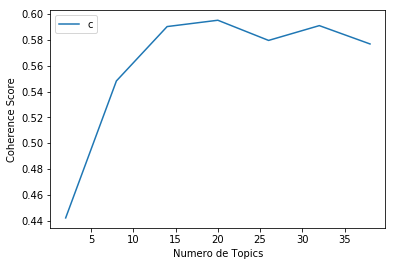

In [288]:
ldamodel_list, coherence_values = compute_coherence_values(dictionary=dictionary_tfidf, corpus=corpus_tfidf, texts=TEXT_DATA_OPTIMO,
                                                           start=2, limit=40, step=6)
%matplotlib inline
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Numero de Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

__Paso 4:__ Se procederá a probar el modelo con el corpus_tfidf y numero de topics óptimo

In [297]:
NUM_TOPICS_OPTIMO = 15
ldamodel = gensim.models.LdaModel(corpus_tfidf, num_topics=NUM_TOPICS_OPTIMO, id2word=dictionary_tfidf, chunksize=CHUNKSIZE, alpha='auto', eta='auto', 
                                  iterations=ITERATIONS, passes=PASSES, eval_every=EVAL_EVERY)
ldamodel.save('model_tfidf.gensim')

In [298]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.019*"@wolfdru" + 0.011*"abog" + 0.010*"organiz" + 0.010*"criminal"')
(1, '0.009*"pod" + 0.008*"proces" + 0.007*"dig" + 0.006*"judicial"')
(2, '0.014*"@gildatrkovic" + 0.011*"@elhigadodmarit" + 0.011*"acus" + 0.011*"cuent"')
(3, '0.011*"fiscal" + 0.010*"@idl_r" + 0.008*"popul" + 0.007*"@xafu"')
(4, '0.028*"justiciaparakeik" + 0.014*"keikolibert" + 0.009*"respet" + 0.008*"penal"')
(5, '0.054*"@rppnotici" + 0.011*"@ugluis" + 0.009*"acuerd" + 0.006*"defensor"')
(6, '0.010*"pretend" + 0.008*"esper" + 0.008*"abus" + 0.008*"@martinvizcarrac"')
(7, '0.021*"@jfowks" + 0.009*"@alvarosarc" + 0.008*"@marthachavezc" + 0.007*"complic"')
(8, '0.009*"escuch" + 0.008*"@diariocorre" + 0.007*"ovied" + 0.007*"ilegal"')
(9, '0.012*"ningun" + 0.008*"@poder_judicial" + 0.008*"@josedomingop" + 0.008*"@luzsalgado_r"')
(10, '0.017*"@veritatisperu" + 0.008*"parec" + 0.007*"2016" + 0.007*"ignor"')
(11, '0.032*"@socioperiod" + 0.013*"@laconchacavi" + 0.011*"justici" + 0.008*"@wolfdru"')
(12, '0.031*"mafiaid

In [299]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=TEXT_DATA_OPTIMO, dictionary=dictionary_tfidf, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5657245050971191


In [300]:
dictionary_tfidf = gensim.corpora.Dictionary.load('dictionary_tfidf.gensim')
corpus_tfidf = pickle.load(open('corpus_tfidf.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_tfidf.gensim')

lda_display = pyLDAvis.gensim.prepare(lda, corpus_tfidf, dictionary_tfidf, sort_topics=False)
pyLDAvis.display(lda_display)